In [1]:
#import required libraries
import pandas as pd
import yfinance as yf
import numpy as np
import math
#import pandas_ta as ta
import hvplot.pandas
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import json
from pandas.io.json import json_normalize

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\akkrishn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# parameter setup (default values in the original indicator)
length = 20
mult = 2
length_KC = 21
mult_KC = 2

In [118]:
value = input("Enter Stock Symbol:")
stock = yf.Ticker(value)
print(stock.info)

Enter Stock Symbol: spy


{'exchange': 'PCX', 'shortName': 'SPDR S&P 500', 'longName': 'SPDR S&P 500 ETF Trust', 'exchangeTimezoneName': 'America/New_York', 'exchangeTimezoneShortName': 'EDT', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '-14400000', 'quoteType': 'ETF', 'symbol': 'SPY', 'messageBoardId': 'finmb_6160262', 'market': 'us_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': None, 'beta3Year': 1, 'profitMargins': None, 'enterpriseToEbitda': None, '52WeekChange': None, 'morningStarRiskRating': None, 'forwardEps': None, 'revenueQuarterlyGrowth': None, 'fundInceptionDate': 727660800, 'annualReportExpenseRatio': None, 'totalAssets': 374031319040, 'bookValue': None, 'fundFamily': 'SPDR State Street Global Advisors', 'lastFiscalYearEnd': None, 'netIncomeToCommon': None, 'trailingEps': None, 'lastDividendValue': None, 'SandP52WeekChange': None, 'priceToBook': None, 'nextFiscalYearEnd': None, 'yield': 0.012999999, 'mostRecentQuarter': None, 'enterpriseValue': None, 'priceHint': 2, 'threeYear

In [119]:
stock_df = stock.history(period="10y", interval='1d')
stock_df.index.duplicated().sum()
df_stock = stock_df.loc[~stock_df.index.duplicated(keep='first')]
df_stock

Open        High         Low       Close     Volume  \
Date                                                                    
2011-09-27   97.595196   98.443276   96.203683   96.780052  311753900   
2011-09-28   96.977677   97.562276   94.663982   94.803955  286696800   
2011-09-29   96.376625   96.854181   93.807678   95.553246  298108900   
2011-09-30   94.235810   95.059190   93.099549   93.165421  288392300   
2011-10-03   92.621980   93.824113   90.415322   90.514130  365136800   
...                ...         ...         ...         ...        ...   
2021-09-21  436.529999  437.910004  433.070007  433.630005   92526100   
2021-09-22  436.049988  440.029999  433.750000  437.859985  102350100   
2021-09-23  439.850006  444.890015  439.600006  443.179993   76396000   
2021-09-24  441.440002  444.670013  441.209991  443.910004   62025800   
2021-09-27  442.809998  444.049988  441.899994  443.204987   24861969   

            Dividends  Stock Splits  
Date                                 
2011-09-27        0.0             0  
2011-09-28        0.0             0  
2011-09-29        0.0             0  
2011-09-30        0.0             0  
2011-10-03        0.0             0  
...               ...           ...  
2021-09-21        0.0             0  
2021-09-22        0.0             0  
2021-09-23        0.0             0  
2021-09-24        0.0             0  
2021-09-27        0.0             0  

[2517 rows x 7 columns]

In [120]:
stock_df_wk = stock.history(period="3y", interval='1wk')
stock_df.index.duplicated().sum()
df_stock_wk = stock_df_wk.loc[~stock_df_wk.index.duplicated(keep='first')]
df_stock_wk

Open        High         Low       Close        Volume  \
Date                                                                       
2018-09-24  275.469013  276.891841  275.032687  275.763062  1.293409e+08   
2018-10-01  277.081474  278.124887  271.494518  273.012207  3.915293e+08   
2018-10-08  272.281833  273.998710  256.450499  261.752930  8.348392e+08   
2018-10-15  261.373508  266.685405  260.187818  262.037506  6.056046e+08   
2018-10-22  262.748921  263.090386  248.795729  251.679306  7.462113e+08   
2018-10-29  254.970774  261.069985  246.481250  257.901825  6.682905e+08   
2018-11-05  258.423455  266.751738  257.389537  263.469757  3.928580e+08   
2018-11-12  262.929169  263.185267  253.272915  259.647186  5.849555e+08   
2018-11-19  259.002112  259.315150  249.535582  249.706314  3.574546e+08   
2018-11-26  252.106150  262.065946  251.688784  261.468353  4.636640e+08   
2018-12-03  265.860169  265.973991  248.938004  250.009872  6.463666e+08   
2018-12-10  249.820131  255.160483  245.314509  247.069336  5.845508e+08   
2018-12-17  246.054371  247.240061  227.633493  228.316452  1.022399e+09   
2018-12-21         NaN         NaN         NaN         NaN           NaN   
2018-12-24  228.065943  239.858510  223.028343  236.376083  7.051645e+08   
2018-12-31  238.102990  241.490017  232.483394  240.803070  5.579941e+08   
2019-01-07  241.089289  247.262260  240.135198  247.090530  4.713403e+08   
2019-01-14  245.067875  254.723304  244.638552  254.227158  4.577719e+08   
2019-01-21  252.662450  254.456146  248.693427  253.578369  3.576490e+08   
2019-01-28  251.298093  258.749543  249.771542  257.661865  4.340183e+08   
2019-02-04  257.709582  260.886722  255.534255  258.053070  3.699163e+08   
2019-02-11  258.749565  264.674463  257.633265  264.636292  3.858919e+08   
2019-02-18  263.787187  266.534945  263.663150  266.325073  2.780609e+08   
2019-02-25  267.842000  268.395360  264.741204  267.546234  3.309452e+08   
2019-03-04  268.672057  268.929651  259.913508  261.859833  4.213299e+08   
2019-03-11  262.623116  269.416240  262.594494  268.395355  3.742330e+08   
2019-03-15         NaN         NaN         NaN         NaN           NaN   
2019-03-18  269.807579  273.286190  267.536428  267.603516  4.392868e+08   
2019-03-25  267.239336  271.043763  266.060654  270.698792  3.643511e+08   
2019-04-01  272.826229  276.592316  272.538723  276.534821  2.935507e+08   
2019-04-08  276.084420  278.355571  274.742814  278.058502  2.971310e+08   
2019-04-15  278.135173  279.275545  276.621081  277.924347  2.287267e+08   
2019-04-22  277.109817  281.249624  277.013982  281.172974  2.514869e+08   
2019-04-29  281.268818  282.648764  277.445206  281.767120  3.315552e+08   
2019-05-06  277.186474  281.077145  270.526321  276.084442  5.593967e+08   
2019-05-13  270.641292  277.148085  268.255121  273.918640  4.553527e+08   
2019-05-20  272.212912  274.963211  268.868477  270.986298  3.132091e+08   
2019-05-27  271.283353  272.299142  263.760742  263.789490  3.243889e+08   
2019-06-03  263.827857  276.803162  261.700443  275.653198  3.885322e+08   
2019-06-10  277.301443  279.246778  275.816100  277.196045  2.678066e+08   
2019-06-17  277.445176  283.951998  277.119360  281.738342  4.031944e+08   
2019-06-21         NaN         NaN         NaN         NaN           NaN   
2019-06-24  283.330136  283.667146  279.593867  282.145691  2.809024e+08   
2019-07-01  285.689324  287.750060  283.426375  287.403381  2.327863e+08   
2019-07-08  286.007129  289.589321  284.533810  289.512268  2.365437e+08   
2019-07-15  289.974485  289.974485  285.708604  286.161194  2.166576e+08   
2019-07-22  286.584876  291.033751  286.036014  290.821899  2.358940e+08   
2019-07-29  290.696723  290.821912  280.123472  281.779755  4.476170e+08   
2019-08-05  277.417575  282.742712  271.283559  280.816803  6.214733e+08   
2019-08-12  279.218341  283.253123  271.928796  278.149475  4.780244e+08   
2019-08-19  281.365659  283.041190  272.968695  274.297577  3.5552

In [121]:
stock_df_mo = stock.history(period="10y", interval='1mo')
stock_df_mo.index.duplicated().sum()
df_stock_mo = stock_df_mo.loc[~stock_df_mo.index.duplicated(keep='first')]
df_stock_mo

Open        High         Low       Close        Volume  \
Date                                                                       
2011-10-01   92.622001  106.561823   88.455701  103.334175  5.721102e+09   
2011-11-01  100.477035  105.409084   95.676729  102.914238  5.013586e+09   
2011-12-01  102.798977  104.783325   98.830286  103.334175  3.848636e+09   
2011-12-16         NaN         NaN         NaN         NaN           NaN   
2012-01-01  105.862177  110.535485  104.760135  108.812004  2.883821e+09   
2012-02-01  109.615701  114.504458  109.483135  113.534996  2.894582e+09   
2012-03-01  113.775331  117.520615  111.330958  116.675438  3.057516e+09   
2012-03-16         NaN         NaN         NaN         NaN           NaN   
2012-04-01  117.045273  118.351885  112.983971  116.404449  3.035644e+09   
2012-05-01  116.337845  117.894130  107.815788  109.413673  4.004156e+09   
2012-06-01  107.699266  113.408385  105.810094  113.266907  3.644886e+09   
2012-06-15         NaN         NaN         NaN         NaN           NaN   
2012-07-01  114.171693  116.564213  110.925906  115.200653  2.864743e+09   
2012-08-01  116.028802  119.701234  113.418785  118.086708  2.413591e+09   
2012-09-01  117.986310  123.900689  117.225063  120.437393  2.391234e+09   
2012-09-21         NaN         NaN         NaN         NaN           NaN   
2012-10-01  121.542918  123.763187  118.069539  118.876915  2.719916e+09   
2012-11-01  119.129192  120.870091  113.284169  119.549698  3.032769e+09   
2012-12-01  120.096365  122.434375  117.354661  119.768372  2.889876e+09   
2012-12-21         NaN         NaN         NaN         NaN           NaN   
2013-01-01  122.904592  127.842460  122.582737  126.792206  2.587140e+09   
2013-02-01  127.596856  129.824405  125.970664  128.409958  2.581459e+09   
2013-03-01  127.969553  132.848141  127.393616  132.695679  2.330972e+09   
2013-03-15         NaN         NaN         NaN         NaN           NaN   
2013-04-01  133.217811  135.880640  130.631559  135.846603  2.907035e+09   
2013-05-01  135.548808  143.835045  134.502399  139.053864  2.781596e+09   
2013-06-01  139.377202  141.214810  132.486180  136.476166  3.533322e+09   
2013-06-21         NaN         NaN         NaN         NaN           NaN   
2013-07-01  137.916674  145.271779  137.027226  144.288254  2.330904e+09   
2013-08-01  145.382967  146.221102  139.447570  139.960709  2.283132e+09   
2013-09-01  141.312012  148.470416  140.003490  143.689590  2.226750e+09   
2013-09-20         NaN         NaN         NaN         NaN           NaN   
2013-10-01  144.501728  152.554425  141.399245  151.076233  2.901739e+09   
2013-11-01  151.273884  156.198316  150.191015  155.553757  1.930953e+09   
2013-12-01  155.631099  158.724991  152.391121  158.724991  2.232776e+09   
2013-12-20         NaN         NaN         NaN         NaN           NaN   
2014-01-01  158.973223  159.802745  152.838271  153.961563  2.530651e+09   
2014-02-01  153.780080  161.712316  150.099110  160.969208  2.394185e+09   
2014-03-01  159.552173  163.328207  158.774508  161.591400  2.554084e+09   
2014-03-21         NaN         NaN         NaN         NaN           NaN   
2014-04-01  162.833968  164.639185  157.357569  163.432816  2.345902e+09   
2014-05-01  163.354702  167.329650  161.436654  167.225494  1.781094e+09   
2014-06-01  167.459871  170.627687  166.609340  169.863937  1.675047e+09   
2014-06-20         NaN         NaN         NaN         NaN           NaN   
2014-07-01  171.096433  173.590500  168.279712  168.384354  1.893710e+09   
2014-08-01  167.922222  175.125376  166.169404  175.029449  1.829885e+09   
2014-09-01  175.256138  176.067140  170.965648  171.811539  2.106463e+09   
2014-09-19         NaN         NaN         NaN         NaN           NaN   
2014-10-01  172.334243  176.820024  159.385082  176.679840  3.943068e+09   
2014-11-01  176.907708  182.120665  175.278110  181.533661  1.571092e+09   
2014-12-01  180.832740  186.588905  173.350616  180.079269  3.0451

In [122]:
# calculate Bollinger Bands
# moving average
#m_avg = df_stock['Close'].rolling(window=length).mean()
m_avg = df_stock['Close'].ewm(span=length).mean()
df_stock['Moving average'] = m_avg
# standard deviation
m_std = df_stock['Close'].rolling(window=length).std()
# upper Bollinger Bands
df_stock['upper_BB'] = m_avg + mult * m_std
# lower Bollinger Bands 
df_stock['lower_BB'] = m_avg - mult * m_std

In [123]:
#Stacked Moving averages
m_avg_08 = df_stock['Close'].ewm(span=8).mean()
m_avg_21 = df_stock['Close'].ewm(span=21).mean()
m_avg_34 = df_stock['Close'].ewm(span=34).mean()
m_avg_55 = df_stock['Close'].ewm(span=55).mean()
m_avg_89 = df_stock['Close'].ewm(span=89).mean()

df_stock['m_avg_08'] = m_avg_08
df_stock['m_avg_21'] = m_avg_21
df_stock['m_avg_34'] = m_avg_34
df_stock['m_avg_55'] = m_avg_55
df_stock['m_avg_89'] = m_avg_89

In [124]:
# calculate Keltner Channel
# first we need to calculate True Range
df_stock['tr0'] = abs(df_stock["High"] - df_stock["Low"])
df_stock['tr1'] = abs(df_stock["High"] - df_stock["Close"].shift())
df_stock['tr2'] = abs(df_stock["Low"] - df_stock["Close"].shift())
df_stock['tr'] = df_stock[['tr0', 'tr1', 'tr2']].max(axis=1)
# moving average of the TR
range_ma = df_stock['tr'].ewm(span=length_KC).mean()
# upper Keltner Channel
df_stock['upper_KC'] = m_avg + range_ma * mult_KC
# lower Keltner Channel
df_stock['lower_KC'] = m_avg - range_ma * mult_KC

In [125]:
#ADX Calculations

plus_dm = df_stock["High"].diff()
minus_dm = df_stock["Low"].diff()
plus_dm[plus_dm < 0] = 0
minus_dm[minus_dm > 0] = 0

df_stock['atr'] = df_stock['tr'].ewm(span=14).mean()
df_stock['plus_di'] = 100 * (plus_dm.ewm(alpha = 1/14).mean() / df_stock['atr'])
df_stock['minus_di'] = abs(100 * (minus_dm.ewm(alpha = 1/14).mean() / df_stock['atr']))
dx = (abs(df_stock['plus_di'] - df_stock['minus_di']) / abs(df_stock['plus_di'] + df_stock['minus_di'])) * 100
adx = ((dx.shift(1) * (14 - 1)) + dx) / 14
df_stock['adx'] = adx.ewm(alpha = 1/14).mean()

In [126]:
# check for 'squeeze'
df_stock['squeeze_on'] = (df_stock['lower_BB'] > df_stock['lower_KC']) & (df_stock['upper_BB'] < df_stock['upper_KC'])
df_stock['squeeze_off'] = (df_stock['lower_BB'] < df_stock['lower_KC']) & (df_stock['upper_BB'] > df_stock['upper_KC'])

In [127]:
# Momentum
highest = df_stock['High'].rolling(window = length_KC).max()
lowest = df_stock['Low'].rolling(window = length_KC).min()
m1 = (highest + lowest) / 2
df_stock['value'] = (df_stock['Close'] - (m1 + m_avg)/2)
fit_y = np.array(range(0,length_KC))
df_stock['value'] = df_stock['value'].rolling(window = length_KC).apply(lambda x : np.polyfit(fit_y, x, 1)[0] * (length_KC-1) +
   np.polyfit(fit_y, x, 1)[1], raw=True)

df_stock[['squeeze_on', 'squeeze_off']] = (df_stock[['squeeze_on', 'squeeze_off']] == True).astype(float)

df_stock["pct_change"] = df_stock['Close'].pct_change()*100

"""
conditions = [
    (df_stock['pct_change'] > 0) | (df_stock['squeeze_on'] == 1),
    (df_stock['pct_change'] < 0) | (df_stock['squeeze_on'] == 0)
]
"""
conditions =  [
    (df_stock['pct_change'] > 0),
    (df_stock['pct_change'] < 0)
]

label = [1, 0]
df_stock['profitable?'] = np.select(conditions, label) 
df_stock.dropna(inplace=True)
df_stock.tail(100)

Open        High         Low       Close     Volume  \
Date                                                                    
2021-05-06  413.150395  416.508619  411.014256  416.369537   74321400   
2021-05-07  417.184261  420.095373  416.458954  419.399872   67733800   
2021-05-10  419.777439  420.015883  415.117659  415.246826   81852400   
2021-05-11  410.438030  412.594030  407.417611  411.540863  116888000   
2021-05-12  408.580081  409.931302  401.396659  402.797577  134811000   
2021-05-13  404.446863  409.692838  404.397167  407.636169  106394000   
2021-05-14  410.547290  414.799708  410.517484  413.895569   82201600   
2021-05-17  412.713270  413.706826  410.696322  412.842407   65129200   
2021-05-18  413.120604  413.378938  409.116574  409.285492   59810200   
2021-05-19  404.297850  408.401211  402.718069  408.212433  106467100   
2021-05-20  409.146387  413.945280  409.017250  412.603973   78022200   
2021-05-21  414.183730  415.505177  411.779342  412.266174   76578700   
2021-05-24  414.650678  417.611486  414.392344  416.468903   51376700   
2021-05-25  417.621389  417.998945  414.928861  415.544861   57451400   
2021-05-26  416.170814  416.906036  415.067981  416.369537   43088600   
2021-05-27  417.462438  418.008882  416.290019  416.588104   56707700   
2021-05-28  418.257313  418.535507  417.084924  417.333313   58520200   
2021-06-01  419.847005  419.996032  416.498726  416.965698   54216600   
2021-06-02  417.661180  418.515654  416.588153  417.621429   49097100   
2021-06-03  415.157418  417.283612  413.597527  416.071472   58138800   
2021-06-04  418.038716  420.194746  416.141020  419.876801   55938800   
2021-06-07  419.866868  420.055646  418.475896  419.469452   51555000   
2021-06-08  420.383507  420.482868  417.611507  419.558868   47134300   
2021-06-09  420.453031  420.532533  418.694448  418.932892   48436300   
2021-06-10  420.234444  421.893696  418.833526  420.880249   51020100   
2021-06-11  421.466499  421.694997  420.095386  421.575775   45570800   
2021-06-14  421.695015  422.628960  420.373599  422.519684   42358500   
2021-06-15  422.678635  422.718355  420.810745  421.744690   51508500   
2021-06-16  421.893704  422.132147  417.214063  419.389923   80386100   
2021-06-17  418.952800  420.294076  416.617937  419.250854   90949700   
2021-06-18  415.758054  416.495682  413.375703  413.595001  118676300   
2021-06-21  415.468959  419.715365  414.601742  419.515991   72822000   
2021-06-22  419.506057  422.645992  418.738497  421.758820   57700300   
2021-06-23  421.838570  422.695809  421.160749  421.250458   49445400   
2021-06-24  423.533141  424.191007  423.263984  423.742462   45110300   
2021-06-25  424.539896  425.726098  424.191007  425.247620   58129500   
2021-06-28  425.805859  426.284307  424.529948  426.104889   53159600   
2021-06-29  426.513585  427.191406  425.765980  426.334167   35970500   
2021-06-30  425.845732  427.410726  425.815829  426.693024   64827900   
2021-07-01  427.500435  429.224921  427.430651  429.055450   53441000   
2021-07-02  430.291489  432.713722  429.145137  432.334930   57697700   
2021-07-06  432.394746  432.624023  428.636797  431.547455   68710400   
2021-07-07  432.275138  433.371631  430.132010  433.072571   63549500   
2021-07-08  427.410704  430.351295  426.154718  429.543884   97595200   
2021-07-09  431.148739  434.448166  429.334544  434.129181   76238600   
2021-07-12  434.039479  435.953361  433.580957  435.684204   52889600   
2021-07-13  434.846893  436.441789  433.919870  434.198975   52911300   
2021-07-14  436.003193  436.521551  433.521154  434.846893   64130400   
2021-07-15  433.421470  434.139172  431.338148  433.361664   55126400   
2021-07-16  434.617624  434.667452  429.543883  429.962524   75874700   
2021-07-19  424.828990  430.032321  420.622465  423.612885  147987000   
2021-07-20  424.320617  431.039114  423.473325  429.683441   99608200   
2021-07-21  430.959358  433.311838  429.633619  433.162292   64724400   
202

In [128]:
# entry point for long position:
# 1. black cross becomes gray (the squeeze is released)
long_cond1 = (df_stock['squeeze_off'][-2] == 0) | (df_stock['squeeze_off'][-1] == 1) 
# 2. bar value is positive => the bar is light green
long_cond2 = df_stock['value'][-1] > 0

enter_long = long_cond1 and long_cond2
# entry point for short position:
# 1. black cross becomes gray (the squeeze is released)
short_cond1 = (df_stock['squeeze_off'][-2] == 0) | (df_stock['squeeze_off'][-1] == 1) 
# 2. bar value is negative => the bar is light red 
short_cond2 = df_stock['value'][-1] < 0
enter_short = short_cond1 and short_cond2

In [129]:
import mplfinance as mpf
%matplotlib widget

In [130]:
ohcl = df_stock[['Open', 'High', 'Close', 'Low']]
ohcl.head()

Open       High      Close        Low
Date                                                  
2011-11-22  98.311535  98.887898  98.138626  97.586957
2011-11-23  97.216465  98.138653  95.973160  95.973160
2011-11-25  95.824928  96.911789  95.791992  95.676720
2011-11-28  98.426799  98.953762  98.566772  97.833965
2011-11-29  98.846741  99.628949  98.846741  98.484452

In [131]:
# add colors for the 'value bar'
colors = []
for ind, val in enumerate(df_stock['value']):
  if val >= 0:
    color = 'blue'
    if val > df_stock['value'][ind-1]:
      color = 'cyan'
  else:
    color = 'yellow'
    if val < df_stock['value'][ind-1]:
      color='red'
  colors.append(color)

In [132]:
len(colors)

2477

In [133]:
df_stock['colors'] = colors

In [134]:
df_stock.head()

Open       High        Low      Close     Volume  Dividends  \
Date                                                                           
2011-11-22  98.311535  98.887898  97.586957  98.138626  216494900        0.0   
2011-11-23  97.216465  98.138653  95.973160  95.973160  224329100        0.0   
2011-11-25  95.824928  96.911789  95.676720  95.791992   99557000        0.0   
2011-11-28  98.426799  98.953762  97.833965  98.566772  210686000        0.0   
2011-11-29  98.846741  99.628949  98.484452  98.846741  199241500        0.0   

            Stock Splits  Moving average    upper_BB   lower_BB    m_avg_08  \
Date                                                                          
2011-11-22             0      101.464478  105.831348  97.097609  100.585730   
2011-11-23             0      100.933562  106.207078  95.660046   99.560687   
2011-11-25             0      100.437178  106.157523  94.716833   98.723183   
2011-11-28             0      100.256838  105.797067  94.716609   98.688424   
2011-11-29             0      100.121040  105.692385  94.549695   98.723606   

              m_avg_21    m_avg_34    m_avg_55    m_avg_89       tr0  \
Date                                                                   
2011-11-22  101.465435  101.291339  100.975038  100.687042  1.300941   
2011-11-23  100.956851  100.959403  100.746865  100.515563  2.165493   
2011-11-25  100.479392  100.638568  100.523053  100.346129  1.235070   
2011-11-28  100.302853  100.510568  100.435516  100.283163  1.119797   
2011-11-29  100.168638  100.408247  100.365059  100.232993  1.144497   

                 tr1       tr2        tr    upper_KC   lower_KC       atr  \
Date                                                                        
2011-11-22  0.362279  0.938663  1.300941  105.661006  97.267951  2.030904   
2011-11-23  0.000027  2.165466  2.165493  105.142540  96.724584  2.048893   
2011-11-25  0.938629  0.296440  1.235070  104.485411  96.388944  1.940152   
2011-11-28  3.161770  2.041973  3.161770  104.515087  95.998589  2.103335   
2011-11-29  1.062177  0.082321  1.144497  104.197776  96.044305  1.975286   

              plus_di   minus_di        adx  squeeze_on  squeeze_off  \
Date                                                                   
2011-11-22  21.361554  34.613476  14.592352         0.0          1.0   
2011-11-23  19.585464  37.644696  15.318780         0.0          1.0   
2011-11-25  19.137028  37.924956  16.544244         0.0          1.0   
2011-11-28  23.570389  32.376193  17.677045         0.0          1.0   
2011-11-29  25.773054  31.914279  17.505588         0.0          1.0   

               value  pct_change  profitable?  colors  
Date                                                   
2011-11-22 -2.655401   -0.392785            0  yellow  
2011-11-23 -3.624749   -2.206538            0     red  
2011-11-25 -4.372549   -0.188769            0     red  
2011-11-28 -4.230684    2.896672            1  yellow  
2011-11-29 -3.931923    0.284039            1  yellow

In [135]:
# add 2 subplots: 1. bars, 2. crosses
apds = [mpf.make_addplot(df_stock['value'], panel=1, type='bar', color=colors, alpha=0.8, secondary_y=False),
        mpf.make_addplot([0] * len(df_stock), panel=1, type='scatter', marker='o', markersize=50, color=['gray' if s else 'red' for s in df_stock['squeeze_off']], secondary_y=False),
        mpf.make_addplot(df_stock[['upper_BB']], color = 'red'),
        mpf.make_addplot(df_stock[['lower_BB']], color = 'red'),
        mpf.make_addplot(df_stock[['upper_KC']], color = 'blue'),
        mpf.make_addplot(df_stock[['lower_KC']], color = 'blue'),
        mpf.make_addplot(df_stock['Moving average'], color = 'black'),
        mpf.make_addplot(df_stock['m_avg_08'], color = 'green'),
        mpf.make_addplot(df_stock['m_avg_34'], color = 'orange'),
        mpf.make_addplot(df_stock[['adx']], panel=2, color = 'purple', secondary_y=False),
        mpf.make_addplot(df_stock[['plus_di']], panel=2, color = 'green', secondary_y=False),
        mpf.make_addplot(df_stock[['minus_di']], panel=2, color = 'orange', secondary_y=False),
        mpf.make_addplot(df_stock['m_avg_08'], panel=3, color='red', secondary_y=False),
        mpf.make_addplot(df_stock['m_avg_21'], panel=3, color='orange', secondary_y=False),
        mpf.make_addplot(df_stock['m_avg_34'], panel=3, color='yellow', secondary_y=False),
        mpf.make_addplot(df_stock['m_avg_55'], panel=3, color='green', secondary_y=False),
        mpf.make_addplot(df_stock['m_avg_89'], panel=3, color='blue', secondary_y=False)]

# plot ohcl with subplots
fig, axes = mpf.plot(ohcl, 
              volume_panel = 2,
              figratio=(2,1),
              figscale=1,
              type='candle', 
              addplot=apds,
              returnfig=True)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [136]:
def stochastics( dataframe, low, high, close, k, d ):
    """
    Fast stochastic calculation
    %K = (Current Close - Lowest Low)/
    (Highest High - Lowest Low) * 100
    %D = 3-day SMA of %K

    Slow stochastic calculation
    %K = %D of fast stochastic
    %D = 3-day SMA of %K

    When %K crosses above %D, buy signal 
    When the %K crosses below %D, sell signal
    """

    df = dataframe.copy()

    # Set minimum low and maximum high of the k stoch
    low_min  = df[low].rolling( window = k ).min()
    high_max = df[high].rolling( window = k ).max()

    # Fast Stochastic
    df['k_fast'] = 100 * (df[close] - low_min)/(high_max - low_min)
    df['d_fast'] = df['k_fast'].rolling(window = d).mean()

    # Slow Stochastic
    df['k_slow'] = df["d_fast"]
    df['d_slow'] = df['k_slow'].rolling(window = d).mean()

    return df


stochs = stochastics( df_stock, 'Low', 'High', 'Close', 14, 3 )
slow_k = stochs['k_slow'].values
fast_k = stochs['k_fast'].values
df_stock["slow_K"] = slow_k
df_stock['fast_K'] = fast_k
df_stock

Open        High         Low       Close     Volume  \
Date                                                                    
2011-11-22   98.311535   98.887898   97.586957   98.138626  216494900   
2011-11-23   97.216465   98.138653   95.973160   95.973160  224329100   
2011-11-25   95.824928   96.911789   95.676720   95.791992   99557000   
2011-11-28   98.426799   98.953762   97.833965   98.566772  210686000   
2011-11-29   98.846741   99.628949   98.484452   98.846741  199241500   
...                ...         ...         ...         ...        ...   
2021-09-21  436.529999  437.910004  433.070007  433.630005   92526100   
2021-09-22  436.049988  440.029999  433.750000  437.859985  102350100   
2021-09-23  439.850006  444.890015  439.600006  443.179993   76396000   
2021-09-24  441.440002  444.670013  441.209991  443.910004   62025800   
2021-09-27  442.809998  444.049988  441.899994  443.204987   24861969   

            Dividends  Stock Splits  Moving average    upper_BB    lower_BB  \
Date                                                                          
2011-11-22        0.0             0      101.464478  105.831348   97.097609   
2011-11-23        0.0             0      100.933562  106.207078   95.660046   
2011-11-25        0.0             0      100.437178  106.157523   94.716833   
2011-11-28        0.0             0      100.256838  105.797067   94.716609   
2011-11-29        0.0             0      100.121040  105.692385   94.549695   
...               ...           ...             ...         ...         ...   
2021-09-21        0.0             0      443.378037  453.619766  433.136309   
2021-09-22        0.0             0      442.852508  453.735914  431.969103   
2021-09-23        0.0             0      442.883697  453.788387  431.979007   
2021-09-24        0.0             0      442.981441  453.905427  432.057455   
2021-09-27        0.0             0      443.002731  453.848869  432.156593   

              m_avg_08    m_avg_21    m_avg_34    m_avg_55    m_avg_89  \
Date                                                                     
2011-11-22  100.585730  101.465435  101.291339  100.975038  100.687042   
2011-11-23   99.560687  100.956851  100.959403  100.746865  100.515563   
2011-11-25   98.723183  100.479392  100.638568  100.523053  100.346129   
2011-11-28   98.688424  100.302853  100.510568  100.435516  100.283163   
2011-11-29   98.723606  100.168638  100.408247  100.365059  100.232993   
...                ...         ...         ...         ...         ...   
2021-09-21  440.667763  443.392481  442.449140  439.024046  432.043344   
2021-09-22  440.043812  442.889527  442.186902  438.982473  432.172602   
2021-09-23  440.740741  442.915933  442.243650  439.132384  432.417211   
2021-09-24  441.445022  443.006303  442.338870  439.303013  432.672606   
2021-09-27  441.836125  443.024365  442.388363  439.442370  432.906659   

                 tr0       tr1       tr2        tr    upper_KC    lower_KC  \
Date                                                                         
2011-11-22  1.300941  0.362279  0.938663  1.300941  105.661006   97.267951   
2011-11-23  2.165493  0.000027  2.165466  2.165493  105.142540   96.724584   
2011-11-25  1.235070  0.938629  0.296440  1.235070  104.485411   96.388944   
2011-11-28  1.119797  3.161770  2.041973  3.161770  104.515087   95.998589   
2011-11-29  1.144497  1.062177  0.082321  1.144497  104.197776   96.044305   
...              ...       ...       ...       ...         ...         ...   
2021-09-21  4.839996  3.869995  0.970001  4.839996  452.598131  434.157943   
2021-09-22  6.279999  6.399994  0.119995  6.399994  452.398047  433.306969   
2021-09-23  5.290009  7.030029  1.740021  7.030029  452.839647  432.927747   
2021-09-24  3.460022  1.490021  1.970001  3.460022  452.661399  433.301482   
2021-09-27  2.149994  0.139984  2.010010  2.149994  452.193601  433.811861   

                 atr    plus_di   minus_di        adx  squeeze

In [137]:
import pandas as pd 
import matplotlib.pyplot as plt
import requests
import numpy as np
from math import floor
from termcolor import colored as cl 

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

In [138]:
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

df_stock['rsi_14'] = get_rsi(df_stock['Close'], 14)
df_stock = df_stock.dropna()
df_stock['Overbought'] = 70
df_stock['Oversold'] = 30
df_stock

Open        High         Low       Close     Volume  \
Date                                                                    
2011-12-14  100.913430  101.300419  100.015949  100.238258  238618800   
2011-12-15  101.300427  101.440400  100.444111  100.600555  199109200   
2011-12-16  101.280006  101.876594  100.509406  100.749695  220481400   
2011-12-19  101.139146  101.354584   99.457085   99.672523  183903000   
2011-12-20  101.238568  102.862627   99.738801  102.688622  225418100   
...                ...         ...         ...         ...        ...   
2021-09-21  436.529999  437.910004  433.070007  433.630005   92526100   
2021-09-22  436.049988  440.029999  433.750000  437.859985  102350100   
2021-09-23  439.850006  444.890015  439.600006  443.179993   76396000   
2021-09-24  441.440002  444.670013  441.209991  443.910004   62025800   
2021-09-27  442.809998  444.049988  441.899994  443.204987   24861969   

            Dividends  Stock Splits  Moving average    upper_BB    lower_BB  \
Date                                                                          
2011-12-14       0.00             0      101.735616  106.954600   96.516632   
2011-12-15       0.00             0      101.627154  106.817899   96.436408   
2011-12-16       0.77             0      101.543334  106.731930   96.354737   
2011-12-19       0.00             0      101.364674  106.579050   96.150298   
2011-12-20       0.00             0      101.491076  106.643484   96.338668   
...               ...           ...             ...         ...         ...   
2021-09-21       0.00             0      443.378037  453.619766  433.136309   
2021-09-22       0.00             0      442.852508  453.735914  431.969103   
2021-09-23       0.00             0      442.883697  453.788387  431.979007   
2021-09-24       0.00             0      442.981441  453.905427  432.057455   
2021-09-27       0.00             0      443.002731  453.848869  432.156593   

              m_avg_08    m_avg_21    m_avg_34    m_avg_55    m_avg_89  \
Date                                                                     
2011-12-14  101.891967  101.718886  101.511765  101.247757  100.995458   
2011-12-15  101.604987  101.616773  101.457810  101.221316  100.983307   
2011-12-16  101.414922  101.537634  101.415968  101.202147  100.976180   
2011-12-19  101.027722  101.367463  101.313148  101.140280  100.936735   
2011-12-20  101.396811  101.487964  101.394119  101.202609  100.989320   
...                ...         ...         ...         ...         ...   
2021-09-21  440.667763  443.392481  442.449140  439.024046  432.043344   
2021-09-22  440.043812  442.889527  442.186902  438.982473  432.172602   
2021-09-23  440.740741  442.915933  442.243650  439.132384  432.417211   
2021-09-24  441.445022  443.006303  442.338870  439.303013  432.672606   
2021-09-27  441.836125  443.024365  442.388363  439.442370  432.906659   

                 tr0       tr1       tr2        tr    upper_KC    lower_KC  \
Date                                                                         
2011-12-14  1.284471  0.016468  1.300938  1.300938  105.773543   97.697689   
2011-12-15  0.996289  1.202142  0.205853  1.202142  105.515916   97.738392   
2011-12-16  1.367188  1.276038  0.091150  1.367188  105.326733   97.759934   
2011-12-19  1.897499  0.604890  1.292610  1.897499  105.149132   97.580217   
2011-12-20  3.123826  3.190104  0.066278  3.190104  105.512288   97.469864   
...              ...       ...       ...       ...         ...         ...   
2021-09-21  4.839996  3.869995  0.970001  4.839996  452.598131  434.157943   
2021-09-22  6.279999  6.399994  0.119995  6.399994  452.398047  433.306969   
2021-09-23  5.290009  7.030029  1.740021  7.030029  452.839647  432.927747   
2021-09-24  3.460022  1.490021  1.970001  3.460022  452.661399  433.301482   
2021-09-27  2.149994  0.139984  2.010010  2.149994  452.193601  433.811861   

                 atr    plus_di   minus_di        adx  squeeze

In [139]:
apds2 = [mpf.make_addplot(df_stock['value'], panel=1, type='bar', color=colors, alpha=0.8, secondary_y=False),
         mpf.make_addplot([0] * len(df_stock), panel=1, type='scatter', marker='o', markersize=50, color=['gray' if s else 'red' for s in df_stock['squeeze_off']], secondary_y=False),
         mpf.make_addplot(df_stock[['upper_BB']], color = 'red'),
         mpf.make_addplot(df_stock[['lower_BB']], color = 'red'),
         mpf.make_addplot(df_stock[['upper_KC']], color = 'blue'),
         mpf.make_addplot(df_stock[['lower_KC']], color = 'blue'),
         mpf.make_addplot(df_stock['Moving average'], color = 'black'),
         mpf.make_addplot(df_stock['m_avg_08'], color = 'green'),
         mpf.make_addplot(df_stock['m_avg_34'], color = 'orange'),
         mpf.make_addplot(df_stock['slow_K'], panel=2, color = 'red'),
         mpf.make_addplot(df_stock['fast_K'], panel=2, color = 'blue'),
         mpf.make_addplot(df_stock['Overbought'], panel=2, color = 'green'),
         mpf.make_addplot(df_stock['Oversold'], panel=2, color = 'red'),
         mpf.make_addplot(df_stock['Overbought'], panel=3, color = 'green'),
         mpf.make_addplot(df_stock['Oversold'], panel=3, color = 'red'),
         mpf.make_addplot(df_stock['rsi_14'], panel=3, color='purple')]
fig, axes = mpf.plot(df_stock, 
              volume_panel = 2,
              figratio=(2,1),
              figscale=1,
              type='candle', 
              addplot=apds2,
              returnfig=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [140]:
for i in range(2,df_stock.shape[0]):
    current = df_stock.iloc[i,:]
    prev = df_stock.iloc[i-1,:]
    prev_2 = df_stock.iloc[i-2,:]
    realbody = abs(current['Open'] - current['Close'])
    candle_range = current['High'] - current['Low']
    idx = df_stock.index[i]  
# Bullish swing
    df_stock.loc[idx,'Bullish swing'] = current['Low'] > prev['Low'] and prev['Low'] < prev_2['Low']
# Bearish swing
    df_stock.loc[idx,'Bearish swing'] = current['High'] < prev['High'] and prev['High'] > prev_2['High']
# Bullish pinbar
    df_stock.loc[idx,'Bullish pinbar'] = realbody <= candle_range/3 and  min(current['Open'], current['Close']) > (current['High'] + current['Low'])/2 and current['Low'] < prev['Low']
# Bearish pinbar
    df_stock.loc[idx,'Bearish pinbar'] = realbody <= candle_range/3 and max(current['Open'] , current['Close']) < (current['High'] + current['Low'])/2 and current['High'] > prev['High']
    
  # Inside bar
    df_stock.loc[idx,'Inside bar'] = current['High'] < prev['High'] and current['Low'] > prev['Low']
    
  # Outside bar
    df_stock.loc[idx,'Outside bar'] = current['High'] > prev['High'] and current['Low'] < prev['Low']
  
  # Bullish engulfing
    df_stock.loc[idx,'Bullish engulfing'] = current['High'] > prev['High'] and current['Low'] < prev['Low'] and realbody >= 0.8 * candle_range and current['Close'] > current['Open']
# Bearish engulfing
    df_stock.loc[idx,'Bearish engulfing'] = current['High'] > prev['High'] and current['Low'] < prev['Low'] and realbody >= 0.8 * candle_range and current['Close'] < current['Open']

df_stock.fillna(False, inplace=True)

In [141]:
df_stock

Open        High         Low       Close     Volume  \
Date                                                                    
2011-12-14  100.913430  101.300419  100.015949  100.238258  238618800   
2011-12-15  101.300427  101.440400  100.444111  100.600555  199109200   
2011-12-16  101.280006  101.876594  100.509406  100.749695  220481400   
2011-12-19  101.139146  101.354584   99.457085   99.672523  183903000   
2011-12-20  101.238568  102.862627   99.738801  102.688622  225418100   
...                ...         ...         ...         ...        ...   
2021-09-21  436.529999  437.910004  433.070007  433.630005   92526100   
2021-09-22  436.049988  440.029999  433.750000  437.859985  102350100   
2021-09-23  439.850006  444.890015  439.600006  443.179993   76396000   
2021-09-24  441.440002  444.670013  441.209991  443.910004   62025800   
2021-09-27  442.809998  444.049988  441.899994  443.204987   24861969   

            Dividends  Stock Splits  Moving average    upper_BB    lower_BB  \
Date                                                                          
2011-12-14       0.00             0      101.735616  106.954600   96.516632   
2011-12-15       0.00             0      101.627154  106.817899   96.436408   
2011-12-16       0.77             0      101.543334  106.731930   96.354737   
2011-12-19       0.00             0      101.364674  106.579050   96.150298   
2011-12-20       0.00             0      101.491076  106.643484   96.338668   
...               ...           ...             ...         ...         ...   
2021-09-21       0.00             0      443.378037  453.619766  433.136309   
2021-09-22       0.00             0      442.852508  453.735914  431.969103   
2021-09-23       0.00             0      442.883697  453.788387  431.979007   
2021-09-24       0.00             0      442.981441  453.905427  432.057455   
2021-09-27       0.00             0      443.002731  453.848869  432.156593   

              m_avg_08    m_avg_21    m_avg_34    m_avg_55    m_avg_89  \
Date                                                                     
2011-12-14  101.891967  101.718886  101.511765  101.247757  100.995458   
2011-12-15  101.604987  101.616773  101.457810  101.221316  100.983307   
2011-12-16  101.414922  101.537634  101.415968  101.202147  100.976180   
2011-12-19  101.027722  101.367463  101.313148  101.140280  100.936735   
2011-12-20  101.396811  101.487964  101.394119  101.202609  100.989320   
...                ...         ...         ...         ...         ...   
2021-09-21  440.667763  443.392481  442.449140  439.024046  432.043344   
2021-09-22  440.043812  442.889527  442.186902  438.982473  432.172602   
2021-09-23  440.740741  442.915933  442.243650  439.132384  432.417211   
2021-09-24  441.445022  443.006303  442.338870  439.303013  432.672606   
2021-09-27  441.836125  443.024365  442.388363  439.442370  432.906659   

                 tr0       tr1       tr2        tr    upper_KC    lower_KC  \
Date                                                                         
2011-12-14  1.284471  0.016468  1.300938  1.300938  105.773543   97.697689   
2011-12-15  0.996289  1.202142  0.205853  1.202142  105.515916   97.738392   
2011-12-16  1.367188  1.276038  0.091150  1.367188  105.326733   97.759934   
2011-12-19  1.897499  0.604890  1.292610  1.897499  105.149132   97.580217   
2011-12-20  3.123826  3.190104  0.066278  3.190104  105.512288   97.469864   
...              ...       ...       ...       ...         ...         ...   
2021-09-21  4.839996  3.869995  0.970001  4.839996  452.598131  434.157943   
2021-09-22  6.279999  6.399994  0.119995  6.399994  452.398047  433.306969   
2021-09-23  5.290009  7.030029  1.740021  7.030029  452.839647  432.927747   
2021-09-24  3.460022  1.490021  1.970001  3.460022  452.661399  433.301482   
2021-09-27  2.149994  0.139984  2.010010  2.149994  452.193601  433.811861   

                 atr    plus_di   minus_di        adx  squeeze

In [142]:
columns = ['Bullish swing', 'Bearish swing', 'Bullish pinbar', 'Bearish pinbar', 'Inside bar', 'Outside bar', 'Bullish engulfing','Bearish engulfing']


def convert(df):
    patterns = []
    for i in columns:
        if df[i]:
            patterns.append(i)
    #df['patterns'] = patterns
    if not patterns:
        patterns.append('No pattern')
    return patterns

In [143]:
#df_stock_dow.apply(convert, axis=1)
df_stock['pattern'] = df_stock.apply(convert, axis = 1)

In [144]:
df_stock['pattern'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[No pattern]                                  968
[Bullish swing]                               386
[Bearish swing]                               324
[Outside bar]                                 143
[Bearish swing, Inside bar]                   112
[Bullish swing, Inside bar]                    92
[Bearish pinbar]                               91
[Bearish swing, Bullish pinbar]                89
[Bullish pinbar]                               78
[Bullish swing, Bearish swing, Inside bar]     52
[Bullish pinbar, Outside bar]                  33
[Bullish swing, Bearish pinbar]                30
[Outside bar, Bearish engulfing]               23
[Outside bar, Bullish engulfing]               15
[Inside bar]                                   14
[Bearish pinbar, Outside bar]                  12
Name: pattern, dtype: int64

In [145]:
df_stock.tail()

Open        High         Low       Close     Volume  \
Date                                                                    
2021-09-21  436.529999  437.910004  433.070007  433.630005   92526100   
2021-09-22  436.049988  440.029999  433.750000  437.859985  102350100   
2021-09-23  439.850006  444.890015  439.600006  443.179993   76396000   
2021-09-24  441.440002  444.670013  441.209991  443.910004   62025800   
2021-09-27  442.809998  444.049988  441.899994  443.204987   24861969   

            Dividends  Stock Splits  Moving average    upper_BB    lower_BB  \
Date                                                                          
2021-09-21        0.0             0      443.378037  453.619766  433.136309   
2021-09-22        0.0             0      442.852508  453.735914  431.969103   
2021-09-23        0.0             0      442.883697  453.788387  431.979007   
2021-09-24        0.0             0      442.981441  453.905427  432.057455   
2021-09-27        0.0             0      443.002731  453.848869  432.156593   

              m_avg_08    m_avg_21    m_avg_34    m_avg_55    m_avg_89  \
Date                                                                     
2021-09-21  440.667763  443.392481  442.449140  439.024046  432.043344   
2021-09-22  440.043812  442.889527  442.186902  438.982473  432.172602   
2021-09-23  440.740741  442.915933  442.243650  439.132384  432.417211   
2021-09-24  441.445022  443.006303  442.338870  439.303013  432.672606   
2021-09-27  441.836125  443.024365  442.388363  439.442370  432.906659   

                 tr0       tr1       tr2        tr    upper_KC    lower_KC  \
Date                                                                         
2021-09-21  4.839996  3.869995  0.970001  4.839996  452.598131  434.157943   
2021-09-22  6.279999  6.399994  0.119995  6.399994  452.398047  433.306969   
2021-09-23  5.290009  7.030029  1.740021  7.030029  452.839647  432.927747   
2021-09-24  3.460022  1.490021  1.970001  3.460022  452.661399  433.301482   
2021-09-27  2.149994  0.139984  2.010010  2.149994  452.193601  433.811861   

                 atr    plus_di   minus_di        adx  squeeze_on  \
Date                                                                
2021-09-21  5.115753  10.629877  29.104143  17.429763         0.0   
2021-09-22  5.286985  12.415086  26.149995  19.450329         0.0   
2021-09-23  5.519391  17.332404  23.259687  20.497732         0.0   
2021-09-24  5.244809  16.936968  22.729020  20.076613         0.0   
2021-09-27  4.832167  17.070204  22.907820  19.685574         0.0   

            squeeze_off     value  pct_change  profitable?  colors     slow_K  \
Date                                                                            
2021-09-21          1.0 -3.887832   -0.094462            0     red  15.064695   
2021-09-22          1.0 -4.767884    0.975481            1     red  26.607731   
2021-09-23          1.0 -4.553976    1.215002            1  yellow  39.802093   
2021-09-24          1.0 -4.128095    0.164721            1  yellow  55.396885   
2021-09-27          1.0 -4.043820   -0.158820            0  yellow  64.236368   

               fast_K     rsi_14  Overbought  Oversold  Bullish swing  \
Date                                                                    
2021-09-21  20.092735  33.862113          70        30           True   
2021-09-22  37.910666  42.146592          70        30          False   
2021-09-23  61.402878  50.538170          70        30          False   
2021-09-24  66.877112  51.576119          70        30          False   
2021-09-27  64.429115  50.474497          70        30          False   

            Bearish swing  Bullish pinbar  Bearish pinbar  Inside bar  \
Date                                                                    
2021-09-21          False           False           False       False   
2021-09-22          False           False           False       False   
2021-09-23          False     

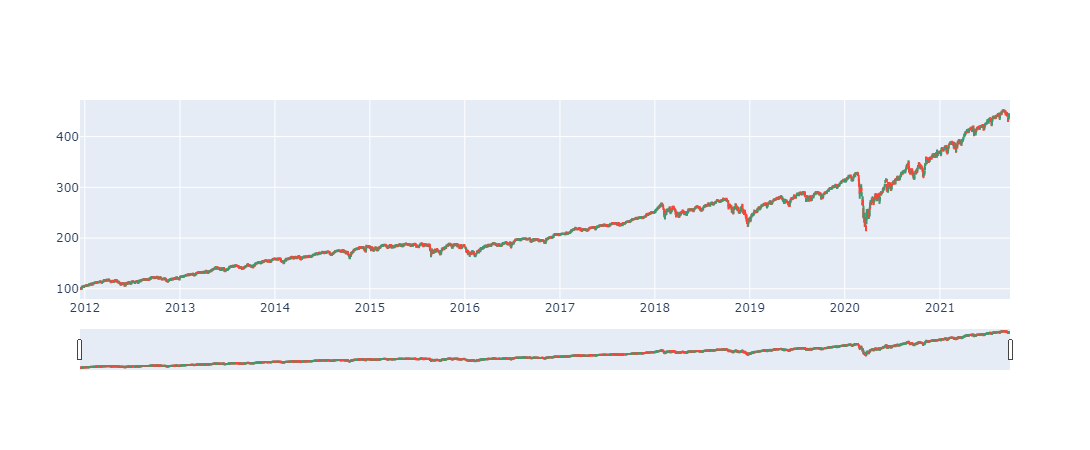

In [146]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df_stock.index,
                open=df_stock['Open'],
                high=df_stock['High'],
                low=df_stock['Low'],
                close=df_stock['Close'])])
fig.update_traces(text=df_stock['pattern'], selector=dict(type='candlestick'))
fig.show()

In [147]:
pattern_dict = {
    'Bullish swing': 'upswing pattern',
    'Bearish swing': 'downward pattern',
    'Bullish pinbar': 'upswing hammer',
    'Bearish pinbar': 'downswing hammer',
    'Inside bar': 'trend change',
    'Outside bar': 'trend change',
    'Bullish engulfing': 'upswing from downtrend',
    'Bearish engulfing': 'downswing from uptrend',
    'No pattern': 'No pattern detected'
    }

In [148]:
today = df_stock['pattern'][-1]
for i in today:
    print(f'Todays pattern is {i}, {pattern_dict[i]}')

Todays pattern is Inside bar, trend change


In [149]:
import datetime
today_date = datetime.date.today()
today_date = str(today_date)
today_date
#& df_stock['squeeze_on'] == df_stock['squeeze_threshold']
#df_stock["value"] > df_stock['value_threshold']

'2021-09-27'

In [150]:
#checks the momentum based on the EMA's stacking
#If smaller EMA's stack above the larger, the momentum is positive, vice versa, negative
def momentum_checker(index):
    if (df_stock['m_avg_08'][index] > df_stock['m_avg_21'][index] > df_stock['m_avg_34'][index] > df_stock['m_avg_55'][index] > df_stock['m_avg_89'][index]):
        print('Positive momentum')
    elif (df_stock['m_avg_08'][index] < df_stock['m_avg_21'][index] < df_stock['m_avg_34'][index] < df_stock['m_avg_55'][index] < df_stock['m_avg_89'][index]):
        print('Negative momentum')
    else:
        print('neutral')

In [151]:
df_stock['ADX_trend'] = 20

def ADX_trend_flag(index):
    if (df_stock['adx'][index] > df_stock['ADX_trend'][index]) and (df_stock['plus_di'][index] > df_stock['minus_di'][index]):
        print('positive trend')
    elif (df_stock['adx'][index] > df_stock['ADX_trend'][index]) and (df_stock['plus_di'][index] < df_stock['minus_di'][index]):
        print('negative trend')
    elif (df_stock['adx'][index] < df_stock['ADX_trend'][index]):
        print('neutral or sideways trend')

In [152]:
momentum_checker(-1)

neutral


In [153]:
df_stock.shape

(2462, 46)

In [154]:
ADX_trend_flag(-1)

neutral or sideways trend


In [155]:
def warning(index):
    if (df_stock['m_avg_08'][index] < df_stock['m_avg_21'][index]):
        print('Warning, stock maybe heading down, consider puts on pullback to the 8 EMA, and hold off on long positions.  Watch ADX for negative trend. If this happens with any of the market indices such as SPY, QQQ, or DJI, hold of on long positions.  Watch the chart for the 8 crossing the 34.')
    if (df_stock['m_avg_08'][index] < df_stock['m_avg_34'][index]):
        print('As long as there is tension in the news, you can short or buy puts on any price moves back to the 8 or the 21 ema')
    elif (df_stock['m_avg_08'][index] > df_stock['m_avg_21'][index]):
        print('Continue as normal and watch for bearish candle patterns, especially when market is overbought and at the top bollinger')

In [156]:
warning(-1)

Warning, stock maybe heading down, consider puts on pullback to the 8 EMA, and hold off on long positions.  Watch ADX for negative trend. If this happens with any of the market indices such as SPY, QQQ, or DJI, hold of on long positions.  Watch the chart for the 8 crossing the 34.
As long as there is tension in the news, you can short or buy puts on any price moves back to the 8 or the 21 ema


In [176]:
def squeeze_momentum(index):
    if (df_stock['squeeze_on'][index] == 1.0):
        print('squeeze is on')
    else:
        print('squeeze is off')
    
    if (df_stock['colors'][index] == 'cyan'):
        print('stock is in a mark up mode')
    elif (df_stock['colors'][index] == 'blue'):
        print('stock is in a distribution mode')
    elif (df_stock['colors'][index] == 'yellow'):
        print('stock is in an accumulation mode')
    elif (df_stock['colors'][index] == 'red'):
        print('stock is in a mark down mode')

In [177]:
squeeze_momentum(-1)

squeeze is off
stock is in an accumulation mode


In [159]:
df = yf.download(value,'2021-03-04', '2021-09-29')

[*********************100%***********************]  1 of 1 completed


In [160]:
fig, ax = plt.subplots()
ax.plot(df.Close, color='black')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [161]:
# Define minimum and maximum price points
price_min = df.Close.min()
price_max = df.Close.max()

In [162]:
# Fibonacci Levels considering original trend as upward move
diff = price_max - price_min
level1 = price_max - 0.236 * diff
level2 = price_max - 0.382 * diff
level3 = price_max - 0.500 * diff
level4 = price_max - 0.618 * diff

In [163]:
ax.axhspan(level1, price_min, alpha=0.4, color='lightsalmon')
ax.axhspan(level2, level1, alpha=0.5, color='palegoldenrod')
ax.axhspan(level3, level2, alpha=0.5, color='palegreen')
ax.axhspan(level4, level3, alpha=0.5, color='red')
ax.axhspan(price_max, level4, alpha=0.5, color='powderblue')

plt.ylabel("Price")
plt.xlabel("Date")
plt.legend()
plt.show()

No handles with labels found to put in legend.


In [164]:
# To get the entry and exit signals for the algo trading using squeeze and momentum
df_stock['value_threshold'] = abs(df_stock['value'].min()*.05)
df_stock['squeeze_threshold'] = 1.0
df_stock["squeeze_entry"] = np.logical_and(np.greater(df_stock["value"], df_stock['value_threshold']), 
                                           np.equal(df_stock['squeeze_on'], df_stock['squeeze_threshold']))
df_stock['squeeze_entry'] = df_stock['squeeze_entry'].astype(float)
df_stock['Entry/Exit'] = df_stock['squeeze_entry'].diff()
df_stock_clean = df_stock.dropna()


In [165]:
df_stock.shape

(2462, 50)

In [166]:
len(colors)

2477

In [167]:
def implement_bb_strategy(data, squeeze_on, squeeze_value, upper_kc, threshold, color):
    buy_price = []
    sell_price = []
    squeeze_signal = []
    signal = 0.0

    
    for close, squeeze, value, kc, thresh, color  in zip(data, squeeze_on, squeeze_value, upper_kc, threshold, color):
        if squeeze == 1.0 and value < thresh and (color == 'yellow' or color == 'cyan'):
            if signal != 1:
                buy_price.append(close)
                sell_price.append(np.nan)
                signal = 1.0
                squeeze_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                squeeze_signal.append(0)
        elif close >= kc:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(close)
                signal = -1
                squeeze_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                squeeze_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            squeeze_signal.append(0)
            
    return buy_price, sell_price, squeeze_signal


In [168]:
buy_price, sell_price, squeeze_signal = implement_bb_strategy(df_stock["Close"], df_stock['squeeze_on'], df_stock['value'], 
                                                              df_stock['upper_KC'], df_stock['value_threshold'], df_stock['colors'])

In [169]:
df_stock['buy_price'] =  buy_price
df_stock['sell_price'] = sell_price
df_stock['squeeze_signal'] = squeeze_signal

In [170]:
df_stock['squeeze_on'][20]

0.0

In [171]:
# #from math import isclose

# #def discretionary(row):
#     #for row in df_stock.values:
#         i#f row[32] == 1:
#             temp_close = row[3]
#             val = 1
#         elif row[32] == 0:
#             try:
#                 if np.logical_and(np.greater((row[19]-temp_close), row[35]), row[32]):
#                     val = -1
#                 else:
#                     val = 0
#             except:
#                 val = 0
#     return val

# df_stock['discretionary_exit'] = df_stock.apply(discretionary, axis = 1)

In [172]:
df_stock

Open        High         Low       Close     Volume  \
Date                                                                    
2011-12-14  100.913430  101.300419  100.015949  100.238258  238618800   
2011-12-15  101.300427  101.440400  100.444111  100.600555  199109200   
2011-12-16  101.280006  101.876594  100.509406  100.749695  220481400   
2011-12-19  101.139146  101.354584   99.457085   99.672523  183903000   
2011-12-20  101.238568  102.862627   99.738801  102.688622  225418100   
...                ...         ...         ...         ...        ...   
2021-09-21  436.529999  437.910004  433.070007  433.630005   92526100   
2021-09-22  436.049988  440.029999  433.750000  437.859985  102350100   
2021-09-23  439.850006  444.890015  439.600006  443.179993   76396000   
2021-09-24  441.440002  444.670013  441.209991  443.910004   62025800   
2021-09-27  442.809998  444.049988  441.899994  443.204987   24861969   

            Dividends  Stock Splits  Moving average    upper_BB    lower_BB  \
Date                                                                          
2011-12-14       0.00             0      101.735616  106.954600   96.516632   
2011-12-15       0.00             0      101.627154  106.817899   96.436408   
2011-12-16       0.77             0      101.543334  106.731930   96.354737   
2011-12-19       0.00             0      101.364674  106.579050   96.150298   
2011-12-20       0.00             0      101.491076  106.643484   96.338668   
...               ...           ...             ...         ...         ...   
2021-09-21       0.00             0      443.378037  453.619766  433.136309   
2021-09-22       0.00             0      442.852508  453.735914  431.969103   
2021-09-23       0.00             0      442.883697  453.788387  431.979007   
2021-09-24       0.00             0      442.981441  453.905427  432.057455   
2021-09-27       0.00             0      443.002731  453.848869  432.156593   

              m_avg_08    m_avg_21    m_avg_34    m_avg_55    m_avg_89  \
Date                                                                     
2011-12-14  101.891967  101.718886  101.511765  101.247757  100.995458   
2011-12-15  101.604987  101.616773  101.457810  101.221316  100.983307   
2011-12-16  101.414922  101.537634  101.415968  101.202147  100.976180   
2011-12-19  101.027722  101.367463  101.313148  101.140280  100.936735   
2011-12-20  101.396811  101.487964  101.394119  101.202609  100.989320   
...                ...         ...         ...         ...         ...   
2021-09-21  440.667763  443.392481  442.449140  439.024046  432.043344   
2021-09-22  440.043812  442.889527  442.186902  438.982473  432.172602   
2021-09-23  440.740741  442.915933  442.243650  439.132384  432.417211   
2021-09-24  441.445022  443.006303  442.338870  439.303013  432.672606   
2021-09-27  441.836125  443.024365  442.388363  439.442370  432.906659   

                 tr0       tr1       tr2        tr    upper_KC    lower_KC  \
Date                                                                         
2011-12-14  1.284471  0.016468  1.300938  1.300938  105.773543   97.697689   
2011-12-15  0.996289  1.202142  0.205853  1.202142  105.515916   97.738392   
2011-12-16  1.367188  1.276038  0.091150  1.367188  105.326733   97.759934   
2011-12-19  1.897499  0.604890  1.292610  1.897499  105.149132   97.580217   
2011-12-20  3.123826  3.190104  0.066278  3.190104  105.512288   97.469864   
...              ...       ...       ...       ...         ...         ...   
2021-09-21  4.839996  3.869995  0.970001  4.839996  452.598131  434.157943   
2021-09-22  6.279999  6.399994  0.119995  6.399994  452.398047  433.306969   
2021-09-23  5.290009  7.030029  1.740021  7.030029  452.839647  432.927747   
2021-09-24  3.460022  1.490021  1.970001  3.460022  452.661399  433.301482   
2021-09-27  2.149994  0.139984  2.010010  2.149994  452.193601  433.811861   

                 atr    plus_di   minus_di        adx  squeeze

In [173]:
# Visualize exit position relative to close price
exit = df_stock[df_stock['squeeze_signal'] == -1.0]['Close'].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize entry position relative to close price
entry = df_stock[df_stock['squeeze_signal'] == 1.0]['Close'].hvplot.scatter(
    color='green',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = df_stock[['Close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

entry_exit_plot = security_close * entry * exit
entry_exit_plot

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [174]:
position = []
for i in range(len(squeeze_signal)):
    if df_stock['squeeze_signal'][i] < 1:
        position.append(0)
    else:
        position.append(1)

        
for i in range(len(df_stock['Close'])):
    if df_stock['squeeze_signal'][i] == 1:
        position[i] = 1
    elif df_stock['squeeze_signal'][i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
#upper_bb = tsla['upper_bb']
#lower_bb = tsla['lower_bb']
close_price = df_stock['Close']
squeeze_signal = pd.DataFrame(squeeze_signal).rename(columns = {0:'squeeze_signal'}).set_index(df_stock.index)
position = pd.DataFrame(position).rename(columns = {0:'squeeze_position'}).set_index(df_stock.index)

frames = [close_price, squeeze_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)
strategy = strategy.reset_index()

strategy

Date       Close  squeeze_signal  squeeze_position
0    2011-12-14  100.238258             0.0                 0
1    2011-12-15  100.600555             0.0                 0
2    2011-12-16  100.749695             0.0                 0
3    2011-12-19   99.672523             0.0                 0
4    2011-12-20  102.688622             0.0                 0
...         ...         ...             ...               ...
2457 2021-09-21  433.630005             0.0                 0
2458 2021-09-22  437.859985             0.0                 0
2459 2021-09-23  443.179993             0.0                 0
2460 2021-09-24  443.910004             0.0                 0
2461 2021-09-27  443.204987             0.0                 0

[2462 rows x 4 columns]

In [175]:
stock_ret = pd.DataFrame(np.diff(df_stock['Close'])).rename(columns = {0:'returns'})
squeeze_strategy_ret = []

for i in range(len(stock_ret)):
    try:
        returns = stock_ret['returns'][i]*strategy['squeeze_position'][i]
        squeeze_strategy_ret.append(returns)
    except:
        pass
    
squeeze_strategy_ret_df = pd.DataFrame(squeeze_strategy_ret).rename(columns = {0:'squeeze_returns'})

investment_value = 100000
number_of_stocks = math.floor(investment_value/df_stock['Close'][-1])
squeeze_investment_ret = []

for i in range(len(squeeze_strategy_ret_df['squeeze_returns'])):
    returns = number_of_stocks*squeeze_strategy_ret_df['squeeze_returns'][i]
    squeeze_investment_ret.append(returns)

squeeze_investment_ret_df = pd.DataFrame(squeeze_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(squeeze_investment_ret_df['investment_returns']), 2)
profit_percentage = math.floor((total_investment_ret/investment_value)*100)
print(f'Profit gained from the Squeeze strategy by investing $100k in {value} is {total_investment_ret}')
print(f'Profit percentage of the Squeeze strategy : {profit_percentage}%')


Profit gained from the Squeeze strategy by investing $100k in spy is 49266.2
Profit percentage of the Squeeze strategy : 49%


In [114]:
# Set x variable list of features
x_var_list = ['squeeze_signal']

# Filter by x-variable list
df_stock[x_var_list]

squeeze_signal
Date                      
2018-12-14             0.0
2018-12-17             0.0
2018-12-18             0.0
2018-12-19             0.0
2018-12-20             0.0
...                    ...
2021-09-20             0.0
2021-09-21             0.0
2021-09-22             0.0
2021-09-23             0.0
2021-09-24             0.0

[700 rows x 1 columns]

In [96]:
# Shift DataFrame values by 1
df_stock[x_var_list] = df_stock[x_var_list].shift(1)
df_stock[x_var_list].tail()

squeeze_signal
Date                      
2021-09-20             0.0
2021-09-21             0.0
2021-09-22             0.0
2021-09-23             0.0
2021-09-24             0.0

In [97]:
# Drop NAs
df_stock = df_stock.dropna(subset=x_var_list)
df_stock = df_stock.dropna(subset=["pct_change"])

# Replace positive/negative infinity values
df_stock = df_stock.replace([np.inf, -np.inf], np.nan)

# Display sample data
df_stock.head()

Open        High         Low       Close     Volume  \
Date                                                                    
2018-12-14  249.431221  250.446179  246.481238  247.069336  116961100   
2018-12-17  246.054388  247.240078  240.486392  242.222244  165492300   
2018-12-18  243.967559  244.678973  240.249223  241.956619  134515100   
2018-12-19  242.042033  246.054404  236.521467  238.333191  214992800   
2018-12-20  237.005205  238.674652  232.063243  234.453598  252053400   

            Dividends  Stock Splits  Moving average    upper_BB    lower_BB  \
Date                                                                          
2018-12-14        0.0             0      254.440482  264.115231  244.765733   
2018-12-17        0.0             0      253.273324  264.216507  242.330140   
2018-12-18        0.0             0      252.192596  264.001035  240.384158   
2018-12-19        0.0             0      250.869389  264.310351  237.428428   
2018-12-20        0.0             0      249.302484  264.902464  233.702505   

              m_avg_08    m_avg_21    m_avg_34    m_avg_55    m_avg_89  \
Date                                                                     
2018-12-14  251.762246  254.588963  256.097594  257.517379  258.641827   
2018-12-17  249.642244  253.460231  255.277701  256.895702  258.140894   
2018-12-18  247.934327  252.410656  254.492089  256.291477  257.651197   
2018-12-19  245.800741  251.126669  253.540860  255.568558  257.071341   
2018-12-20  243.279153  249.606397  252.419180  254.722408  256.397690   

                 tr0       tr1       tr2        tr    upper_KC    lower_KC  \
Date                                                                         
2018-12-14  3.964940  1.271030  5.235971  5.235971  264.450988  244.429976   
2018-12-17  6.753686  0.170742  6.582944  6.753686  263.602995  242.943653   
2018-12-18  4.429750  2.456729  1.973021  4.429750  262.388131  241.997062   
2018-12-19  9.532937  4.097785  5.435152  9.532937  261.873976  239.864803   
2018-12-20  6.611409  0.341461  6.269948  6.611409  260.509332  238.095637   

                 atr    plus_di   minus_di        adx  squeeze_on  \
Date                                                                
2018-12-14  5.094890  18.662295  34.704243  27.951597         1.0   
2018-12-17  5.316118  16.589146  39.023500  28.157896         0.0   
2018-12-18  5.197910  15.737821  37.351289  29.042922         0.0   
2018-12-19  5.776021  14.860757  35.850074  29.891399         0.0   
2018-12-20  5.887424  13.525812  38.102693  30.755346         0.0   

            squeeze_off     value  pct_change  profitable? colors     slow_K  \
Date                                                                           
2018-12-14          0.0 -3.895232   -1.846466            0    red  23.630198   
2018-12-17          1.0 -5.392778   -1.961835            0    red  15.432067   
2018-12-18          1.0 -6.454752   -0.109662            0    red   7.313930   
2018-12-19          1.0 -7.663844   -1.497553            0    red   6.533028   
2018-12-20          1.0 -9.438420   -1.627802            0    red   6.612489   

              fast_K     rsi_14  Overbought  Oversold  Bullish swing  \
Date                                                                   
2018-12-14  8.494045  45.611790          70        30          False   
2018-12-17  6.810576  38.376489          70        30          False   
2018-12-18  6.637170  38.020554          70        30          False   
2018-12-19  6.151336  33.461397          70        30          False   
2018-12-20  7.048961  29.396801          70        30          False   

            Bearish swing  Bullish pinbar  Bearish pinbar  Inside bar  \
Date                                                                    
2018-12-14          False           False           False       False   
2018-12-17          False           False           False       False   
2018-12-18          False           False   

In [98]:
# Construct the dependent variable where if hourly return is greater than 0, then 1, else, 0.
df_stock["Positive Return"] = np.where(df_stock["pct_change"] > 0, 1.0, 0.0)

# Display sample data
df_stock

Open        High         Low       Close     Volume  \
Date                                                                    
2018-12-14  249.431221  250.446179  246.481238  247.069336  116961100   
2018-12-17  246.054388  247.240078  240.486392  242.222244  165492300   
2018-12-18  243.967559  244.678973  240.249223  241.956619  134515100   
2018-12-19  242.042033  246.054404  236.521467  238.333191  214992800   
2018-12-20  237.005205  238.674652  232.063243  234.453598  252053400   
...                ...         ...         ...         ...        ...   
2021-09-20  434.880005  436.559998  428.859985  434.040009  166445500   
2021-09-21  436.529999  437.910004  433.070007  433.630005   92526100   
2021-09-22  436.049988  440.029999  433.750000  437.859985  102350100   
2021-09-23  439.850006  444.890015  439.600006  443.179993   76396000   
2021-09-24  441.440002  444.670013  441.209991  443.910004   62025800   

            Dividends  Stock Splits  Moving average    upper_BB    lower_BB  \
Date                                                                          
2018-12-14        0.0             0      254.440482  264.115231  244.765733   
2018-12-17        0.0             0      253.273324  264.216507  242.330140   
2018-12-18        0.0             0      252.192596  264.001035  240.384158   
2018-12-19        0.0             0      250.869389  264.310351  237.428428   
2018-12-20        0.0             0      249.302484  264.902464  233.702505   
...               ...           ...             ...         ...         ...   
2021-09-20        0.0             0      444.404146  452.798824  436.009467   
2021-09-21        0.0             0      443.378037  453.619766  433.136309   
2021-09-22        0.0             0      442.852508  453.735914  431.969103   
2021-09-23        0.0             0      442.883697  453.788387  431.979007   
2021-09-24        0.0             0      442.981441  453.905427  432.057455   

              m_avg_08    m_avg_21    m_avg_34    m_avg_55    m_avg_89  \
Date                                                                     
2018-12-14  251.762246  254.588963  256.097594  257.517379  258.641827   
2018-12-17  249.642244  253.460231  255.277701  256.895702  258.140894   
2018-12-18  247.934327  252.410656  254.492089  256.291477  257.651197   
2018-12-19  245.800741  251.126669  253.540860  255.568558  257.071341   
2018-12-20  243.279153  249.606397  252.419180  254.722408  256.397690   
...                ...         ...         ...         ...         ...   
2021-09-20  442.678551  444.368729  442.983633  439.223826  432.007291   
2021-09-21  440.667763  443.392481  442.449140  439.024046  432.043351   
2021-09-22  440.043812  442.889527  442.186902  438.982473  432.172610   
2021-09-23  440.740741  442.915933  442.243650  439.132384  432.417218   
2021-09-24  441.445022  443.006303  442.338870  439.303013  432.672613   

                 tr0       tr1        tr2         tr    upper_KC    lower_KC  \
Date                                                                           
2018-12-14  3.964940  1.271030   5.235971   5.235971  264.450988  244.429976   
2018-12-17  6.753686  0.170742   6.582944   6.753686  263.602995  242.943653   
2018-12-18  4.429750  2.456729   1.973021   4.429750  262.388131  241.997062   
2018-12-19  9.532937  4.097785   5.435152   9.532937  261.873976  239.864803   
2018-12-20  6.611409  0.341461   6.269948   6.611409  260.509332  238.095637   
...              ...       ...        ...        ...         ...         ...   
2021-09-20  7.700012  4.839996  12.540009  12.540009  453.578250  435.230041   
2021-09-21  4.839996  3.869995   0.970001   4.839996  452.598131  434.157943   
2021-09-22  6.279999  6.399994   0.119995   6.399994  452.398047  433.306969   
2021-09-23  5.290009  7.030029   1.740021   7.030029  452.839647  432.927747   
2021-09-24  3.460022  1.490021   1.970001   3.460022  452.661399  433.301482   

                 atr    plus_di   mi

In [99]:
# Construct training start and end dates
training_start = df_stock.index.min().strftime(format= "%Y-%m-%d")
training_end = "2019-09-14"

# Construct testing start and end dates
testing_start =  "2019-09-15"
testing_end = df_stock.index.max().strftime(format= "%Y-%m-%d")

# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 2018-12-14
Training End: 2019-09-14
Testing Start: 2019-09-15
Testing End: 2021-09-24


In [100]:
# Construct the X_train and y_train datasets
X_train = df_stock[x_var_list][training_start:training_end]
y_train = df_stock["Positive Return"][training_start:training_end]

# Display sample data
display(X_train.tail())
display(y_train.tail())

squeeze_signal
Date                      
2019-09-09             0.0
2019-09-10             0.0
2019-09-11             0.0
2019-09-12             0.0
2019-09-13             0.0

Date
2019-09-09    1.0
2019-09-10    0.0
2019-09-11    1.0
2019-09-12    1.0
2019-09-13    0.0
Name: Positive Return, dtype: float64

In [101]:
# Construct the X test and y test datasets
X_test = df_stock[x_var_list][testing_start:testing_end]
y_test = df_stock["Positive Return"][testing_start:testing_end]

# Display sample data
display(X_test.tail())
display(y_test.tail())

squeeze_signal
Date                      
2021-09-20             0.0
2021-09-21             0.0
2021-09-22             0.0
2021-09-23             0.0
2021-09-24             0.0

Date
2021-09-20    0.0
2021-09-21    0.0
2021-09-22    1.0
2021-09-23    1.0
2021-09-24    1.0
Name: Positive Return, dtype: float64

In [120]:
# Import sklearn required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
%matplotlib inline

In [103]:
# Fit a SKLearn random forest using just the training set (X_train, Y_train):
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
model.fit(X_train, y_train)

# Make a prediction of "y" values from the X_test dataset
predictions = model.predict(X_test)

# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a DataFrame
results = y_test.to_frame()
results["Predicted Value"] = predictions

# Display sample data
results

Positive Return  Predicted Value
Date                                        
2019-09-16              0.0              1.0
2019-09-17              1.0              1.0
2019-09-18              1.0              1.0
2019-09-19              0.0              1.0
2019-09-20              0.0              1.0
...                     ...              ...
2021-09-20              0.0              1.0
2021-09-21              0.0              1.0
2021-09-22              1.0              1.0
2021-09-23              1.0              1.0
2021-09-24              1.0              1.0

[512 rows x 2 columns]

In [104]:
# Save the pre-trained model
from joblib import dump, load
dump(model, "random_forest_model.joblib")

['random_forest_model.joblib']

In [108]:
results.head()

Positive Return  Predicted Value
Date                                        
2019-09-16              0.0              1.0
2019-09-17              1.0              1.0
2019-09-18              1.0              1.0
2019-09-19              0.0              1.0
2019-09-20              0.0              1.0

In [107]:
y_test.head()

Date
2019-09-16    0.0
2019-09-17    1.0
2019-09-18    1.0
2019-09-19    0.0
2019-09-20    0.0
Name: Positive Return, dtype: float64

In [109]:
# Load the model and make the predictions from the X_test dataset
model = load("random_forest_model.joblib")
predictions = model.predict(X_test)

# Display sample predictions
predictions[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [110]:
# Add predicted results to DataFrame
results["Predicted Value"] = predictions

# Display sampe data
results.head(10)

Positive Return  Predicted Value
Date                                        
2019-09-16              0.0              1.0
2019-09-17              1.0              1.0
2019-09-18              1.0              1.0
2019-09-19              0.0              1.0
2019-09-20              0.0              1.0
2019-09-23              0.0              1.0
2019-09-24              0.0              1.0
2019-09-25              1.0              1.0
2019-09-26              0.0              1.0
2019-09-27              0.0              1.0

In [112]:
# Plot predicted results vs. actual results
results[["Positive Return", "Predicted Value"]].plot(figsize=(20,10))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='Date'>

<AxesSubplot:xlabel='Date'>

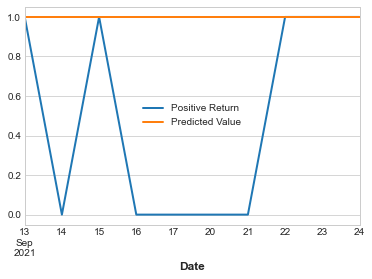

In [123]:
# Plot last 10 records of predicted vs. actual results
results[["Positive Return", "Predicted Value"]].tail(10).plot()

In [117]:
results['Return'] = df_stock['pct_change']
results

Positive Return  Predicted Value    Return
Date                                                  
2019-09-16              0.0              1.0 -0.308885
2019-09-17              1.0              1.0  0.253208
2019-09-18              1.0              1.0  0.059809
2019-09-19              0.0              1.0 -0.006641
2019-09-20              0.0              1.0 -0.472490
...                     ...              ...       ...
2021-09-20              0.0              1.0 -1.667419
2021-09-21              0.0              1.0 -0.094462
2021-09-22              1.0              1.0  0.975481
2021-09-23              1.0              1.0  1.215002
2021-09-24              1.0              1.0  0.164721

[512 rows x 3 columns]

<AxesSubplot:xlabel='Date'>

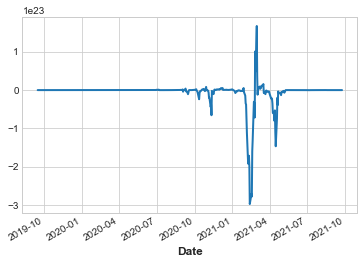

In [121]:
# Calculate cumulative return of the model
cumulative_return = (1 + (results["Return"] * results["Predicted Value"])).cumprod()

# Plotting cumulative returns
cumulative_return.plot()

<AxesSubplot:xlabel='Date'>

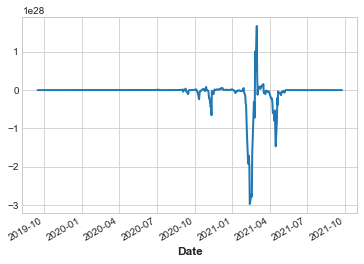

In [122]:
# Set initial capital allocation
initial_capital = 100000

# Plot cumulative return of model in terms of capital
cumulative_return_capital = initial_capital * cumulative_return
cumulative_return_capital.plot()

In [68]:
# Read your api key environment variable
from newsapi import NewsApiClient
load_dotenv()
api_key = os.getenv("NEWSAPI_KEY")

In [69]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [70]:
# Fetch the Bitcoin news articles
stock_headlines = newsapi.get_everything(q=value,
                                        language="en",
                                        page_size=100,
                                        sort_by='relevancy')
#save json
with open('stock.json', 'w') as json_file:
   json.dump(stock_headlines, json_file)

In [71]:
help(newsapi.get_everything)

Help on method get_everything in module newsapi.newsapi_client:

get_everything(q=None, sources=None, domains=None, exclude_domains=None, from_param=None, to=None, language=None, sort_by=None, page=None, page_size=None) method of newsapi.newsapi_client.NewsApiClient instance
        Search through millions of articles from over 5,000 large and small news sources and blogs.
    
        Optional parameters:
            (str) q - return headlines w/ specified coin! Valid values are:
                        'bitcoin', 'trump', 'tesla', 'ethereum', etc
    
            (str) sources - return headlines of news sources! some Valid values are:
                        'bbc-news', 'the-verge', 'abc-news', 'crypto coins news',
                        'ary news','associated press','wired','aftenposten','australian financial review','axios',
                        'bbc news','bild','blasting news','bloomberg','business insider','engadget','google news',
                        'hacker news','info

In [73]:
# Create the Bitcoin sentiment scores DataFrame
tc = pd.read_json ('stock.json')
#parse the json and load into a dataframe
stock_df = json_normalize(stock_headlines['articles'])
#drop all columns except for description
stock_df = stock_df.drop(['author', 'title', 'url','urlToImage','publishedAt','content','source.id','source.name'], axis=1)
#instantiate vader sentiment 
sentiment_title = stock_df.apply(lambda x : analyzer.polarity_scores(x['description']), axis=1)
#add a column for each sentimement metric
stock_df['Comp'] =sentiment_title.apply(lambda x : x.get('compound') )
stock_df['Pos'] =sentiment_title.apply(lambda x : x.get('pos') )
stock_df['Neu'] =sentiment_title.apply(lambda x : x.get('neu') )
stock_df['Neg'] =sentiment_title.apply(lambda x : x.get('neg') )
stock_df

description    Comp    Pos    Neu  \
0   Much to the chagrin of big tech companies, nob...  0.3818  0.109  0.833   
1   For years, civil liberties advocates have crit...  0.2023  0.081  0.858   
2   The authorities added a suspect in the attempt... -0.9313  0.000  0.613   
3   A glut of queer culture cliches, outdated refe...  0.1779  0.079  0.860   
4   Ken McCallum says his agency has helped stop s... -0.8689  0.000  0.786   
5   Casino operator Wynn Resorts (NASDAQ: WYNN) st...  0.0000  0.000  1.000   
6   Sweden's government said on Friday it would lo...  0.3400  0.102  0.853   
7   “It’s Alive!” Yes, one could say this is a Fra...  0.3382  0.113  0.827   
8   Today's article features the SPY & EGRNF and r...  0.0000  0.000  1.000   
9   Today's article features the SPY and is a cont...  0.0000  0.000  1.000   
10  Today's article features the SPY and reveals t...  0.0000  0.000  1.000   
11  Today's article features the SPY & AMZN and re...  0.6369  0.144  0.856   
12  The stock market (SPY) took a scary turn on Mo... -0.4939  0.000  0.882   
13  (Reuters) - Taliban and opposition forces were... -0.4019  0.000  0.911   
14  The three former US intelligence operatives an...  0.8074  0.303  0.561   
15  Taliban and opposition forces were fighting on... -0.3612  0.000  0.923   
16  Three former US intelligence operatives accuse...  0.5719  0.221  0.631   
17  According to Whispering Bob Harris, he was – a... -0.6486  0.078  0.720   
18  In August, ETFs listed on U.S. exchanges broug...  0.0000  0.000  1.000   
19  It’s been a volatile start to the week for the...  0.0000  0.000  1.000   
20  The easy gains that came at the start of this ...  0.6486  0.164  0.836   
21  <ol><li>Dear Evan Hansen writer hits out at "c... -0.4939  0.061  0.802   
22  Reading a good book is a great joy. And recomm...  0.9653  0.384  0.579   
23  Few terrorist organisations survive for more t... -0.8225  0.000  0.850   
24  The author and former home secretary on dislik...  0.7430  0.216  0.678   
25  Three former U.S. intelligence operatives, who...  0.8481  0.280  0.668   
26  I’d say October is going to be a rough month f... -0.8360  0.096  0.678   
27  Before Apple pushed out a security update to p... -0.4767  0.113  0.707   
28  <ol><li>Taliban, opposition forces battle for ...  0.3612  0.101  0.835   
29  The Federal Trade Commission has unanimously v... -0.3400  0.072  0.805   
30  The state security ministry is recruiting from...  0.3400  0.062  0.938   
31  Filed under:\n Spy Photos,Mercedes-Benz,Conver...  0.0000  0.000  1.000   
32  Filed under:\n Spy Photos,Aston Martin,Crossov...  0.0000  0.000  1.000   
33  Filed under:\n Green,Spy Photos,Hyundai,Electr...  0.6124  0.128  0.872   
34  There’s double-crossing intrigue in Smoke Scre...  0.4767  0.069  0.931   
35  The Federal Trade Commission has unanimously v... -0.3400  0.072  0.805   
36  The new finding underscores the complexity of ...  0.7096  0.237  0.763   
37  Hewlett Packard Enterprise Co <a href="https:/...  0.7269  0.190  0.810   
38  Daniel Craig thought he had wrapped up his ten... -0.8462  0.000  0.823   
39  Filed under:\n Design/Style,BMW,Coupe,Performa...  0.3182  0.059  0.941   
40  <ol><li>Toronto lab uncovers flaw in Apple dev... -0.1406  0.000  0.959   
41                      Style Box ETF report for JHML  0.0000  0.000  1.000   
42  Walt Disney Co said on Friday it will release ...  0.5106  0.088  0.912   
43  Tom Cruise on Thursday presented what he calle... -0.5256  0.000  0.861   
44  Alexander Litvinenko, a former Russian intelli... -0.1280  0.098  0.789   
45                      Style Box ETF report for USMC  0.0000  0.000  1.000   
46                      Style Box ETF report for JPUS  0.0000  0.000  1.000   
47                     Smart Beta ETF report for EQAL  0.4019  0.351  0.649   
48                     Smart Beta ETF report for FLQL  0.4019  0.351  0.649   
49  <ol><li>New Ray-Ban and Facebook ‘smart glasse...  0.8316  0.240  0.760   
50  <ol><li>A

In [74]:
# Describe the Bitcoin Sentiment
stock_df.describe()

Comp         Pos        Neu         Neg
count  100.000000  100.000000  100.00000  100.000000
mean     0.105981    0.092330    0.85235    0.055360
std      0.498532    0.107463    0.11865    0.072421
min     -0.931300    0.000000    0.39400    0.000000
25%     -0.323650    0.000000    0.79125    0.000000
50%      0.012900    0.071500    0.86050    0.014500
75%      0.545550    0.135250    0.93875    0.107500
max      0.965300    0.606000    1.00000    0.387000

In [75]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from string import punctuation
import re

In [76]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [77]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a list of the words
    tokens = word_tokenize(re_clean)
    # Convert the words to lowercase
    tokens = [t.lower() for t in tokens]
    # Remove the punctuation
    words = [t.translate(str.maketrans('','',string.punctuation)) for t in tokens]
    # Remove the stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    # Lemmatize Words into root words
    tokens = ', '.join([lemmatizer.lemmatize(word) for word in words])
    return tokens

In [79]:
# Create a new tokens column for Bitcoin
stock_df['tokens'] = stock_df.apply(lambda x : tokenizer(x['description']), axis=1)
stock_df

description    Comp    Pos    Neu  \
0   Much to the chagrin of big tech companies, nob...  0.3818  0.109  0.833   
1   For years, civil liberties advocates have crit...  0.2023  0.081  0.858   
2   The authorities added a suspect in the attempt... -0.9313  0.000  0.613   
3   A glut of queer culture cliches, outdated refe...  0.1779  0.079  0.860   
4   Ken McCallum says his agency has helped stop s... -0.8689  0.000  0.786   
5   Casino operator Wynn Resorts (NASDAQ: WYNN) st...  0.0000  0.000  1.000   
6   Sweden's government said on Friday it would lo...  0.3400  0.102  0.853   
7   “It’s Alive!” Yes, one could say this is a Fra...  0.3382  0.113  0.827   
8   Today's article features the SPY & EGRNF and r...  0.0000  0.000  1.000   
9   Today's article features the SPY and is a cont...  0.0000  0.000  1.000   
10  Today's article features the SPY and reveals t...  0.0000  0.000  1.000   
11  Today's article features the SPY & AMZN and re...  0.6369  0.144  0.856   
12  The stock market (SPY) took a scary turn on Mo... -0.4939  0.000  0.882   
13  (Reuters) - Taliban and opposition forces were... -0.4019  0.000  0.911   
14  The three former US intelligence operatives an...  0.8074  0.303  0.561   
15  Taliban and opposition forces were fighting on... -0.3612  0.000  0.923   
16  Three former US intelligence operatives accuse...  0.5719  0.221  0.631   
17  According to Whispering Bob Harris, he was – a... -0.6486  0.078  0.720   
18  In August, ETFs listed on U.S. exchanges broug...  0.0000  0.000  1.000   
19  It’s been a volatile start to the week for the...  0.0000  0.000  1.000   
20  The easy gains that came at the start of this ...  0.6486  0.164  0.836   
21  <ol><li>Dear Evan Hansen writer hits out at "c... -0.4939  0.061  0.802   
22  Reading a good book is a great joy. And recomm...  0.9653  0.384  0.579   
23  Few terrorist organisations survive for more t... -0.8225  0.000  0.850   
24  The author and former home secretary on dislik...  0.7430  0.216  0.678   
25  Three former U.S. intelligence operatives, who...  0.8481  0.280  0.668   
26  I’d say October is going to be a rough month f... -0.8360  0.096  0.678   
27  Before Apple pushed out a security update to p... -0.4767  0.113  0.707   
28  <ol><li>Taliban, opposition forces battle for ...  0.3612  0.101  0.835   
29  The Federal Trade Commission has unanimously v... -0.3400  0.072  0.805   
30  The state security ministry is recruiting from...  0.3400  0.062  0.938   
31  Filed under:\n Spy Photos,Mercedes-Benz,Conver...  0.0000  0.000  1.000   
32  Filed under:\n Spy Photos,Aston Martin,Crossov...  0.0000  0.000  1.000   
33  Filed under:\n Green,Spy Photos,Hyundai,Electr...  0.6124  0.128  0.872   
34  There’s double-crossing intrigue in Smoke Scre...  0.4767  0.069  0.931   
35  The Federal Trade Commission has unanimously v... -0.3400  0.072  0.805   
36  The new finding underscores the complexity of ...  0.7096  0.237  0.763   
37  Hewlett Packard Enterprise Co <a href="https:/...  0.7269  0.190  0.810   
38  Daniel Craig thought he had wrapped up his ten... -0.8462  0.000  0.823   
39  Filed under:\n Design/Style,BMW,Coupe,Performa...  0.3182  0.059  0.941   
40  <ol><li>Toronto lab uncovers flaw in Apple dev... -0.1406  0.000  0.959   
41                      Style Box ETF report for JHML  0.0000  0.000  1.000   
42  Walt Disney Co said on Friday it will release ...  0.5106  0.088  0.912   
43  Tom Cruise on Thursday presented what he calle... -0.5256  0.000  0.861   
44  Alexander Litvinenko, a former Russian intelli... -0.1280  0.098  0.789   
45                      Style Box ETF report for USMC  0.0000  0.000  1.000   
46                      Style Box ETF report for JPUS  0.0000  0.000  1.000   
47                     Smart Beta ETF report for EQAL  0.4019  0.351  0.649   
48                     Smart Beta ETF report for FLQL  0.4019  0.351  0.649   
49  <ol><li>New Ray-Ban and Facebook ‘smart glasse...  0.8316  0.240  0.760   
50  <ol><li>A

In [80]:
from collections import Counter
from nltk import ngrams
import nltk, re, string, collections
from collections import Counter
from nltk import ngrams
from nltk.collocations import *
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
#import janitor as jn
#import ConfigParser

In [81]:
# Generate the Bitcoin N-grams where N=2
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
#determine counts in the token column
sparse_matrix = word_vectorizer.fit_transform(stock_df['tokens'])
#sum counts
frequencies = sum(sparse_matrix).toarray()[0]
#create dataframe with ngram and count
stock_df_freq_2 = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
stock_df_freq_2 = stock_df_freq_2.sort_values(by='frequency', ascending=False)
stock_df_freq_2.head(10)

frequency
spy photo                    8
continue reading             6
james bond                   6
appeared autoblog            5
etf report                   5
originally appeared          5
former intelligence          4
thing need                   4
article feature              4
smart glass                  4

In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [83]:
#join all text in tokens column into 1 string
corpus_stock = stock_df['tokens'].str.cat(sep=', ')

In [85]:
# Generate the Bitcoin word cloud
#create word cloud
wc = WordCloud(background_color="white", max_words=200)
wc.generate(corpus_stock)
f = plt.figure(figsize=(150,150))
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title("Stock WORD CLOUD",fontsize=100)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [95]:
import spacy
from spacy import displacy

AttributeError: type object 'h5py.h5.H5PYConfig' has no attribute '__reduce_cython__'

In [ ]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Concatenate all of the Bitcoin text together
concat_stock = stock_df['description'].str.cat(sep=', ')

Weekly Analysis

In [63]:
stock_df_wk = stock.history(period="20y", interval='1wk')
stock_df.index.duplicated().sum()
df_stock_wk = stock_df_wk.loc[~stock_df_wk.index.duplicated(keep='first')]
df_stock_wk.dropna(inplace=True)
df_stock_wk

Open        High         Low       Close       Volume  \
Date                                                                      
2001-09-24   67.970818   74.718824   67.520948   71.188049  111827300.0   
2001-10-01   70.819982   74.275779   70.090653   73.089767  134806500.0   
2001-10-08   72.435378   75.182296   71.924165   74.637001  103300800.0   
2001-10-15   74.044000   75.761677   72.258168   73.171532   99714900.0   
2001-10-22   73.137458   76.197915   72.755750   75.195938  101759500.0   
...                ...         ...         ...         ...          ...   
2021-08-30  449.529870  452.600021  449.270691  451.633118  246050500.0   
2021-09-06  451.264290  451.363977  443.887927  444.017517  255671800.0   
2021-09-13  447.207318  447.486422  439.611626  439.990417  436734800.0   
2021-09-20  434.880005  444.890015  428.859985  443.910004  499743500.0   
2021-09-24  441.440002  444.670013  441.209991  443.910004   62094837.0   

            Dividends  Stock Splits  
Date                                 
2001-09-24        0.0             0  
2001-10-01        0.0             0  
2001-10-08        0.0             0  
2001-10-15        0.0             0  
2001-10-22        0.0             0  
...               ...           ...  
2021-08-30        0.0             0  
2021-09-06        0.0             0  
2021-09-13        0.0             0  
2021-09-20        0.0             0  
2021-09-24        0.0             0  

[1045 rows x 7 columns]

In [64]:
# calculate Bollinger Bands on weekly data
# moving average
#m_avg = df_stock['Close'].rolling(window=length).mean()
m_avg_wk = df_stock_wk['Close'].ewm(span=length).mean()
df_stock_wk['Moving average weekly'] = m_avg_wk
# standard deviation
m_std_wk = df_stock_wk['Close'].rolling(window=length).std(ddof=0)
# upper Bollinger Bands
df_stock_wk['upper_BB'] = m_avg_wk + mult * m_std_wk
# lower Bollinger Bands 
df_stock_wk['lower_BB'] = m_avg_wk - mult * m_std_wk

In [65]:
#Stacked Moving averages weekly
m_avg_08_wk = df_stock_wk['Close'].ewm(span=8).mean()
m_avg_21_wk = df_stock_wk['Close'].ewm(span=21).mean()
m_avg_34_wk = df_stock_wk['Close'].ewm(span=34).mean()
m_avg_55_wk = df_stock_wk['Close'].ewm(span=55).mean()
m_avg_89_wk = df_stock_wk['Close'].ewm(span=89).mean()

df_stock_wk['m_avg_08'] = m_avg_08_wk
df_stock_wk['m_avg_21'] = m_avg_21_wk
df_stock_wk['m_avg_34'] = m_avg_34_wk
df_stock_wk['m_avg_55'] = m_avg_55_wk
df_stock_wk['m_avg_89'] = m_avg_89_wk

In [66]:
# calculate Keltner Channel weekly
# first we need to calculate True Range
df_stock_wk['tr0'] = abs(df_stock_wk["High"] - df_stock_wk["Low"])
df_stock_wk['tr1'] = abs(df_stock_wk["High"] - df_stock_wk["Close"].shift())
df_stock_wk['tr2'] = abs(df_stock_wk["Low"] - df_stock_wk["Close"].shift())
df_stock_wk['tr'] = df_stock_wk[['tr0', 'tr1', 'tr2']].max(axis=1)
# moving average of the TR
range_ma_wk = df_stock_wk['tr'].ewm(span=length_KC).mean()
# upper Keltner Channel
df_stock_wk['upper_KC'] = m_avg_wk + range_ma_wk * mult_KC
# lower Keltner Channel
df_stock_wk['lower_KC'] = m_avg_wk - range_ma_wk * mult_KC

In [67]:
#ADX Calculations weekly

plus_dm_wk = df_stock_wk["High"].diff()
minus_dm_wk = df_stock_wk["Low"].diff()
plus_dm_wk[plus_dm_wk < 0] = 0
minus_dm_wk[minus_dm_wk > 0] = 0

df_stock_wk['atr'] = df_stock_wk['tr'].ewm(span=14).mean()
df_stock_wk['plus_di'] = 100 * (plus_dm_wk.ewm(alpha = 1/14).mean() / df_stock_wk['atr'])
df_stock_wk['minus_di'] = abs(100 * (minus_dm_wk.ewm(alpha = 1/14).mean() / df_stock_wk['atr']))
dx_wk = (abs(df_stock_wk['plus_di'] - df_stock_wk['minus_di']) / abs(df_stock_wk['plus_di'] + df_stock_wk['minus_di'])) * 100
adx_wk = ((dx_wk.shift(1) * (14 - 1)) + dx_wk) / 14
df_stock_wk['adx'] = adx_wk.ewm(alpha = 1/14).mean()

In [68]:
# check for 'squeeze' weekly
df_stock_wk['squeeze_on'] = (df_stock_wk['lower_BB'] > df_stock_wk['lower_KC']) & (df_stock_wk['upper_BB'] < df_stock_wk['upper_KC'])
df_stock_wk['squeeze_off'] = (df_stock_wk['lower_BB'] < df_stock_wk['lower_KC']) & (df_stock_wk['upper_BB'] > df_stock_wk['upper_KC'])

In [69]:
# Momentum weekly
highest_wk = df_stock_wk['High'].rolling(window = length_KC).max()
lowest_wk = df_stock_wk['Low'].rolling(window = length_KC).min()
m1_wk = (highest_wk + lowest_wk) / 2
df_stock_wk['value'] = (df_stock_wk['Close'] - (m1_wk + m_avg_wk)/2)
fit_y_wk = np.array(range(0,length_KC))
df_stock_wk['value'] = df_stock_wk['value'].rolling(window = length_KC).apply(lambda x : np.polyfit(fit_y_wk, x, 1)[0] * (length_KC-1) +
   np.polyfit(fit_y_wk, x, 1)[1], raw=True)

df_stock_wk[['squeeze_on', 'squeeze_off']] = (df_stock_wk[['squeeze_on', 'squeeze_off']] == True).astype(int)

df_stock_wk["pct_change"] = df_stock_wk['Close'].pct_change()

"""
conditions = [
    (df_stock['pct_change'] > 0) | (df_stock['squeeze_on'] == 1),
    (df_stock['pct_change'] < 0) | (df_stock['squeeze_on'] == 0)
]
"""
conditions_wk =  [
    (df_stock_wk['pct_change'] > 0),
    (df_stock_wk['pct_change'] < 0)
]

label = [1, 0]
df_stock_wk['profitable?'] = np.select(conditions_wk, label) 
df_stock_wk.dropna(inplace=True)
df_stock_wk

Open        High         Low       Close       Volume  \
Date                                                                      
2002-07-01   68.267667   68.694428   64.509436   68.357147  104063400.0   
2002-07-08   68.130006   68.625593   62.169145   63.222275  196756600.0   
2002-07-15   63.077756   64.220372   58.025481   58.307690  289709500.0   
2002-07-22   57.887769   59.147397   53.468751   58.920250  388024300.0   
2002-07-29   60.228060   63.015761   58.934019   59.739353  264039800.0   
...                ...         ...         ...         ...          ...   
2021-08-30  449.529870  452.600021  449.270691  451.633118  246050500.0   
2021-09-06  451.264290  451.363977  443.887927  444.017517  255671800.0   
2021-09-13  447.207318  447.486422  439.611626  439.990417  436734800.0   
2021-09-20  434.880005  444.890015  428.859985  443.910004  499743500.0   
2021-09-24  441.440002  444.670013  441.209991  443.910004   62094837.0   

            Dividends  Stock Splits  Moving average weekly    upper_BB  \
Date                                                                     
2002-07-01        0.0             0              73.121661   80.749640   
2002-07-08        0.0             0              72.164560   81.234791   
2002-07-15        0.0             0              70.826771   81.975048   
2002-07-22        0.0             0              69.678774   81.895409   
2002-07-29        0.0             0              68.721569   81.463855   
...               ...           ...                    ...         ...   
2021-08-30        0.0             0             428.025108  453.515679   
2021-09-06        0.0             0             429.548194  454.982262   
2021-09-13        0.0             0             430.542692  455.297327   
2021-09-20        0.0             0             431.815769  456.520458   
2021-09-24        0.0             0             432.967601  456.587287   

              lower_BB    m_avg_08    m_avg_21    m_avg_34    m_avg_55  \
Date                                                                     
2002-07-01   65.493681   70.469141   73.245306   74.235836   74.834345   
2002-07-08   63.094329   68.858684   72.317173   73.548420   74.304632   
2002-07-15   59.678495   66.513971   71.022085   72.602153   73.582049   
2002-07-22   57.462140   64.826451   69.905061   71.756851   72.925979   
2002-07-29   55.979283   63.695971   68.968051   71.017809   72.341200   
...                ...         ...         ...         ...         ...   
2021-08-30  402.534537  442.060738  426.867533  412.259489  391.825208   
2021-09-06  404.114127  442.495578  428.426623  414.074233  393.689219   
2021-09-13  405.788056  441.938875  429.477877  415.555158  395.342833   
2021-09-20  407.111080  442.376904  430.789888  417.175435  397.077375   
2021-09-24  409.347915  442.717593  431.982626  418.703124  398.749969   

              m_avg_89        tr0       tr1        tr2         tr    upper_KC  \
Date                                                                            
2002-07-01   75.169068   4.184992  0.578149   3.606844   4.184992   79.503828   
2002-07-08   74.734473   6.456448  0.268446   6.188003   6.456448   79.151473   
2002-07-15   74.145247   6.194891  0.998097   5.196794   6.194891   78.313145   
2002-07-22   73.606482   5.678646  0.839707   4.838938   5.678646   77.522442   
2002-07-29   73.122144   4.081742  4.095511   0.013769   4.095511   76.597254   
...                ...        ...       ...        ...        ...         ...   
2021-08-30  366.772123   3.329330  3.787857   0.458527   3.787857  445.558691   
2021-09-06  368.488687   7.476049  0.269141   7.745190   7.745190  446.896032   
2021-09-13  370.077614   7.874796  3.468905   4.405891   7.874796  447.745235   
2021-09-20  371.718334  16.030029  4.899597  11.130432  16.030029  450.368995   
2021-09-24  373.322593   3.460022  0.760010   2.700012   3.460022  450.463265   

              lower_KC       atr    plus_di   minus_di        

In [70]:
# entry point for long position:
# 1. black cross becomes gray (the squeeze is released)
long_cond1_wk = (df_stock_wk['squeeze_off'][-2] == 0) | (df_stock_wk['squeeze_off'][-1] == 1) 
# 2. bar value is positive => the bar is light green
long_cond2_wk = df_stock_wk['value'][-1] > 0

enter_long_wk = long_cond1_wk and long_cond2_wk
# entry point for short position:
# 1. black cross becomes gray (the squeeze is released)
short_cond1_wk = (df_stock_wk['squeeze_off'][-2] == 0) | (df_stock_wk['squeeze_off'][-1] == 1) 
# 2. bar value is negative => the bar is light red 
short_cond2_wk = df_stock_wk['value'][-1] < 0
enter_short_wk = short_cond1_wk and short_cond2_wk

In [71]:
ohcl_wk = df_stock_wk[['Open', 'High', 'Close', 'Low']]
ohcl_wk.head()

Open       High      Close        Low
Date                                                  
2002-07-01  68.267667  68.694428  68.357147  64.509436
2002-07-08  68.130006  68.625593  63.222275  62.169145
2002-07-15  63.077756  64.220372  58.307690  58.025481
2002-07-22  57.887769  59.147397  58.920250  53.468751
2002-07-29  60.228060  63.015761  59.739353  58.934019

In [72]:
# add colors for the 'value bar'
colors = []
for ind, val in enumerate(df_stock_wk['value']):
  if val >= 0:
    color = 'blue'
    if val > df_stock_wk['value'][ind-1]:
      color = 'cyan'
  else:
    color = 'yellow'
    if val < df_stock_wk['value'][ind-1]:
      color='red'
  colors.append(color)

In [73]:
df_stock_wk['colors'] = colors

In [74]:
# add 2 subplots: 1. bars, 2. crosses
apds = [mpf.make_addplot(df_stock_wk['value'], panel=1, type='bar', color=colors, alpha=0.8, secondary_y=False),
        mpf.make_addplot([0] * len(df_stock_wk), panel=1, type='scatter', marker='o', markersize=50, color=['gray' if s else 'red' for s in df_stock_wk['squeeze_off']], secondary_y=False),
        mpf.make_addplot(df_stock_wk[['upper_BB']], color = 'red'),
        mpf.make_addplot(df_stock_wk[['lower_BB']], color = 'red'),
        mpf.make_addplot(df_stock_wk[['upper_KC']], color = 'blue'),
        mpf.make_addplot(df_stock_wk[['lower_KC']], color = 'blue'),
        mpf.make_addplot(df_stock_wk['Moving average weekly'], color = 'black'),
        mpf.make_addplot(df_stock_wk['m_avg_08'], color='green'),
        mpf.make_addplot(df_stock_wk['m_avg_34'], color='orange'),
        mpf.make_addplot(df_stock_wk[['adx']], panel=2, color = 'purple', secondary_y=False),
        mpf.make_addplot(df_stock_wk[['plus_di']], panel=2, color = 'green', secondary_y=False),
        mpf.make_addplot(df_stock_wk[['minus_di']], panel=2, color = 'orange', secondary_y=False),
        mpf.make_addplot(df_stock_wk['m_avg_08'], panel=3, color='red', secondary_y=False),
        mpf.make_addplot(df_stock_wk['m_avg_21'], panel=3, color='orange', secondary_y=False),
        mpf.make_addplot(df_stock_wk['m_avg_34'], panel=3, color='yellow', secondary_y=False),
        mpf.make_addplot(df_stock_wk['m_avg_55'], panel=3, color='green', secondary_y=False),
        mpf.make_addplot(df_stock_wk['m_avg_89'], panel=3, color='blue', secondary_y=False)]

# plot ohcl with subplots
fig, axes = mpf.plot(ohcl_wk, 
              volume_panel = 2,
              figratio=(2,1),
              figscale=1,
              type='candle', 
              addplot=apds,
              returnfig=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [75]:
def stochastics( dataframe, low, high, close, k, d ):
    """
    Fast stochastic calculation
    %K = (Current Close - Lowest Low)/
    (Highest High - Lowest Low) * 100
    %D = 3-day SMA of %K

    Slow stochastic calculation
    %K = %D of fast stochastic
    %D = 3-day SMA of %K

    When %K crosses above %D, buy signal 
    When the %K crosses below %D, sell signal
    """

    df = dataframe.copy()

    # Set minimum low and maximum high of the k stoch
    low_min  = df[low].rolling( window = k ).min()
    high_max = df[high].rolling( window = k ).max()

    # Fast Stochastic
    df['k_fast'] = 100 * (df[close] - low_min)/(high_max - low_min)
    df['d_fast'] = df['k_fast'].rolling(window = d).mean()

    # Slow Stochastic
    df['k_slow'] = df["d_fast"]
    df['d_slow'] = df['k_slow'].rolling(window = d).mean()

    return df


stochs_wk = stochastics( df_stock_wk, 'Low', 'High', 'Close', 14, 3 )
slow_k_wk = stochs_wk['k_slow'].values
fast_k_wk = stochs_wk['k_fast'].values
df_stock_wk["slow_K"] = slow_k_wk
df_stock_wk['fast_K'] = fast_k_wk
df_stock_wk

Open        High         Low       Close       Volume  \
Date                                                                      
2002-07-01   68.267667   68.694428   64.509436   68.357147  104063400.0   
2002-07-08   68.130006   68.625593   62.169145   63.222275  196756600.0   
2002-07-15   63.077756   64.220372   58.025481   58.307690  289709500.0   
2002-07-22   57.887769   59.147397   53.468751   58.920250  388024300.0   
2002-07-29   60.228060   63.015761   58.934019   59.739353  264039800.0   
...                ...         ...         ...         ...          ...   
2021-08-30  449.529870  452.600021  449.270691  451.633118  246050500.0   
2021-09-06  451.264290  451.363977  443.887927  444.017517  255671800.0   
2021-09-13  447.207318  447.486422  439.611626  439.990417  436734800.0   
2021-09-20  434.880005  444.890015  428.859985  443.910004  499743500.0   
2021-09-24  441.440002  444.670013  441.209991  443.910004   62094837.0   

            Dividends  Stock Splits  Moving average weekly    upper_BB  \
Date                                                                     
2002-07-01        0.0             0              73.121661   80.749640   
2002-07-08        0.0             0              72.164560   81.234791   
2002-07-15        0.0             0              70.826771   81.975048   
2002-07-22        0.0             0              69.678774   81.895409   
2002-07-29        0.0             0              68.721569   81.463855   
...               ...           ...                    ...         ...   
2021-08-30        0.0             0             428.025108  453.515679   
2021-09-06        0.0             0             429.548194  454.982262   
2021-09-13        0.0             0             430.542692  455.297327   
2021-09-20        0.0             0             431.815769  456.520458   
2021-09-24        0.0             0             432.967601  456.587287   

              lower_BB    m_avg_08    m_avg_21    m_avg_34    m_avg_55  \
Date                                                                     
2002-07-01   65.493681   70.469141   73.245306   74.235836   74.834345   
2002-07-08   63.094329   68.858684   72.317173   73.548420   74.304632   
2002-07-15   59.678495   66.513971   71.022085   72.602153   73.582049   
2002-07-22   57.462140   64.826451   69.905061   71.756851   72.925979   
2002-07-29   55.979283   63.695971   68.968051   71.017809   72.341200   
...                ...         ...         ...         ...         ...   
2021-08-30  402.534537  442.060738  426.867533  412.259489  391.825208   
2021-09-06  404.114127  442.495578  428.426623  414.074233  393.689219   
2021-09-13  405.788056  441.938875  429.477877  415.555158  395.342833   
2021-09-20  407.111080  442.376904  430.789888  417.175435  397.077375   
2021-09-24  409.347915  442.717593  431.982626  418.703124  398.749969   

              m_avg_89        tr0       tr1        tr2         tr    upper_KC  \
Date                                                                            
2002-07-01   75.169068   4.184992  0.578149   3.606844   4.184992   79.503828   
2002-07-08   74.734473   6.456448  0.268446   6.188003   6.456448   79.151473   
2002-07-15   74.145247   6.194891  0.998097   5.196794   6.194891   78.313145   
2002-07-22   73.606482   5.678646  0.839707   4.838938   5.678646   77.522442   
2002-07-29   73.122144   4.081742  4.095511   0.013769   4.095511   76.597254   
...                ...        ...       ...        ...        ...         ...   
2021-08-30  366.772123   3.329330  3.787857   0.458527   3.787857  445.558691   
2021-09-06  368.488687   7.476049  0.269141   7.745190   7.745190  446.896032   
2021-09-13  370.077614   7.874796  3.468905   4.405891   7.874796  447.745235   
2021-09-20  371.718334  16.030029  4.899597  11.130432  16.030029  450.368995   
2021-09-24  373.322593   3.460022  0.760010   2.700012   3.460022  450.463265   

              lower_KC       atr    plus_di   minus_di        

In [76]:
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

df_stock_wk['rsi_14'] = get_rsi(df_stock_wk['Close'], 14)
df_stock_wk = df_stock_wk.dropna()
df_stock_wk['Overbought'] = 70
df_stock_wk['Oversold'] = 30
df_stock_wk

Open        High         Low       Close       Volume  \
Date                                                                      
2002-10-14   57.525042   61.742628   57.414420   61.286297  301912800.0   
2002-10-21   60.926761   62.848871   60.546486   62.364883  240391200.0   
2002-10-28   63.021722   63.118518   60.152383   62.413280  234112400.0   
2002-11-04   63.471141   64.349225   61.894729   61.984615  240841900.0   
2002-11-11   61.887792   63.298262   60.463491   63.194550  206170000.0   
...                ...         ...         ...         ...          ...   
2021-08-30  449.529870  452.600021  449.270691  451.633118  246050500.0   
2021-09-06  451.264290  451.363977  443.887927  444.017517  255671800.0   
2021-09-13  447.207318  447.486422  439.611626  439.990417  436734800.0   
2021-09-20  434.880005  444.890015  428.859985  443.910004  499743500.0   
2021-09-24  441.440002  444.670013  441.209991  443.910004   62094837.0   

            Dividends  Stock Splits  Moving average weekly    upper_BB  \
Date                                                                     
2002-10-14        0.0             0              63.033813   71.721885   
2002-10-21        0.0             0              62.969892   70.813289   
2002-10-28        0.0             0              62.916721   70.025092   
2002-11-04        0.0             0              62.827707   69.355310   
2002-11-11        0.0             0              62.862731   68.734883   
...               ...           ...                    ...         ...   
2021-08-30        0.0             0             428.025108  453.515679   
2021-09-06        0.0             0             429.548194  454.982262   
2021-09-13        0.0             0             430.542692  455.297327   
2021-09-20        0.0             0             431.815769  456.520458   
2021-09-24        0.0             0             432.967601  456.587287   

              lower_BB    m_avg_08    m_avg_21    m_avg_34    m_avg_55  \
Date                                                                     
2002-10-14   54.345741   59.826746   63.284006   65.803648   67.899087   
2002-10-21   55.126495   60.390777   63.200082   65.600031   67.672991   
2002-10-28   55.808351   60.840222   63.128269   65.411726   67.459208   
2002-11-04   56.300103   61.094532   63.023924   65.209612   67.237783   
2002-11-11   56.990579   61.561203   63.039486   65.090991   67.075021   
...                ...         ...         ...         ...         ...   
2021-08-30  402.534537  442.060738  426.867533  412.259489  391.825208   
2021-09-06  404.114127  442.495578  428.426623  414.074233  393.689219   
2021-09-13  405.788056  441.938875  429.477877  415.555158  395.342833   
2021-09-20  407.111080  442.376904  430.789888  417.175435  397.077375   
2021-09-24  409.347915  442.717593  431.982626  418.703124  398.749969   

              m_avg_89        tr0       tr1        tr2         tr    upper_KC  \
Date                                                                            
2002-10-14   69.327529   4.328208  3.553854   0.774354   4.328208   71.109427   
2002-10-21   69.113296   2.302386  1.562574   0.739811   2.302386   70.728590   
2002-10-28   68.908890   2.966135  0.753635   2.212501   2.966135   70.508718   
2002-11-04   68.699378   2.454496  1.935945   0.518551   2.454496   70.174909   
2002-11-11   68.534143   2.834771  1.313646   1.521124   2.834771   70.056916   
...                ...        ...       ...        ...        ...         ...   
2021-08-30  366.772123   3.329330  3.787857   0.458527   3.787857  445.558691   
2021-09-06  368.488687   7.476049  0.269141   7.745190   7.745190  446.896032   
2021-09-13  370.077614   7.874796  3.468905   4.405891   7.874796  447.745235   
2021-09-20  371.718334  16.030029  4.899597  11.130432  16.030029  450.368995   
2021-09-24  373.322593   3.460022  0.760010   2.700012   3.460022  450.463265   

              lower_KC       atr    plus_di   minus_di        

In [77]:
apds2 = [mpf.make_addplot(df_stock_wk['value'], panel=1, type='bar', color=colors, alpha=0.8, secondary_y=False),
         mpf.make_addplot([0] * len(df_stock_wk), panel=1, type='scatter', marker='o', markersize=50, color=['gray' if s else 'red' for s in df_stock_wk['squeeze_off']], secondary_y=False),
         mpf.make_addplot(df_stock_wk[['upper_BB']], color = 'red'),
         mpf.make_addplot(df_stock_wk[['lower_BB']], color = 'red'),
         mpf.make_addplot(df_stock_wk[['upper_KC']], color = 'blue'),
         mpf.make_addplot(df_stock_wk[['lower_KC']], color = 'blue'),
         mpf.make_addplot(df_stock_wk['Moving average weekly'], color = 'black'),
         mpf.make_addplot(df_stock_wk['m_avg_08'], color = 'green'),
         mpf.make_addplot(df_stock_wk['m_avg_34'], color = 'orange'),
         mpf.make_addplot(df_stock_wk['slow_K'], panel=2, color = 'red'),
         mpf.make_addplot(df_stock_wk['fast_K'], panel=2, color = 'blue'),
         mpf.make_addplot(df_stock_wk['Overbought'], panel=2, color = 'green'),
         mpf.make_addplot(df_stock_wk['Oversold'], panel=2, color = 'red'),
         mpf.make_addplot(df_stock_wk['Overbought'], panel=3, color = 'green'),
         mpf.make_addplot(df_stock_wk['Oversold'], panel=3, color = 'red'),
         mpf.make_addplot(df_stock_wk['rsi_14'], panel=3, color='purple')]
fig, axes = mpf.plot(df_stock_wk, 
              volume_panel = 2,
              figratio=(2,1),
              figscale=1,
              type='candle', 
              addplot=apds2,
              returnfig=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [78]:
for i in range(2,df_stock_wk.shape[0]):
    current = df_stock_wk.iloc[i,:]
    prev = df_stock_wk.iloc[i-1,:]
    prev_2 = df_stock_wk.iloc[i-2,:]
    realbody = abs(current['Open'] - current['Close'])
    candle_range = current['High'] - current['Low']
    idx = df_stock_wk.index[i]  
# Bullish swing
    df_stock_wk.loc[idx,'Bullish swing'] = current['Low'] > prev['Low'] and prev['Low'] < prev_2['Low']
# Bearish swing
    df_stock_wk.loc[idx,'Bearish swing'] = current['High'] < prev['High'] and prev['High'] > prev_2['High']
# Bullish pinbar
    df_stock_wk.loc[idx,'Bullish pinbar'] = realbody <= candle_range/3 and  min(current['Open'], current['Close']) > (current['High'] + current['Low'])/2 and current['Low'] < prev['Low']
# Bearish pinbar
    df_stock_wk.loc[idx,'Bearish pinbar'] = realbody <= candle_range/3 and max(current['Open'] , current['Close']) < (current['High'] + current['Low'])/2 and current['High'] > prev['High']
    
  # Inside bar
    df_stock_wk.loc[idx,'Inside bar'] = current['High'] < prev['High'] and current['Low'] > prev['Low']
    
  # Outside bar
    df_stock_wk.loc[idx,'Outside bar'] = current['High'] > prev['High'] and current['Low'] < prev['Low']
  
  # Bullish engulfing
    df_stock_wk.loc[idx,'Bullish engulfing'] = current['High'] > prev['High'] and current['Low'] < prev['Low'] and realbody >= 0.8 * candle_range and current['Close'] > current['Open']
# Bearish engulfing
    df_stock_wk.loc[idx,'Bearish engulfing'] = current['High'] > prev['High'] and current['Low'] < prev['Low'] and realbody >= 0.8 * candle_range and current['Close'] < current['Open']

df_stock_wk.fillna(False, inplace=True)

In [79]:
columns = ['Bullish swing', 'Bearish swing', 'Bullish pinbar', 'Bearish pinbar', 'Inside bar', 'Outside bar', 'Bullish engulfing','Bearish engulfing']


def convert(df):
    patterns = []
    for i in columns:
        if df[i]:
            patterns.append(i)
    #df['patterns'] = patterns
    if not patterns:
        patterns.append('No pattern')
    return patterns

In [80]:
#df_stock_dow.apply(convert, axis=1)
df_stock_wk['pattern'] = df_stock_wk.apply(convert, axis = 1)

In [81]:
df_stock_wk['pattern'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[No pattern]                                  371
[Bullish swing]                               152
[Bearish swing]                               126
[Outside bar]                                  81
[Bearish pinbar]                               52
[Bearish swing, Bullish pinbar]                36
[Bearish swing, Inside bar]                    31
[Bullish pinbar]                               28
[Bullish swing, Inside bar]                    27
[Bullish swing, Bearish swing, Inside bar]     18
[Bullish pinbar, Outside bar]                  17
[Bullish swing, Bearish pinbar]                17
[Outside bar, Bearish engulfing]               13
[Outside bar, Bullish engulfing]               10
[Bearish pinbar, Outside bar]                   7
[Inside bar]                                    4
Name: pattern, dtype: int64

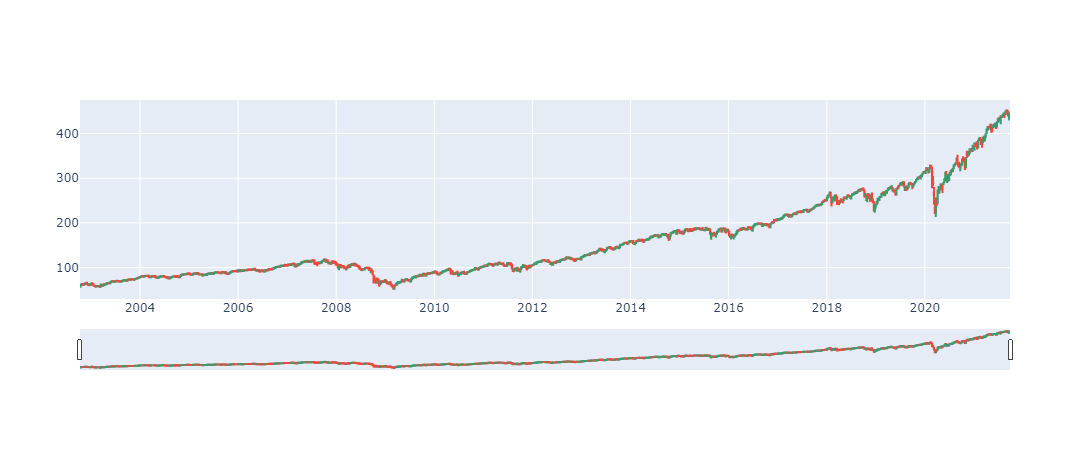

In [82]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df_stock_wk.index,
                open=df_stock_wk['Open'],
                high=df_stock_wk['High'],
                low=df_stock_wk['Low'],
                close=df_stock_wk['Close'])])
fig.update_traces(text=df_stock_wk['pattern'], selector=dict(type='candlestick'))
fig.show()

In [83]:
today = df_stock_wk['pattern'][-1]
for i in today:
    print(f'Todays pattern is {i}, {pattern_dict[i]}')

Todays pattern is Bullish swing, upswing pattern
Todays pattern is Inside bar, trend change


In [84]:
#checks the momentum based on the EMA's stacking
#If smaller EMA's stack above the larger, the momentum is positive, vice versa, negative
def momentum_checker_wk(index):
    if (df_stock_wk['m_avg_08'][index] > df_stock_wk['m_avg_21'][index] > df_stock_wk['m_avg_34'][index] > df_stock_wk['m_avg_55'][index] > df_stock_wk['m_avg_89'][index]):
        print('Positive momentum')
    elif (df_stock_wk['m_avg_08'][index] < df_stock_wk['m_avg_21'][index] < df_stock_wk['m_avg_34'][index] < df_stock_wk['m_avg_55'][index] < df_stock_wk['m_avg_89'][index]):
        print('Negative momentum')
    else:
        print('neutral')

In [85]:
df_stock_wk['ADX_trend'] = 20

def ADX_trend_flag_wk(index):
    if (df_stock_wk['adx'][index] > df_stock_wk['ADX_trend'][index]) and (df_stock_wk['plus_di'][index] > df_stock_wk['minus_di'][index]):
        print('positive trend')
    elif (df_stock_wk['adx'][index] > df_stock_wk['ADX_trend'][index]) and (df_stock_wk['plus_di'][index] < df_stock_wk['minus_di'][index]):
        print('negative trend')
    elif (df_stock_wk['adx'][index] < df_stock_wk['ADX_trend'][index]):
        print('neutral or sideways trend')

In [86]:
def warning_wk(index):
    if (df_stock_wk['m_avg_08'][index] < df_stock_wk['m_avg_21'][index]):
        print('Warning, stock maybe heading down, consider puts on pullback to the 8 EMA, and hold off on long positions.  Watch ADX for negative trend. If this happens with any of the market indices such as SPY, QQQ, or DJI, hold of on long positions.  Watch the chart for the 8 crossing the 34.  This is especially bad with this weekly chart')
    if (df_stock_wk['m_avg_08'][index] < df_stock_wk['m_avg_34'][index]):
        print('As long as there is tension in the news, you can short or buy puts on any price moves back to the 8 or the 21 ema')
    elif (df_stock_wk['m_avg_08'][index] > df_stock_wk['m_avg_21'][index]):
        print('Continue as normal and watch for bearish candle patterns, especially when market is overbought and at the top bollinger')

In [ ]:
def squeeze_momentum_wk(index):
    if (df_stock_wk['squeeze_on'][index] == 1.0):
        print('squeeze is on')
    else:
        print('squeeze is off')
    
    if (df_stock_wk['colors'][index] == 'cyan'):
        print('stock is in a mark up mode')
    elif (df_stock_wk['colors'][index] == 'blue'):
        print('stock is in a distribution mode')
    elif (df_stock_wk['colors'][index] == 'yellow'):
        print('stock is in an accumulation mode')
    elif (df_stock_wk['colors'][index] == 'red'):
        print('stock is in a mark down mode')

In [87]:
momentum_checker_wk(-1)

Positive momentum


In [88]:
ADX_trend_flag_wk(-1)

neutral or sideways trend


In [89]:
warning_wk(-1)

Continue as normal and watch for bearish candle patterns, especially when market is overbought and at the top bollinger


In [90]:
# To get the entry and exit signals for the algo trading using squeeze and momentum
df_stock_wk['value_threshold'] = abs(df_stock_wk['value'].min()*.10)
df_stock_wk['squeeze_threshold'] = 1.0
df_stock_wk["squeeze_entry"] = np.logical_and(np.greater(df_stock_wk["value"], df_stock_wk['value_threshold']), 
                                           np.equal(df_stock_wk['squeeze_on'], df_stock_wk['squeeze_threshold']))
df_stock_wk['squeeze_entry'] = df_stock_wk['squeeze_entry'].astype(float)
df_stock_wk['Entry/Exit'] = df_stock_wk['squeeze_entry'].diff()
df_stock_wk.dropna(inplace=True)

In [91]:
buy_price_wk, sell_price_wk, squeeze_signal_wk = implement_bb_strategy(df_stock_wk["Close"], df_stock_wk['squeeze_on'], df_stock_wk['value'], 
                                                              df_stock_wk['upper_KC'], df_stock_wk['value_threshold'], df_stock_wk['colors'])

In [92]:
df_stock_wk['buy_price'] =  buy_price_wk
df_stock_wk['sell_price'] = sell_price_wk
df_stock_wk['squeeze_signal'] = squeeze_signal_wk

In [93]:
# Visualize exit position relative to close price
exit = df_stock_wk[df_stock_wk['squeeze_signal'] == -1.0]['Close'].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize entry position relative to close price
entry = df_stock_wk[df_stock_wk['squeeze_signal'] == 1.0]['Close'].hvplot.scatter(
    color='green',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = df_stock_wk[['Close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

entry_exit_plot = security_close * entry * exit
entry_exit_plot

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [109]:
stock_df_mo = stock.history(period="10y", interval='1mo')
stock_df_mo.index.duplicated().sum()
df_stock_mo = stock_df_mo.loc[~stock_df_mo.index.duplicated(keep='first')]
df_stock_mo.dropna(inplace=True)
df_stock_mo

Open        High         Low       Close        Volume  \
Date                                                                       
2011-10-01   92.622001  106.561823   88.455701  103.334175  5.721102e+09   
2011-11-01  100.477035  105.409084   95.676729  102.914238  5.013586e+09   
2011-12-01  102.798977  104.783325   98.830286  103.334175  3.848636e+09   
2012-01-01  105.862177  110.535485  104.760135  108.812004  2.883821e+09   
2012-02-01  109.615701  114.504458  109.483135  113.534996  2.894582e+09   
2012-03-01  113.775331  117.520615  111.330958  116.675438  3.057516e+09   
2012-04-01  117.045273  118.351885  112.983971  116.404449  3.035644e+09   
2012-05-01  116.337845  117.894130  107.815788  109.413673  4.004156e+09   
2012-06-01  107.699266  113.408385  105.810094  113.266907  3.644886e+09   
2012-07-01  114.171693  116.564213  110.925906  115.200653  2.864743e+09   
2012-08-01  116.028802  119.701234  113.418785  118.086708  2.413591e+09   
2012-09-01  117.986310  123.900689  117.225063  120.437393  2.391234e+09   
2012-10-01  121.542918  123.763187  118.069539  118.876915  2.719916e+09   
2012-11-01  119.129192  120.870091  113.284169  119.549698  3.032769e+09   
2012-12-01  120.096365  122.434375  117.354661  119.768372  2.889876e+09   
2013-01-01  122.904592  127.842460  122.582737  126.792206  2.587140e+09   
2013-02-01  127.596856  129.824405  125.970664  128.409958  2.581459e+09   
2013-03-01  127.969553  132.848141  127.393616  132.695679  2.330972e+09   
2013-04-01  133.217811  135.880640  130.631559  135.846603  2.907035e+09   
2013-05-01  135.548808  143.835045  134.502399  139.053864  2.781596e+09   
2013-06-01  139.377202  141.214810  132.486180  136.476166  3.533322e+09   
2013-07-01  137.916674  145.271779  137.027226  144.288254  2.330904e+09   
2013-08-01  145.382967  146.221102  139.447570  139.960709  2.283132e+09   
2013-09-01  141.312012  148.470416  140.003490  143.689590  2.226750e+09   
2013-10-01  144.501728  152.554425  141.399245  151.076233  2.901739e+09   
2013-11-01  151.273884  156.198316  150.191015  155.553757  1.930953e+09   
2013-12-01  155.631099  158.724991  152.391121  158.724991  2.232776e+09   
2014-01-01  158.973223  159.802745  152.838271  153.961563  2.530651e+09   
2014-02-01  153.780080  161.712316  150.099110  160.969208  2.394185e+09   
2014-03-01  159.552173  163.328207  158.774508  161.591400  2.554084e+09   
2014-04-01  162.833968  164.639185  157.357569  163.432816  2.345902e+09   
2014-05-01  163.354702  167.329650  161.436654  167.225494  1.781094e+09   
2014-06-01  167.459871  170.627687  166.609340  169.863937  1.675047e+09   
2014-07-01  171.096433  173.590500  168.279712  168.384354  1.893710e+09   
2014-08-01  167.922222  175.125376  166.169404  175.029449  1.829885e+09   
2014-09-01  175.256138  176.067140  170.965648  171.811539  2.106463e+09   
2014-10-01  172.334243  176.820024  159.385082  176.679840  3.943068e+09   
2014-11-01  176.907708  182.120665  175.278110  181.533661  1.571092e+09   
2014-12-01  180.832740  186.588905  173.350616  180.079269  3.045171e+09   
2015-01-01  181.813165  182.253647  174.915223  175.708084  3.183506e+09   
2015-02-01  176.236646  186.975587  174.307335  185.583664  1.901638e+09   
2015-03-01  185.689403  186.817035  179.822186  181.857208  2.749923e+09   
2015-04-01  182.633562  188.022571  180.969954  184.465302  2.036685e+09   
2015-05-01  185.297130  189.172977  182.961006  186.836853  1.892520e+09   
2015-06-01  187.544757  188.783605  181.651350  182.155746  2.535243e+09   
2015-07-01  184.713487  189.559624  181.494588  187.176575  2.452758e+09   
2015-08-01  187.141033  187.896845  162.190071  175.768158  3.734927e+09   
2015-09-01  171.722268  180.409755  166.218119  170.397369  3.279513e+09   
2015-10-01  171.685458  187.202220  169.039737  185.852539  2.536184e+09   
2015-11-01  186.201166  189.186530  180.713081  186.531876  1.924513e+09   
2015-12-01  187.202248  188.596609  178.612610  182.223648  2.9248

In [110]:
# calculate Bollinger Bands on monthly data
# moving average
#m_avg = df_stock['Close'].rolling(window=length).mean()
m_avg_mo = df_stock_mo['Close'].ewm(span=length).mean()
df_stock_mo['Moving average monthly'] = m_avg_mo
# standard deviation
m_std_mo = df_stock_mo['Close'].rolling(window=length).std()
# upper Bollinger Bands
df_stock_mo['upper_BB'] = m_avg_mo + mult * m_std_mo
# lower Bollinger Bands 
df_stock_mo['lower_BB'] = m_avg_mo - mult * m_std_mo
df_stock_mo.head()
df_stock_mo.dropna(inplace=True)

In [111]:
df_stock_mo.isnull().sum()

Open                      0
High                      0
Low                       0
Close                     0
Volume                    0
Dividends                 0
Stock Splits              0
Moving average monthly    0
upper_BB                  0
lower_BB                  0
dtype: int64

In [112]:
#Stacked Moving averages monthly 
m_avg_08_mo = df_stock_mo['Close'].ewm(span=8).mean()
m_avg_21_mo = df_stock_mo['Close'].ewm(span=21).mean()
m_avg_34_mo = df_stock_mo['Close'].ewm(span=34).mean()
m_avg_55_mo = df_stock_mo['Close'].ewm(span=55).mean()
m_avg_89_mo = df_stock_mo['Close'].ewm(span=89).mean()

df_stock_mo['m_avg_08'] = m_avg_08_mo
df_stock_mo['m_avg_21'] = m_avg_21_mo
df_stock_mo['m_avg_34'] = m_avg_34_mo
df_stock_mo['m_avg_55'] = m_avg_55_mo
df_stock_mo['m_avg_89'] = m_avg_89_mo

In [113]:
# calculate Keltner Channel monthly
# first we need to calculate True Range
df_stock_mo['tr0'] = abs(df_stock_mo["High"] - df_stock_mo["Low"])
df_stock_mo['tr1'] = abs(df_stock_mo["High"] - df_stock_mo["Close"].shift())
df_stock_mo['tr2'] = abs(df_stock_mo["Low"] - df_stock_mo["Close"].shift())
df_stock_mo['tr'] = df_stock_mo[['tr0', 'tr1', 'tr2']].max(axis=1)
# moving average of the TR
range_ma_mo = df_stock_mo['tr'].ewm(span=length_KC).mean()
# upper Keltner Channel
df_stock_mo['upper_KC'] = m_avg_mo + range_ma_mo * mult_KC
# lower Keltner Channel
df_stock_mo['lower_KC'] = m_avg_mo - range_ma_mo * mult_KC
df_stock_mo.tail()

Open        High         Low       Close        Volume  \
Date                                                                       
2021-06-01  419.846992  426.016967  412.027711  425.301605  1.282152e+09   
2021-07-01  427.500420  440.389121  420.622461  437.109650  1.422044e+09   
2021-08-01  438.933810  451.623169  434.707360  450.117981  1.253788e+09   
2021-09-01  451.114772  452.600004  427.490444  442.492401  1.330543e+09   
2021-09-24  441.440002  444.670013  441.209991  443.910004  6.209484e+07   

            Dividends  Stock Splits  Moving average monthly    upper_BB  \
Date                                                                      
2021-06-01        0.0             0              351.081706  448.968552   
2021-07-01        0.0             0              359.274904  464.895731   
2021-08-01        0.0             0              367.926684  481.915861   
2021-09-01        0.0             0              375.028224  494.087941   
2021-09-24        0.0             0              381.588430  501.423815   

              lower_BB    m_avg_08    m_avg_21    m_avg_34    m_avg_55  \
Date                                                                     
2021-06-01  253.194860  391.131886  348.660292  323.392036  297.878871   
2021-07-01  253.654077  401.349167  356.701784  329.909426  302.991027   
2021-08-01  253.937508  412.186681  365.194782  336.797660  308.387695   
2021-09-01  255.968507  418.921286  372.222302  342.853252  313.301956   
2021-09-24  261.753045  424.474334  378.739757  348.642248  318.083631   

              m_avg_89        tr0        tr1        tr2         tr  \
Date                                                                 
2021-06-01  276.425334  13.989256   8.683654   5.305602  13.989256   
2021-07-01  280.428825  19.766660  15.087516   4.679144  19.766660   
2021-08-01  284.645318  16.915809  14.513519   2.402290  16.915809   
2021-09-01  288.557282  25.109560   2.482023  22.627537  25.109560   
2021-09-24  292.397593   3.460022   2.177612   1.282410   3.460022   

              upper_KC    lower_KC  
Date                                
2021-06-01  401.083676  301.079735  
2021-07-01  408.325103  310.224705  
2021-08-01  415.593275  320.260093  
2021-09-01  422.926879  327.129570  
2021-09-24  425.761533  337.415327

In [114]:
#ADX Calculations monthly

plus_dm_mo = df_stock_mo["High"].diff()
minus_dm_mo = df_stock_mo["Low"].diff()
plus_dm_mo[plus_dm_mo < 0] = 0
minus_dm_mo[minus_dm_mo > 0] = 0

df_stock_mo['atr'] = df_stock_mo['tr'].ewm(span=14).mean()
df_stock_mo['plus_di'] = 100 * (plus_dm_mo.ewm(alpha = 1/14).mean() / df_stock_mo['atr'])
df_stock_mo['minus_di'] = abs(100 * (minus_dm_mo.ewm(alpha = 1/14).mean() / df_stock_mo['atr']))
dx_mo = (abs(df_stock_mo['plus_di'] - df_stock_mo['minus_di']) / abs(df_stock_mo['plus_di'] + df_stock_mo['minus_di'])) * 100
adx_mo = ((dx_mo.shift(1) * (14 - 1)) + dx_mo) / 14
df_stock_mo['adx'] = adx_mo.ewm(alpha = 1/14).mean()
df_stock_mo.dropna(inplace=True)
df_stock_mo.head()

Open        High         Low       Close        Volume  \
Date                                                                       
2013-07-01  137.916674  145.271779  137.027226  144.288254  2.330904e+09   
2013-08-01  145.382967  146.221102  139.447570  139.960709  2.283132e+09   
2013-09-01  141.312012  148.470416  140.003490  143.689590  2.226750e+09   
2013-10-01  144.501728  152.554425  141.399245  151.076233  2.901739e+09   
2013-11-01  151.273884  156.198316  150.191015  155.553757  1.930953e+09   

            Dividends  Stock Splits  Moving average monthly    upper_BB  \
Date                                                                      
2013-07-01        0.0             0              127.002632  149.197588   
2013-08-01        0.0             0              128.373959  150.178309   
2013-09-01        0.0             0              129.977796  152.347735   
2013-10-01        0.0             0              132.166452  156.546700   
2013-11-01        0.0             0              134.572104  161.457119   

              lower_BB    m_avg_08    m_avg_21    m_avg_34    m_avg_55  \
Date                                                                     
2013-07-01  104.807676  140.409256  140.110705  140.044030  140.003631   
2013-08-01  106.569608  140.252048  140.067687  140.021327  139.992308   
2013-09-01  107.607856  141.319882  140.936277  140.843752  140.786503   
2013-10-01  107.786205  144.104386  143.052830  142.809485  142.661070   
2013-11-01  107.687089  147.177895  145.387157  144.966615  144.709778   

              m_avg_89        tr0       tr1       tr2         tr    upper_KC  \
Date                                                                           
2013-07-01  139.978926   8.244554  8.795614  0.551060   8.795614  144.873830   
2013-08-01  139.974217   6.773533  1.932849  4.840684   6.773533  145.005031   
2013-09-01  140.751060   8.466926  8.509707  0.042781   8.509707  146.701999   
2013-10-01  142.570031  11.155179  8.864834  2.290345  11.155179  150.056676   
2013-11-01  144.552207   6.007302  5.122084  0.885218   6.007302  151.365159   

              lower_KC       atr    plus_di   minus_di        adx  
Date                                                               
2013-07-01  109.131435  8.927527  23.563233  10.873920  95.489124  
2013-08-01  111.742886  8.268559  20.438998   7.533682  65.426469  
2013-09-01  113.253593  8.331474  22.153840   5.394973  58.890322  
2013-10-01  114.276229  8.984829  26.289574   3.848630  59.702349  
2013-11-01  117.779048  8.357401  31.315314   3.314218  63.212165

In [115]:
# check for 'squeeze' monthly
df_stock_mo['squeeze_on'] = (df_stock_mo['lower_BB'] > df_stock_mo['lower_KC']) & (df_stock_mo['upper_BB'] < df_stock_mo['upper_KC'])
df_stock_mo['squeeze_off'] = (df_stock_mo['lower_BB'] < df_stock_mo['lower_KC']) & (df_stock_mo['upper_BB'] > df_stock_mo['upper_KC'])
df_stock_mo.head()

Open        High         Low       Close        Volume  \
Date                                                                       
2013-07-01  137.916674  145.271779  137.027226  144.288254  2.330904e+09   
2013-08-01  145.382967  146.221102  139.447570  139.960709  2.283132e+09   
2013-09-01  141.312012  148.470416  140.003490  143.689590  2.226750e+09   
2013-10-01  144.501728  152.554425  141.399245  151.076233  2.901739e+09   
2013-11-01  151.273884  156.198316  150.191015  155.553757  1.930953e+09   

            Dividends  Stock Splits  Moving average monthly    upper_BB  \
Date                                                                      
2013-07-01        0.0             0              127.002632  149.197588   
2013-08-01        0.0             0              128.373959  150.178309   
2013-09-01        0.0             0              129.977796  152.347735   
2013-10-01        0.0             0              132.166452  156.546700   
2013-11-01        0.0             0              134.572104  161.457119   

              lower_BB    m_avg_08    m_avg_21    m_avg_34    m_avg_55  \
Date                                                                     
2013-07-01  104.807676  140.409256  140.110705  140.044030  140.003631   
2013-08-01  106.569608  140.252048  140.067687  140.021327  139.992308   
2013-09-01  107.607856  141.319882  140.936277  140.843752  140.786503   
2013-10-01  107.786205  144.104386  143.052830  142.809485  142.661070   
2013-11-01  107.687089  147.177895  145.387157  144.966615  144.709778   

              m_avg_89        tr0       tr1       tr2         tr    upper_KC  \
Date                                                                           
2013-07-01  139.978926   8.244554  8.795614  0.551060   8.795614  144.873830   
2013-08-01  139.974217   6.773533  1.932849  4.840684   6.773533  145.005031   
2013-09-01  140.751060   8.466926  8.509707  0.042781   8.509707  146.701999   
2013-10-01  142.570031  11.155179  8.864834  2.290345  11.155179  150.056676   
2013-11-01  144.552207   6.007302  5.122084  0.885218   6.007302  151.365159   

              lower_KC       atr    plus_di   minus_di        adx  squeeze_on  \
Date                                                                            
2013-07-01  109.131435  8.927527  23.563233  10.873920  95.489124       False   
2013-08-01  111.742886  8.268559  20.438998   7.533682  65.426469       False   
2013-09-01  113.253593  8.331474  22.153840   5.394973  58.890322       False   
2013-10-01  114.276229  8.984829  26.289574   3.848630  59.702349       False   
2013-11-01  117.779048  8.357401  31.315314   3.314218  63.212165       False   

            squeeze_off  
Date                     
2013-07-01         True  
2013-08-01         True  
2013-09-01         True  
2013-10-01         True  
2013-11-01         True

In [116]:
# Momentum monthly
highest_mo = df_stock_mo['High'].rolling(window = length_KC).max()
lowest_mo = df_stock_mo['Low'].rolling(window = length_KC).min()
m1_mo = (highest_mo + lowest_mo) / 2
df_stock_mo['value'] = (df_stock_mo['Close'] - (m1_mo + m_avg_mo)/2)
fit_y_mo = np.array(range(0,length_KC))
df_stock_mo['value'] = df_stock_mo['value'].rolling(window = length_KC).apply(lambda x : np.polyfit(fit_y_mo, x, 1)[0] * (length_KC-1) +
   np.polyfit(fit_y_mo, x, 1)[1], raw=True)

df_stock_mo[['squeeze_on', 'squeeze_off']] = (df_stock_mo[['squeeze_on', 'squeeze_off']] == True).astype(float)

df_stock_mo["pct_change"] = df_stock_mo['Close'].pct_change()
df_stock_mo.dropna(inplace=True)
"""
conditions = [
    (df_stock['pct_change'] > 0) | (df_stock['squeeze_on'] == 1),
    (df_stock['pct_change'] < 0) | (df_stock['squeeze_on'] == 0)
]
"""
conditions_mo =  [
    (df_stock_mo['pct_change'] > 0),
    (df_stock_mo['pct_change'] < 0)
]

label = [1, 0]
df_stock_mo['profitable?'] = np.select(conditions_mo, label) 

df_stock_mo

Open        High         Low       Close        Volume  \
Date                                                                       
2016-11-01  194.419704  202.536898  190.265252  201.222076  2.073824e+09   
2016-12-01  201.541671  208.490125  200.099021  204.098267  1.821910e+09   
2017-01-01  206.688075  210.977251  205.622683  208.975021  1.482408e+09   
2017-02-01  208.975054  217.957500  208.322962  217.186005  1.365137e+09   
2017-03-01  218.949406  220.722023  212.722313  216.515518  1.921474e+09   
2017-04-01  217.512791  220.953511  214.477935  219.615967  1.549614e+09   
2017-05-01  220.169403  223.305727  217.171453  222.715363  1.492547e+09   
2017-06-01  223.204254  226.008483  221.350142  223.047440  1.572753e+09   
2017-07-01  225.136282  229.882234  222.781836  228.742096  1.055909e+09   
2017-08-01  229.381678  230.725744  224.162976  229.409485  1.557032e+09   
2017-09-01  229.808067  232.959687  227.055041  232.876251  1.286405e+09   
2017-10-01  234.274175  240.236070  234.087855  239.546707  1.320625e+09   
2017-11-01  240.375859  247.837515  238.130833  246.868729  1.365621e+09   
2017-12-01  246.635835  250.212964  242.909655  248.592056  1.715223e+09   
2018-01-01  250.780240  268.373441  250.368263  263.944702  1.985507e+09   
2018-02-01  263.167613  265.030853  236.810583  254.347595  2.923722e+09   
2018-03-01  254.122876  262.549632  241.407821  246.388977  2.323562e+09   
2018-04-01  246.811751  255.037243  239.404117  248.654282  1.998466e+09   
2018-05-01  248.052633  257.810421  243.521555  254.698837  1.606397e+09   
2018-06-01  256.080685  262.726889  252.395653  255.018417  1.599001e+09   
2018-07-01  254.492256  268.524207  254.237283  265.653595  1.266892e+09   
2018-08-01  265.870751  275.483489  263.604491  274.133179  1.308444e+09   
2018-09-01  273.689417  277.560961  270.733823  274.520386  1.228103e+09   
2018-10-01  277.081447  278.124860  246.481186  256.706573  3.024346e+09   
2018-11-01  257.626729  266.751795  249.535582  261.468353  2.021061e+09   
2018-12-01  265.860141  265.973963  221.733500  237.062103  3.102780e+09   
2019-01-01  234.687332  258.053029  232.483383  257.537811  2.048692e+09   
2019-02-01  257.747712  268.395373  255.534214  265.886108  1.371716e+09   
2019-03-01  267.565334  272.087717  259.913533  269.511688  1.678081e+09   
2019-04-01  272.826232  282.169596  272.538726  281.757507  1.209205e+09   
2019-05-01  282.428313  282.648732  263.760742  263.789490  1.845593e+09   
2019-06-01  263.827870  283.952041  261.700457  280.780090  1.340436e+09   
2019-07-01  285.689314  291.033728  283.426365  286.411530  1.110102e+09   
2019-08-01  286.575268  289.724119  271.283546  281.616058  2.034005e+09   
2019-09-01  279.805701  291.418930  278.553842  285.776001  1.303830e+09   
2019-10-01  288.034094  294.622095  275.535284  293.441864  1.386748e+09   
2019-11-01  294.980080  305.195838  294.805925  304.063965  1.037124e+09   
2019-12-01  304.334830  313.244590  297.118023  311.367828  1.285176e+09   
2020-01-01  314.531911  323.679919  311.440427  312.772308  1.392004e+09   
2020-02-01  314.347225  329.639248  277.589942  288.011475  2.110215e+09   
2020-03-01  289.907148  305.101978  212.183140  250.573654  5.926018e+09   
2020-04-01  242.493300  288.355620  238.503570  284.052979  2.819312e+09   
2020-05-01  278.997273  300.050902  266.949856  297.586670  1.910460e+09   
2020-06-01  296.902208  316.254350  290.174428  301.537323  2.358674e+09   
2020-07-01  304.052643  321.397898  303.561555  320.700531  1.505145e+09   
2020-08-01  322.468516  345.038935  321.889035  343.084412  1.045563e+09   
2020-09-01  343.968353  352.356157  314.100333  328.921417  1.814713e+09   
2020-10-01  332.999200  349.102349  318.118817  322.004089  1.629016e+09   
2020-11-01  325.613220  359.318420  322.694315  357.030640  1.535244e+09   
2020-12-01  360.491898  373.202829  357.001064  368.686462  1.344542e+09   
2021-01-01  371.674214  382.112117  361.285844  366.484985  1.4022

In [117]:
# entry point for long position:
# 1. black cross becomes gray (the squeeze is released)
long_cond1_mo = (df_stock_mo['squeeze_off'].iloc[-2] == 0) | (df_stock_mo['squeeze_off'][-1] == 1) 
# 2. bar value is positive => the bar is light green
long_cond2_mo = df_stock_mo['value'][-1] > 0

enter_long_mo = long_cond1_mo and long_cond2_mo
# entry point for short position:
# 1. black cross becomes gray (the squeeze is released)
short_cond1_mo = (df_stock_mo['squeeze_off'][-2] == 0) | (df_stock_mo['squeeze_off'][-1] == 1) 
# 2. bar value is negative => the bar is light red 
short_cond2_mo = df_stock_mo['value'][-1] < 0
enter_short_mo = short_cond1_mo and short_cond2_mo

In [118]:
ohcl_mo = df_stock_mo[['Open', 'High', 'Close', 'Low']]
ohcl_mo.head()

Open        High       Close         Low
Date                                                      
2016-11-01  194.419704  202.536898  201.222076  190.265252
2016-12-01  201.541671  208.490125  204.098267  200.099021
2017-01-01  206.688075  210.977251  208.975021  205.622683
2017-02-01  208.975054  217.957500  217.186005  208.322962
2017-03-01  218.949406  220.722023  216.515518  212.722313

In [121]:
# add colors for the 'value bar'
colors = []
for ind, val in enumerate(df_stock_wk['value']):
  if val >= 0:
    color = 'blue'
    if val > df_stock_wk['value'][ind-1]:
      color = 'cyan'
  else:
    color = 'yellow'
    if val < df_stock_wk['value'][ind-1]:
      color='red'
  colors.append(color)

In [123]:
len(colors)

102

In [122]:
df_stock_mo['colors'] = colors

ValueError: Length of values (102) does not match length of index (60)

In [38]:
# add 2 subplots: 1. bars, 2. crosses
apds = [mpf.make_addplot(df_stock_mo['value'], panel=1, type='bar', color=colors, alpha=0.8, secondary_y=False),
        mpf.make_addplot([0] * len(df_stock_mo), panel=1, type='scatter', marker='o', markersize=50, color=['gray' if s else 'red' for s in df_stock_mo['squeeze_off']], secondary_y=False),
        mpf.make_addplot(df_stock_mo[['upper_BB']], color = 'red'),
        mpf.make_addplot(df_stock_mo[['lower_BB']], color = 'red'),
        mpf.make_addplot(df_stock_mo[['upper_KC']], color = 'blue'),
        mpf.make_addplot(df_stock_mo[['lower_KC']], color = 'blue'),
        mpf.make_addplot(df_stock_mo['Moving average monthly'], color = 'black'),
        mpf.make_addplot(df_stock_mo[['adx']], panel=2, color = 'purple', secondary_y=False),
        mpf.make_addplot(df_stock_mo[['plus_di']], panel=2, color = 'green', secondary_y=False),
        mpf.make_addplot(df_stock_mo[['minus_di']], panel=2, color = 'orange', secondary_y=False),
        mpf.make_addplot(df_stock_mo['m_avg_08'], panel=3, color='red', secondary_y=False),
        mpf.make_addplot(df_stock_mo['m_avg_21'], panel=3, color='orange', secondary_y=False),
        mpf.make_addplot(df_stock_mo['m_avg_34'], panel=3, color='yellow', secondary_y=False),
        mpf.make_addplot(df_stock_mo['m_avg_55'], panel=3, color='green', secondary_y=False),
        mpf.make_addplot(df_stock_mo['m_avg_89'], panel=3, color='blue', secondary_y=False)]

# plot ohcl with subplots
fig, axes = mpf.plot(ohcl_mo, 
              volume_panel = 2,
              figratio=(2,1),
              figscale=1,
              type='candle', 
              addplot=apds,
              returnfig=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [107]:
pattern_dict = {
    'Bullish swing': 'upswing pattern',
    'Bearish swing': 'downward pattern',
    'Bullish pinbar': 'upswing hammer',
    'Bearish pinbar': 'downswing hammer',
    'Inside bar': 'trend change',
    'Outside bar': 'trend change',
    'Bullish engulfing': 'upswing from downtrend',
    'Bearish engulfing': 'downswing from uptrend',
    'No pattern': 'No pattern detected'
    }

In [45]:
momentum_checker('2021-08-05')

neutral


In [263]:
 # Create our features
X = df_stock.copy()
X.drop(columns=['profitable?',"squeeze_off","tr0","tr1","tr2","tr","Dividends","Stock Splits",'plus_di','minus_di'], axis=1, inplace=True)

# Create our target
y = df_stock[['profitable?']]

y.value_counts()

profitable?
1              293
0              262
dtype: int64

In [264]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, stratify=y)
X_train.shape

(416, 20)

In [265]:
y_train

profitable?
Date                   
2021-06-04            0
2019-11-18            0
2021-05-14            1
2020-02-20            0
2019-11-26            1
...                 ...
2019-06-27            1
2020-11-24            0
2021-03-04            0
2021-03-16            0
2020-05-28            1

[416 rows x 1 columns]

In [266]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [267]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [268]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
X_scaler = scaler.fit(X_train)

In [269]:
# Scale the training and testing data
X_trained_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [270]:
# Resample the training data with the BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf_model = rf_model.fit(X_trained_scaled, y_train)
predictions = rf_model.predict(X_test_scaled)

In [271]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, predictions)

0.9924242424242424

In [272]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[65,  1],
       [ 0, 73]], dtype=int64)

In [273]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.98      1.00      0.99      0.99      0.98        66
          1       0.99      1.00      0.98      0.99      0.99      0.99        73

avg / total       0.99      0.99      0.99      0.99      0.99      0.98       139



In [274]:
# List the features sorted in descending order by feature importance
importances = rf_model.feature_importances_
listed = sorted(zip(rf_model.feature_importances_, X.columns), reverse = True)
listed

[(0.7452950056496229, 'pct_change'),
 (0.026867059074916808, 'Close'),
 (0.022922686089089442, 'Volume'),
 (0.02124566719079823, 'Open'),
 (0.015862133611401038, 'lower_KC'),
 (0.015788049538463564, 'atr'),
 (0.013335944608178812, 'value'),
 (0.012601612619136338, 'Low'),
 (0.012430888858084403, 'm_avg_89'),
 (0.012241603101021546, 'adx'),
 (0.012050502141253144, 'm_avg_21'),
 (0.01181998202146395, 'High'),
 (0.011450000394244798, 'lower_BB'),
 (0.011338517811697937, 'upper_KC'),
 (0.011292934392208154, 'm_avg_08'),
 (0.011158715660672822, 'm_avg_34'),
 (0.01112325458204114, 'upper_BB'),
 (0.011047640963740987, 'Moving average'),
 (0.008522829288711592, 'm_avg_55'),
 (0.001604972403252354, 'squeeze_on')]

In [275]:
# Train the Classifier
from imblearn.ensemble import EasyEnsembleClassifier
eec_model = EasyEnsembleClassifier(n_estimators = 100, random_state = 1)
eec_model = eec_model.fit(X_trained_scaled, y_train)
predictions = eec_model.predict(X_test_scaled)

In [276]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, predictions)

0.9924242424242424

In [279]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[65,  1],
       [ 0, 73]], dtype=int64)

In [280]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.98      1.00      0.99      0.99      0.98        66
          1       0.99      1.00      0.98      0.99      0.99      0.99        73

avg / total       0.99      0.99      0.99      0.99      0.99      0.98       139



In [33]:
#Add other classifier models

# HW LSTM Model

In [283]:
# Set the random seed for reproducibility
# Note: This is for the homework solution, but it is good practice to comment this out and run multiple experiments to evaluate your model
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [284]:
df = df_stock[['Volume','squeeze_on', 'adx', 'Close']]
df.head()

Volume  squeeze_on        adx      Close
Date                                                 
2019-05-23  1060600           1  21.581257  59.889999
2019-05-24   620600           1  20.444923  61.200001
2019-05-28   830400           1  19.407561  61.200001
2019-05-29  1359300           1  18.683338  58.040001
2019-05-30  1035300           1  18.112670  58.099998

In [286]:
# This function accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [287]:
# Predict Closing Prices using a 10 day window of previous closing prices
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 10

# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 3
target_column = 3
X, y = window_data(df, window_size, feature_column, target_column)

In [288]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [289]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

# Fit the scaler for the Training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Fit the scaler for the Testing Data
x_test_scaler.fit(X_test)
y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_test_scaler.transform(X_test)
y_test = y_test_scaler.transform(y_test)

In [290]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [291]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [292]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 5
dropout_fraction = 0

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [293]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [294]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 5)             140       
_________________________________________________________________
dropout (Dropout)            (None, 10, 5)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 5)             220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 5)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 6

In [295]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
380/380 [==============================] - 14s 15ms/step - loss: 0.0038
Epoch 2/10
380/380 [==============================] - 6s 15ms/step - loss: 0.0164
Epoch 3/10
380/380 [==============================] - 5s 14ms/step - loss: 0.0167: 4s - loss: 
Epoch 4/10
380/380 [==============================] - 5s 14ms/step - loss: 0.0116
Epoch 5/10
380/380 [==============================] - 5s 14ms/step - loss: 0.0059
Epoch 6/10
380/380 [==============================] - 5s 14ms/step - loss: 0.0046
Epoch 7/10
380/380 [==============================] - 6s 15ms/step - loss: 0.0046
Epoch 8/10
380/380 [==============================] - 6s 15ms/step - loss: 0.0047
Epoch 9/10
380/380 [==============================] - 5s 14ms/step - loss: 0.0048: 2s
Epoch 10/10
380/380 [==============================] - 5s 14ms/step - loss: 0.0049


In [296]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=1)

6/6 [==============================] - 2s 7ms/step - loss: 0.0280


0.028034226968884468

In [297]:
# Make some predictions
predicted = model.predict(X_test)

In [298]:
# Recover the original prices instead of the scaled version
predicted_profit = y_test_scaler.inverse_transform(predicted)
real_profit = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))

In [299]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_profit.ravel(),
    "Predicted": predicted_profit.ravel()
}, index = df_stock.index[-len(real_profit): ]) 
stocks.head()

Real   Predicted
Date                              
2020-12-09  198.259995  223.474136
2020-12-10  192.279999  224.006821
2020-12-11  199.009995  226.799774
2020-12-14  199.580002  228.473206
2020-12-15  194.630005  228.738159

In [301]:
# Plot the real vs predicted values as a line chart
stocks.plot(figsize = (10,5), title="Actual Vs. Predicted TDOC Closing Prices")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:title={'center':'Actual Vs. Predicted TDOC Closing Prices'}, xlabel='Date'>

Linear Regression Model

In [302]:
df_stock['Lagged_Close'] = df_stock['Close'].shift()
df_stock = df_stock.dropna()
df_stock.head()

Open       High        Low      Close   Volume  Dividends  \
Date                                                                         
2019-05-24  59.889999  61.299999  59.650002  61.200001   620600          0   
2019-05-28  61.549999  61.930000  60.869999  61.200001   830400          0   
2019-05-29  60.459999  60.849998  57.349998  58.040001  1359300          0   
2019-05-30  58.500000  59.369999  57.410000  58.099998  1035300          0   
2019-05-31  57.099998  58.900002  56.150002  58.119999   627000          0   

            Stock Splits  Moving average   upper_BB   lower_BB  ...       atr  \
Date                                                            ...             
2019-05-24             0       59.952640  65.383786  54.521494  ...  2.736412   
2019-05-28             0       60.071437  65.291837  54.851037  ...  2.512891   
2019-05-29             0       59.877967  64.992096  54.763837  ...  2.691172   
2019-05-30             0       59.708636  64.689634  54.727638  ...  2.593682   
2019-05-31             0       59.557337  64.390877  54.723798  ...  2.614525   

              plus_di   minus_di        adx  squeeze_on  squeeze_off  \
Date                                                                   
2019-05-24  24.392577  21.772802  20.444923           1            0   
2019-05-28  26.455745  22.015755  19.407561           1            0   
2019-05-29  22.938432  28.432488  18.683338           1            0   
2019-05-30  22.100410  27.393748  18.112670           1            0   
2019-05-31  20.358066  28.676720  17.614766           1            0   

               value  pct_change  profitable?  Lagged_Close  
Date                                                         
2019-05-24  2.180271    0.021873            1     59.889999  
2019-05-28  1.886791    0.000000            0     61.200001  
2019-05-29  1.178500   -0.051634            0     61.200001  
2019-05-30  0.351579    0.001034            1     58.040001  
2019-05-31 -0.394268    0.000344            1     58.099998  

[5 rows x 31 columns]

In [303]:
# to_period("w") splits the series into weekly increments
df_stock.index.to_period("w")

PeriodIndex(['2019-05-20/2019-05-26', '2019-05-27/2019-06-02',
             '2019-05-27/2019-06-02', '2019-05-27/2019-06-02',
             '2019-05-27/2019-06-02', '2019-06-03/2019-06-09',
             '2019-06-03/2019-06-09', '2019-06-03/2019-06-09',
             '2019-06-03/2019-06-09', '2019-06-03/2019-06-09',
             ...
             '2021-07-19/2021-07-25', '2021-07-19/2021-07-25',
             '2021-07-26/2021-08-01', '2021-07-26/2021-08-01',
             '2021-07-26/2021-08-01', '2021-07-26/2021-08-01',
             '2021-07-26/2021-08-01', '2021-08-02/2021-08-08',
             '2021-08-02/2021-08-08', '2021-08-02/2021-08-08'],
            dtype='period[W-SUN]', name='Date', length=554, freq='W-SUN')

In [304]:
# construct a list of all Pandas weekly periods that are in the dataset:
weeks = df_stock.index.to_period("w").unique()
weeks

PeriodIndex(['2019-05-20/2019-05-26', '2019-05-27/2019-06-02',
             '2019-06-03/2019-06-09', '2019-06-10/2019-06-16',
             '2019-06-17/2019-06-23', '2019-06-24/2019-06-30',
             '2019-07-01/2019-07-07', '2019-07-08/2019-07-14',
             '2019-07-15/2019-07-21', '2019-07-22/2019-07-28',
             ...
             '2021-05-31/2021-06-06', '2021-06-07/2021-06-13',
             '2021-06-14/2021-06-20', '2021-06-21/2021-06-27',
             '2021-06-28/2021-07-04', '2021-07-05/2021-07-11',
             '2021-07-12/2021-07-18', '2021-07-19/2021-07-25',
             '2021-07-26/2021-08-01', '2021-08-02/2021-08-08'],
            dtype='period[W-SUN]', name='Date', length=116, freq='W-SUN')

In [305]:
# Training Window (26 weeks)
training_window = 26

In [310]:
# Beginning of training window
start_of_training_period = weeks[0].start_time.strftime(format="%Y-%m-%d")
start_of_training_period

'2019-05-20'

In [311]:
# End of training window
end_of_training_period = weeks[training_window + 0].end_time.strftime(format="%Y-%m-%d")
end_of_training_period

'2019-11-24'

In [312]:
# The week of the first test window
test_week = weeks[training_window + 0 + 1]
test_week

Period('2019-11-25/2019-12-01', 'W-SUN')

In [313]:
# The first day of the test week
start_of_test_week  = test_week.start_time.strftime(format="%Y-%m-%d")
start_of_test_week

'2019-11-25'

In [314]:
# The last day of the test week
end_of_test_week = test_week.end_time.strftime(format="%Y-%m-%d")
end_of_test_week

'2019-12-01'

In [315]:
# Training data with just one window
train = df_stock[start_of_training_period:end_of_training_period]
train

Open       High        Low      Close   Volume  Dividends  \
Date                                                                         
2019-05-24  59.889999  61.299999  59.650002  61.200001   620600          0   
2019-05-28  61.549999  61.930000  60.869999  61.200001   830400          0   
2019-05-29  60.459999  60.849998  57.349998  58.040001  1359300          0   
2019-05-30  58.500000  59.369999  57.410000  58.099998  1035300          0   
2019-05-31  57.099998  58.900002  56.150002  58.119999   627000          0   
...               ...        ...        ...        ...      ...        ...   
2019-11-18  80.480003  82.760002  77.629997  78.150002  1186000          0   
2019-11-19  78.730003  79.120003  77.809998  78.040001  1143600          0   
2019-11-20  78.050003  79.940002  76.769997  77.449997  1827300          0   
2019-11-21  77.730003  78.732002  76.980003  77.500000   890800          0   
2019-11-22  80.000000  81.500000  78.089996  81.480003  1664800          0   

            Stock Splits  Moving average   upper_BB   lower_BB  ...       atr  \
Date                                                            ...             
2019-05-24             0       59.952640  65.383786  54.521494  ...  2.736412   
2019-05-28             0       60.071437  65.291837  54.851037  ...  2.512891   
2019-05-29             0       59.877967  64.992096  54.763837  ...  2.691172   
2019-05-30             0       59.708636  64.689634  54.727638  ...  2.593682   
2019-05-31             0       59.557337  64.390877  54.723798  ...  2.614525   
...                  ...             ...        ...        ...  ...       ...   
2019-11-18             0       76.733385  87.298122  66.168648  ...  3.068803   
2019-11-19             0       76.857825  86.937666  66.777983  ...  2.834296   
2019-11-20             0       76.914222  86.508696  67.319748  ...  2.879058   
2019-11-21             0       76.970010  86.102994  67.837027  ...  2.728783   
2019-11-22             0       77.399534  86.501569  68.297498  ...  2.898279   

              plus_di   minus_di        adx  squeeze_on  squeeze_off  \
Date                                                                   
2019-05-24  24.392577  21.772802  20.444923           1            0   
2019-05-28  26.455745  22.015755  19.407561           1            0   
2019-05-29  22.938432  28.432488  18.683338           1            0   
2019-05-30  22.100410  27.393748  18.112670           1            0   
2019-05-31  20.358066  28.676720  17.614766           1            0   
...               ...        ...        ...         ...          ...   
2019-11-18  29.578329  15.341585  25.615860           0            1   
2019-11-19  29.738062  15.424434  26.049986           0            1   
2019-11-20  29.218991  16.680223  26.430778           0            1   
2019-11-21  28.626079  16.341748  26.494154           0            1   
2019-11-22  31.848620  14.287055  26.607835           0            1   

               value  pct_change  profitable?  Lagged_Close  
Date                                                         
2019-05-24  2.180271    0.021873            1     59.889999  
2019-05-28  1.886791    0.000000            0     61.200001  
2019-05-29  1.178500   -0.051634            0     61.200001  
2019-05-30  0.351579    0.001034            1     58.040001  
2019-05-31 -0.394268    0.000344            1     58.099998  
...              ...         ...          ...           ...  
2019-11-18  6.373060   -0.034470            0     80.940002  
2019-11-19  5.703295   -0.001408            0     78.150002  
2019-11-20  4.875561   -0.007560            0     78.040001  
2019-11-21  4.025519    0.000646            1     77.449997  
2019-11-22  3.844078    0.051355            1     77.500000  

[128 rows x 31 columns]

In [316]:
# Testing data with just one window
test = df_stock[start_of_test_week:end_of_test_week]
test

Open       High        Low      Close   Volume  Dividends  \
Date                                                                         
2019-11-25  81.099998  85.059998  81.000000  83.959999  2220700          0   
2019-11-26  84.000000  85.000000  82.930000  84.900002  1250300          0   
2019-11-27  84.989998  86.300003  84.121002  85.879997   881400          0   
2019-11-29  85.550003  85.800003  83.470001  83.739998   455800          0   

            Stock Splits  Moving average   upper_BB   lower_BB  ...       atr  \
Date                                                            ...             
2019-11-25             0       78.024340  87.541281  68.507399  ...  3.053175   
2019-11-26             0       78.679165  88.633966  68.724363  ...  2.922085   
2019-11-27             0       79.364958  89.779980  68.949937  ...  2.823007   
2019-11-29             0       79.781629  90.032800  69.530457  ...  2.767939   

              plus_di   minus_di        adx  squeeze_on  squeeze_off  \
Date                                                                   
2019-11-25  36.401926  12.593502  27.479922           0            1   
2019-11-26  35.318197  12.218579  28.988010           0            1   
2019-11-27  37.235784  11.744023  30.405991           0            1   
2019-11-29  35.263976  12.802075  31.924554           0            1   

               value  pct_change  profitable?  Lagged_Close  
Date                                                         
2019-11-25  4.030130    0.030437            1     81.480003  
2019-11-26  4.329417    0.011196            1     83.959999  
2019-11-27  4.686743    0.011543            1     84.900002  
2019-11-29  4.139349   -0.024918            0     85.879997  

[4 rows x 31 columns]

In [317]:
# Set the training window as 26 weeks
# Total timeframe is 287 weeks
training_window = 26
timeframe = len(weeks) - training_window - 1
timeframe

89

In [318]:
# Construct an empty placeholder DataFrame, with a column named "Out-of-Sample Predictions"
# (Each iteration of the loop, we'll append that week"s predictions to this DataFrame)
all_predictions = pd.DataFrame(columns=["Out-of-Sample Predictions"])
all_predictions

Empty DataFrame
Columns: [Out-of-Sample Predictions]
Index: []

In [319]:
# Construct a separate empty DataFrame for actual data
all_actuals = pd.DataFrame(columns=["Actual Prices"])
all_actuals

Empty DataFrame
Columns: [Actual Prices]
Index: []

In [320]:
from sklearn.linear_model import LinearRegression
for i in range(0, timeframe):
    
    # Beginning of training window
    start_of_training_period = weeks[i].start_time.strftime(format="%Y-%m-%d")
    
    # End of training window
    end_of_training_period = weeks[training_window + i].end_time.strftime(format="%Y-%m-%d")

    # Window of test-window data
    test_week = weeks[training_window+i+1]
    
    # String of testing window
    start_of_test_week  = test_week.start_time.strftime(format="%Y-%m-%d")
    end_of_test_week = test_week.end_time.strftime(format="%Y-%m-%d")
    
    train = df_stock[start_of_training_period:end_of_training_period]
    test = df_stock[start_of_test_week:end_of_test_week]
    
    # Create new DataFrames:
    X_train = train["Lagged_Close"].to_frame()
    y_train = train["Close"]
    X_test = test["Lagged_Close"].to_frame()
    y_test = test["Close"]

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    # Create a temporary DataFrame to hold predictions
    predictions = pd.DataFrame(predictions, index=X_test.index, columns=["Out-of-Sample Predictions"])
    # Create a temporary DataFrame of the actual "y"s in the test DataFrame, with column name="Actual Returns": 
    actuals = pd.DataFrame(y_test, index=y_test.index)
    actuals.columns = ["Actual Prices"]  
    # Append these two DataFrames (predictions and actuals) to the two master DataFrames built outside the loop
    all_predictions = all_predictions.append(predictions)
    all_actuals = all_actuals.append(actuals)

In [321]:
# Once the loop is done, concatenate (combine) the two DataFrames to a final "Results" DataFrame:    
Results = pd.concat([all_actuals, all_predictions], axis=1)
Results.head()

Actual Prices  Out-of-Sample Predictions
2019-11-25      83.959999                  81.290666
2019-11-26      84.900002                  83.711080
2019-11-27      85.879997                  84.628498
2019-11-29      83.739998                  85.584950
2019-12-02      78.440002                  83.640012

In [322]:
# Plot the first 20 predictions vs the true values
Results[:20].plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

In [323]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(
    Results["Actual Prices"],
    Results["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 7.557630567073388


# Multifeature LSTM Model

In [324]:
#multi feature LSTM
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [325]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [326]:
# load dataset
values = df_stock.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,10,21,22,23,24,25,26,27,28,29]], axis=1, inplace=True)
print(reframed.head())

   var4(t-1)  var21(t-1)  var31(t-1)   var1(t)   var2(t)   var3(t)   var4(t)  \
1   0.030013    0.010448    0.024568  0.028922  0.024708  0.031721  0.030013   
2   0.030013    0.012668    0.030013  0.024450  0.020428  0.016652  0.016877   
3   0.016877    0.010539    0.030013  0.016410  0.014562  0.016909  0.017127   
4   0.017127    0.010399    0.016877  0.010666  0.012699  0.011515  0.017210   
5   0.017210    0.009549    0.017127  0.014358  0.009132  0.000000  0.000000   

    var5(t)  var6(t)  var7(t)  ...  var22(t)  var23(t)  var24(t)  var25(t)  \
1  0.085299      0.0      0.0  ...  0.040413  0.527970  0.416498  0.313620   
2  0.263158      0.0      0.0  ...  0.049101  0.427230  0.592790  0.292602   
3  0.166969      0.0      0.0  ...  0.044350  0.403229  0.564252  0.276041   
4  0.030853      0.0      0.0  ...  0.045366  0.353326  0.599500  0.261591   
5  0.448276      0.0      0.0  ...  0.058657  0.260531  0.656966  0.261953   

   var26(t)  var27(t)  var28(t)  var29(t)  var30(t

In [327]:
# split into train and test sets
values = reframed.values
n_train_days = 252
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0],1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0],1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(252, 1, 33) (252,) (301, 1, 33) (301,)


In [328]:
# design network
model = Sequential()
model.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(1))
#model.add(Dropout(0.3))
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
# fit network
history = model.fit(train_X, train_y, epochs=60, batch_size=20, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/60
13/13 - 50s - loss: 0.1744 - accuracy: 0.0040 - val_loss: 0.4899 - val_accuracy: 0.0000e+00
Epoch 2/60
13/13 - 0s - loss: 0.1271 - accuracy: 0.0040 - val_loss: 0.3929 - val_accuracy: 0.0000e+00
Epoch 3/60
13/13 - 0s - loss: 0.1127 - accuracy: 0.0040 - val_loss: 0.3169 - val_accuracy: 0.0000e+00
Epoch 4/60
13/13 - 0s - loss: 0.1021 - accuracy: 0.0040 - val_loss: 0.2664 - val_accuracy: 0.0000e+00
Epoch 5/60
13/13 - 0s - loss: 0.0975 - accuracy: 0.0040 - val_loss: 0.2314 - val_accuracy: 0.0000e+00
Epoch 6/60
13/13 - 0s - loss: 0.0963 - accuracy: 0.0040 - val_loss: 0.2007 - val_accuracy: 0.0000e+00
Epoch 7/60
13/13 - 0s - loss: 0.0845 - accuracy: 0.0040 - val_loss: 0.1836 - val_accuracy: 0.0000e+00
Epoch 8/60
13/13 - 0s - loss: 0.0801 - accuracy: 0.0040 - val_loss: 0.1621 - val_accuracy: 0.0000e+00
Epoch 9/60
13/13 - 0s - loss: 0.0766 - accuracy: 0.0040 - val_loss: 0.1402 - val_accuracy: 0.0000e+00
Epoch 10/60
13/13 - 0s - loss: 0.0748 - accuracy: 0.0040 - val_loss: 0.1322 - val

In [202]:
number_units = 50
dropout_fraction = 0.2
# design network
model = Sequential()
model.add(LSTM(units=number_units, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
# fit network
history = model.fit(train_X, train_y, epochs=1000, batch_size=1, validation_data=(test_X, test_y), verbose=2, shuffle=False)

ValueError: Input 0 of layer lstm_35 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 50)

In [329]:
# plot history
fig = pyplot.figure()
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [104]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
#self.synaptic_weights = self.synaptic_weights + adjustment
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, :]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat.reshape(764,16))
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, :]), axis=1)
inv_y = scaler.inverse_transform(inv_y.reshape(764,16))
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

ValueError: in user code:

    C:\Users\akkrishn\anaconda3\lib\site-packages\keras\engine\training.py:1544 predict_function  *
        return step_function(self, iterator)
    C:\Users\akkrishn\anaconda3\lib\site-packages\keras\engine\training.py:1527 run_step  *
        outputs = model.predict_step(data)
    C:\Users\akkrishn\anaconda3\lib\site-packages\keras\engine\training.py:1500 predict_step  *
        return self(x, training=False)
    C:\Users\akkrishn\anaconda3\lib\site-packages\keras\engine\base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\akkrishn\anaconda3\lib\site-packages\keras\engine\input_spec.py:212 assert_input_compatibility  *
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 31)


In [39]:
screened_list = []
stock_list = ['AAPL','TSLA','MSFT','AMZN']

for stock_code in stock_list:
    df = yf.download(stock_code, start='2020-01-01', threads= False)
    if enter_long | enter_short:
        screened_list.append(stock_code)
    
if screened_list:
  print(screened_list)
else:
  print('No stock fits the indicator entry requirement')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
['AAPL', 'TSLA', 'MSFT', 'AMZN']


In [15]:
help(mpf.plot)

Help on function plot in module mplfinance.plotting:

plot(data, **kwargs)
    Given a Pandas DataFrame containing columns Open,High,Low,Close and optionally Volume
    with a DatetimeIndex, plot the data.
    Available plots include ohlc bars, candlestick, and line plots.
    Also provide visually analysis in the form of common technical studies, such as:
    moving averages, renko, etc.
    Also provide ability to plot trading signals, and/or addtional user-defined data.



In [90]:
tickers = ['NFLX', 'AAPL', 'FB', 'GOOG', 'AMZN', 'PYPL', 'TSLA', 'SQ']

ticker_dict_1mo = {}
ticker_dict_1wk = {}
ticker_dict_1d = {}
for stock in tickers:
    ticker_dict_1mo[stock] = yf.Ticker(stock).history(period="10y", interval='1mo')
    ticker_dict_1mo[stock]["ticker"] = stock
    ticker_dict_1wk[stock] = yf.Ticker(stock).history(period="10y", interval='1wk')
    ticker_dict_1wk[stock]['ticker'] = stock
    ticker_dict_1d[stock] = yf.Ticker(stock).history(period="10y", interval='1d')
    ticker_dict_1d[stock]['ticker'] = stock
    
ticker_dict_1mo['AAPL']

daily_data = pd.concat(ticker_dict_1d.values())
weekly_data = pd.concat(ticker_dict_1wk.values())
monthly_data = pd.concat(ticker_dict_1mo.values())
daily_data

Open        High         Low       Close     Volume  \
Date                                                                    
2011-09-26   19.459999   19.697144   18.080000   18.888571   80972500   
2011-09-27   19.197144   19.284286   18.059999   18.212856   77775600   
2011-09-28   18.362858   18.900000   18.081429   18.162857   56025200   
2011-09-29   18.295713   18.347143   15.391429   16.170000  135921800   
2011-09-30   15.602857   16.535713   15.375714   16.181429   76881700   
...                ...         ...         ...         ...        ...   
2021-09-20  245.330002  251.720001  244.610001  250.229996    5861500   
2021-09-21  252.820007  254.100006  249.830002  251.300003    4658700   
2021-09-22  253.000000  261.790009  252.289993  261.070007    6271000   
2021-09-23  263.489990  268.170013  262.700012  266.720001    7837900   
2021-09-24  263.989990  264.970001  257.910004  262.500000    6954900   

            Dividends  Stock Splits ticker  
Date                                        
2011-09-26        0.0           0.0   NFLX  
2011-09-27        0.0           0.0   NFLX  
2011-09-28        0.0           0.0   NFLX  
2011-09-29        0.0           0.0   NFLX  
2011-09-30        0.0           0.0   NFLX  
...               ...           ...    ...  
2021-09-20        0.0           0.0     SQ  
2021-09-21        0.0           0.0     SQ  
2021-09-22        0.0           0.0     SQ  
2021-09-23        0.0           0.0     SQ  
2021-09-24        0.0           0.0     SQ  

[17980 rows x 8 columns]

In [91]:
# calculate Bollinger Bands
m_avg_mo = {}
m_avg_wk = {}
m_avg_d = {}
m_std_mo = {}
m_std_wk = {}
m_std_d = {}

for stock in tickers:
    # moving average
    m_avg_mo[stock] = ticker_dict_1mo[stock]['Close'].rolling(window=length).mean()
    m_avg_wk[stock] = ticker_dict_1wk[stock]['Close'].rolling(window=length).mean()
    m_avg_d[stock] = ticker_dict_1d[stock]['Close'].rolling(window=length).mean()
    # standard deviation
    m_std_mo[stock] = ticker_dict_1mo[stock]['Close'].rolling(window=length).std(ddof=0)
    m_std_wk[stock] = ticker_dict_1wk[stock]['Close'].rolling(window=length).std(ddof=0)
    m_std_d[stock] = ticker_dict_1d[stock]['Close'].rolling(window=length).std(ddof=0)
    # upper Bollinger Bands
    ticker_dict_1mo[stock]['upper_BB'] = m_avg_mo[stock] + mult * m_std_mo[stock]
    ticker_dict_1wk[stock]['upper_BB'] = m_avg_wk[stock] + mult * m_std_wk[stock]
    ticker_dict_1d[stock]['upper_BB'] = m_avg_d[stock] + mult * m_std_d[stock]
# lower Bollinger Bands 
    ticker_dict_1mo[stock]['lower_BB'] = m_avg_mo[stock] - mult * m_std_mo[stock]
    ticker_dict_1wk[stock]['lower_BB'] = m_avg_wk[stock] - mult * m_std_wk[stock]
    ticker_dict_1d[stock]['lower_BB'] = m_avg_d[stock] - mult * m_std_d[stock]
    
ticker_dict_1d[stock]

Open        High         Low       Close    Volume  \
Date                                                                   
2015-11-19   11.200000   14.780000    9.000000   13.070000  47466100   
2015-11-20   13.920000   14.050000   12.500000   12.850000  16550300   
2015-11-23   13.000000   13.150000   12.100000   12.120000   5172200   
2015-11-24   12.000000   12.230000   11.520000   12.020000   4714700   
2015-11-25   12.120000   12.400000   11.850000   11.900000   3583400   
...                ...         ...         ...         ...       ...   
2021-09-20  245.330002  251.720001  244.610001  250.229996   5861500   
2021-09-21  252.820007  254.100006  249.830002  251.300003   4658700   
2021-09-22  253.000000  261.790009  252.289993  261.070007   6271000   
2021-09-23  263.489990  268.170013  262.700012  266.720001   7837900   
2021-09-24  263.989990  264.970001  257.910004  262.500000   6954900   

            Dividends  Stock Splits ticker    upper_BB    lower_BB  
Date                                                                
2015-11-19          0             0     SQ         NaN         NaN  
2015-11-20          0             0     SQ         NaN         NaN  
2015-11-23          0             0     SQ         NaN         NaN  
2015-11-24          0             0     SQ         NaN         NaN  
2015-11-25          0             0     SQ         NaN         NaN  
...               ...           ...    ...         ...         ...  
2021-09-20          0             0     SQ  278.348011  242.238991  
2021-09-21          0             0     SQ  277.165921  241.507080  
2021-09-22          0             0     SQ  276.033414  241.729587  
2021-09-23          0             0     SQ  275.908602  241.769398  
2021-09-24          0             0     SQ  275.942124  241.772876  

[1472 rows x 10 columns]

In [92]:
# calculate Keltner Channel
range_ma_mo = {}
range_ma_wk = {}
range_ma_d = {}

for stock in tickers:
    # first we need to calculate True Range (monthly)
    ticker_dict_1mo[stock]['tr0'] = abs(ticker_dict_1mo[stock]["High"] - ticker_dict_1mo[stock]["Low"])
    ticker_dict_1mo[stock]['tr1'] = abs(ticker_dict_1mo[stock]["High"] - ticker_dict_1mo[stock]["Close"].shift())
    ticker_dict_1mo[stock]['tr2'] = abs(ticker_dict_1mo[stock]["Low"] - ticker_dict_1mo[stock]["Close"].shift())
    ticker_dict_1mo[stock]['tr'] = ticker_dict_1mo[stock][['tr0', 'tr1', 'tr2']].max(axis=1)
    
    # first we need to calculate True Range (weekly)
    ticker_dict_1wk[stock]['tr0'] = abs(ticker_dict_1wk[stock]["High"] - ticker_dict_1wk[stock]["Low"])
    ticker_dict_1wk[stock]['tr1'] = abs(ticker_dict_1wk[stock]["High"] - ticker_dict_1wk[stock]["Close"].shift())
    ticker_dict_1wk[stock]['tr2'] = abs(ticker_dict_1wk[stock]["Low"] - ticker_dict_1wk[stock]["Close"].shift())
    ticker_dict_1wk[stock]['tr'] = ticker_dict_1wk[stock][['tr0', 'tr1', 'tr2']].max(axis=1)
    
    # first we need to calculate True Range (daily)
    ticker_dict_1d[stock]['tr0'] = abs(ticker_dict_1d[stock]["High"] - ticker_dict_1d[stock]["Low"])
    ticker_dict_1d[stock]['tr1'] = abs(ticker_dict_1d[stock]["High"] - ticker_dict_1d[stock]["Close"].shift())
    ticker_dict_1d[stock]['tr2'] = abs(ticker_dict_1d[stock]["Low"] - ticker_dict_1d[stock]["Close"].shift())
    ticker_dict_1d[stock]['tr'] = ticker_dict_1d[stock][['tr0', 'tr1', 'tr2']].max(axis=1)

    # moving average of the TR
    range_ma_mo[stock] = ticker_dict_1mo[stock]['tr'].rolling(window=length_KC).mean()
    range_ma_wk[stock] = ticker_dict_1wk[stock]['tr'].rolling(window=length_KC).mean()
    range_ma_d[stock] = ticker_dict_1d[stock]['tr'].rolling(window=length_KC).mean()
    
    # upper Keltner Channel
    ticker_dict_1mo[stock]['upper_KC'] = m_avg_mo[stock] + range_ma_mo[stock] * mult_KC
    ticker_dict_1wk[stock]['upper_KC'] = m_avg_wk[stock] + range_ma_wk[stock] * mult_KC
    ticker_dict_1d[stock]['upper_KC'] = m_avg_d[stock] + range_ma_d[stock] * mult_KC
    
    # lower Keltner Channel
    ticker_dict_1mo[stock]['lower_KC'] = m_avg_mo[stock] - range_ma_mo[stock] * mult_KC
    ticker_dict_1wk[stock]['lower_KC'] = m_avg_wk[stock] - range_ma_wk[stock] * mult_KC
    ticker_dict_1d[stock]['lower_KC'] = m_avg_d[stock] - range_ma_d[stock] * mult_KC

ticker_dict_1d[stock]

Open        High         Low       Close    Volume  \
Date                                                                   
2015-11-19   11.200000   14.780000    9.000000   13.070000  47466100   
2015-11-20   13.920000   14.050000   12.500000   12.850000  16550300   
2015-11-23   13.000000   13.150000   12.100000   12.120000   5172200   
2015-11-24   12.000000   12.230000   11.520000   12.020000   4714700   
2015-11-25   12.120000   12.400000   11.850000   11.900000   3583400   
...                ...         ...         ...         ...       ...   
2021-09-20  245.330002  251.720001  244.610001  250.229996   5861500   
2021-09-21  252.820007  254.100006  249.830002  251.300003   4658700   
2021-09-22  253.000000  261.790009  252.289993  261.070007   6271000   
2021-09-23  263.489990  268.170013  262.700012  266.720001   7837900   
2021-09-24  263.989990  264.970001  257.910004  262.500000   6954900   

            Dividends  Stock Splits ticker    upper_BB    lower_BB       tr0  \
Date                                                                           
2015-11-19          0             0     SQ         NaN         NaN  5.780000   
2015-11-20          0             0     SQ         NaN         NaN  1.550000   
2015-11-23          0             0     SQ         NaN         NaN  1.049999   
2015-11-24          0             0     SQ         NaN         NaN  0.709999   
2015-11-25          0             0     SQ         NaN         NaN  0.549999   
...               ...           ...    ...         ...         ...       ...   
2021-09-20          0             0     SQ  278.348011  242.238991  7.110001   
2021-09-21          0             0     SQ  277.165921  241.507080  4.270004   
2021-09-22          0             0     SQ  276.033414  241.729587  9.500015   
2021-09-23          0             0     SQ  275.908602  241.769398  5.470001   
2021-09-24          0             0     SQ  275.942124  241.772876  7.059998   

                  tr1        tr2         tr    upper_KC    lower_KC  
Date                                                                 
2015-11-19        NaN        NaN   5.780000         NaN         NaN  
2015-11-20   0.980000   0.570000   1.550000         NaN         NaN  
2015-11-23   0.299999   0.750000   1.049999         NaN         NaN  
2015-11-24   0.110000   0.599999   0.709999         NaN         NaN  
2015-11-25   0.379999   0.170000   0.549999         NaN         NaN  
...               ...        ...        ...         ...         ...  
2021-09-20   4.069992  11.179993  11.179993  275.603690  244.983311  
2021-09-21   3.870010   0.399994   4.270004  274.442404  244.230597  
2021-09-22  10.490005   0.989990  10.490005  273.991212  243.771788  
2021-09-23   7.100006   1.630005   7.100006  274.143190  243.534809  
2021-09-24   1.750000   8.809998   8.809998  274.609784  243.105215  

[1472 rows x 16 columns]

In [93]:
# check for 'squeeze'
for stock in tickers:
    #monthly
    ticker_dict_1mo[stock]['squeeze_on'] = (ticker_dict_1mo[stock]['lower_BB'] > ticker_dict_1mo[stock]['lower_KC']) | (ticker_dict_1mo[stock]['upper_BB'] < ticker_dict_1mo[stock]['upper_KC'])
    ticker_dict_1mo[stock]['squeeze_off'] = (ticker_dict_1mo[stock]['lower_BB'] < ticker_dict_1mo[stock]['lower_KC']) | (ticker_dict_1mo[stock]['upper_BB'] > ticker_dict_1mo[stock]['upper_KC'])
    
    #weekly
    ticker_dict_1wk[stock]['squeeze_on'] = (ticker_dict_1wk[stock]['lower_BB'] > ticker_dict_1wk[stock]['lower_KC']) | (ticker_dict_1wk[stock]['upper_BB'] < ticker_dict_1wk[stock]['upper_KC'])
    ticker_dict_1wk[stock]['squeeze_off'] = (ticker_dict_1wk[stock]['lower_BB'] < ticker_dict_1wk[stock]['lower_KC']) | (ticker_dict_1wk[stock]['upper_BB'] > ticker_dict_1wk[stock]['upper_KC'])
    
    #daily
    ticker_dict_1d[stock]['squeeze_on'] = (ticker_dict_1d[stock]['lower_BB'] > ticker_dict_1d[stock]['lower_KC']) | (ticker_dict_1d[stock]['upper_BB'] < ticker_dict_1d[stock]['upper_KC'])
    ticker_dict_1d[stock]['squeeze_off'] = (ticker_dict_1d[stock]['lower_BB'] < ticker_dict_1d[stock]['lower_KC']) | (ticker_dict_1d[stock]['upper_BB'] > ticker_dict_1d[stock]['upper_KC'])
    
ticker_dict_1d[stock]

Open        High         Low       Close    Volume  \
Date                                                                   
2015-11-19   11.200000   14.780000    9.000000   13.070000  47466100   
2015-11-20   13.920000   14.050000   12.500000   12.850000  16550300   
2015-11-23   13.000000   13.150000   12.100000   12.120000   5172200   
2015-11-24   12.000000   12.230000   11.520000   12.020000   4714700   
2015-11-25   12.120000   12.400000   11.850000   11.900000   3583400   
...                ...         ...         ...         ...       ...   
2021-09-20  245.330002  251.720001  244.610001  250.229996   5861500   
2021-09-21  252.820007  254.100006  249.830002  251.300003   4658700   
2021-09-22  253.000000  261.790009  252.289993  261.070007   6271000   
2021-09-23  263.489990  268.170013  262.700012  266.720001   7837900   
2021-09-24  263.989990  264.970001  257.910004  262.500000   6954900   

            Dividends  Stock Splits ticker    upper_BB    lower_BB       tr0  \
Date                                                                           
2015-11-19          0             0     SQ         NaN         NaN  5.780000   
2015-11-20          0             0     SQ         NaN         NaN  1.550000   
2015-11-23          0             0     SQ         NaN         NaN  1.049999   
2015-11-24          0             0     SQ         NaN         NaN  0.709999   
2015-11-25          0             0     SQ         NaN         NaN  0.549999   
...               ...           ...    ...         ...         ...       ...   
2021-09-20          0             0     SQ  278.348011  242.238991  7.110001   
2021-09-21          0             0     SQ  277.165921  241.507080  4.270004   
2021-09-22          0             0     SQ  276.033414  241.729587  9.500015   
2021-09-23          0             0     SQ  275.908602  241.769398  5.470001   
2021-09-24          0             0     SQ  275.942124  241.772876  7.059998   

                  tr1        tr2         tr    upper_KC    lower_KC  \
Date                                                                  
2015-11-19        NaN        NaN   5.780000         NaN         NaN   
2015-11-20   0.980000   0.570000   1.550000         NaN         NaN   
2015-11-23   0.299999   0.750000   1.049999         NaN         NaN   
2015-11-24   0.110000   0.599999   0.709999         NaN         NaN   
2015-11-25   0.379999   0.170000   0.549999         NaN         NaN   
...               ...        ...        ...         ...         ...   
2021-09-20   4.069992  11.179993  11.179993  275.603690  244.983311   
2021-09-21   3.870010   0.399994   4.270004  274.442404  244.230597   
2021-09-22  10.490005   0.989990  10.490005  273.991212  243.771788   
2021-09-23   7.100006   1.630005   7.100006  274.143190  243.534809   
2021-09-24   1.750000   8.809998   8.809998  274.609784  243.105215   

            squeeze_on  squeeze_off  
Date                                 
2015-11-19       False        False  
2015-11-20       False        False  
2015-11-23       False        False  
2015-11-24       False        False  
2015-11-25       False        False  
...                ...          ...  
2021-09-20       False         True  
2021-09-21       False         True  
2021-09-22       False         True  
2021-09-23       False         True  
2021-09-24       False         True  

[1472 rows x 18 columns]

In [94]:
# Momentum
highest_mo = {}
highest_wk = {}
highest_d = {}
lowest_mo = {}
lowest_wk = {}
lowest_d = {}
m1_mo = {}
m1_wk = {}
m1_d = {}
fit_y_mo = {}
fit_y_wk = {}
fit_y_d = {}


for stock in tickers:
    #monthly
    highest_mo[stock] = ticker_dict_1mo[stock]['High'].rolling(window = length_KC).max()
    lowest_mo[stock] = ticker_dict_1mo[stock]['Low'].rolling(window = length_KC).min()
    m1_mo[stock] = (highest_mo[stock] + lowest_mo[stock]) / 2
    ticker_dict_1mo[stock]['value'] = (ticker_dict_1mo[stock]['Close'] - (m1_mo[stock] + m_avg_mo[stock])/2)
    fit_y_mo[stock] = np.array(range(0,length_KC))
    ticker_dict_1mo[stock]['value'] = ticker_dict_1mo[stock]['value'].rolling(window = length_KC).apply(lambda x : np.polyfit(fit_y_mo[stock], x, 1)[0] * (length_KC-1) +
    np.polyfit(fit_y_mo[stock], x, 1)[1], raw=True)
    
    #weekly
    highest_wk[stock] = ticker_dict_1wk[stock]['High'].rolling(window = length_KC).max()
    lowest_wk[stock] = ticker_dict_1wk[stock]['Low'].rolling(window = length_KC).min()
    m1_wk[stock] = (highest_wk[stock] + lowest_wk[stock]) / 2
    ticker_dict_1wk[stock]['value'] = (ticker_dict_1wk[stock]['Close'] - (m1_wk[stock] + m_avg_wk[stock])/2)
    fit_y_wk[stock] = np.array(range(0,length_KC))
    ticker_dict_1wk[stock]['value'] = ticker_dict_1wk[stock]['value'].rolling(window = length_KC).apply(lambda x : np.polyfit(fit_y_wk[stock], x, 1)[0] * (length_KC-1) +
    np.polyfit(fit_y_wk[stock], x, 1)[1], raw=True)
    
    #daily
    highest_d[stock] = ticker_dict_1d[stock]['High'].rolling(window = length_KC).max()
    lowest_d[stock] = ticker_dict_1d[stock]['Low'].rolling(window = length_KC).min()
    m1_d[stock] = (highest_d[stock] + lowest_d[stock]) / 2
    ticker_dict_1d[stock]['value'] = (ticker_dict_1d[stock]['Close'] - (m1_d[stock] + m_avg_d[stock])/2)
    fit_y_d[stock] = np.array(range(0,length_KC))
    ticker_dict_1d[stock]['value'] = ticker_dict_1d[stock]['value'].rolling(window = length_KC).apply(lambda x : np.polyfit(fit_y_d[stock], x, 1)[0] * (length_KC-1) +
    np.polyfit(fit_y_d[stock], x, 1)[1], raw=True)
    
ticker_dict_1d[stock]

Open        High         Low       Close    Volume  \
Date                                                                   
2015-11-19   11.200000   14.780000    9.000000   13.070000  47466100   
2015-11-20   13.920000   14.050000   12.500000   12.850000  16550300   
2015-11-23   13.000000   13.150000   12.100000   12.120000   5172200   
2015-11-24   12.000000   12.230000   11.520000   12.020000   4714700   
2015-11-25   12.120000   12.400000   11.850000   11.900000   3583400   
...                ...         ...         ...         ...       ...   
2021-09-20  245.330002  251.720001  244.610001  250.229996   5861500   
2021-09-21  252.820007  254.100006  249.830002  251.300003   4658700   
2021-09-22  253.000000  261.790009  252.289993  261.070007   6271000   
2021-09-23  263.489990  268.170013  262.700012  266.720001   7837900   
2021-09-24  263.989990  264.970001  257.910004  262.500000   6954900   

            Dividends  Stock Splits ticker    upper_BB    lower_BB       tr0  \
Date                                                                           
2015-11-19          0             0     SQ         NaN         NaN  5.780000   
2015-11-20          0             0     SQ         NaN         NaN  1.550000   
2015-11-23          0             0     SQ         NaN         NaN  1.049999   
2015-11-24          0             0     SQ         NaN         NaN  0.709999   
2015-11-25          0             0     SQ         NaN         NaN  0.549999   
...               ...           ...    ...         ...         ...       ...   
2021-09-20          0             0     SQ  278.348011  242.238991  7.110001   
2021-09-21          0             0     SQ  277.165921  241.507080  4.270004   
2021-09-22          0             0     SQ  276.033414  241.729587  9.500015   
2021-09-23          0             0     SQ  275.908602  241.769398  5.470001   
2021-09-24          0             0     SQ  275.942124  241.772876  7.059998   

                  tr1        tr2         tr    upper_KC    lower_KC  \
Date                                                                  
2015-11-19        NaN        NaN   5.780000         NaN         NaN   
2015-11-20   0.980000   0.570000   1.550000         NaN         NaN   
2015-11-23   0.299999   0.750000   1.049999         NaN         NaN   
2015-11-24   0.110000   0.599999   0.709999         NaN         NaN   
2015-11-25   0.379999   0.170000   0.549999         NaN         NaN   
...               ...        ...        ...         ...         ...   
2021-09-20   4.069992  11.179993  11.179993  275.603690  244.983311   
2021-09-21   3.870010   0.399994   4.270004  274.442404  244.230597   
2021-09-22  10.490005   0.989990  10.490005  273.991212  243.771788   
2021-09-23   7.100006   1.630005   7.100006  274.143190  243.534809   
2021-09-24   1.750000   8.809998   8.809998  274.609784  243.105215   

            squeeze_on  squeeze_off      value  
Date                                            
2015-11-19       False        False        NaN  
2015-11-20       False        False        NaN  
2015-11-23       False        False        NaN  
2015-11-24       False        False        NaN  
2015-11-25       False        False        NaN  
...                ...          ...        ...  
2021-09-20       False         True -11.104839  
2021-09-21       False         True -11.349344  
2021-09-22       False         True  -9.084848  
2021-09-23       False         True  -5.869133  
2021-09-24       False         True  -3.741910  

[1472 rows x 19 columns]

In [95]:
long_cond1_mo = {}
long_cond2_mo = {}
enter_long_mo = {}
short_cond1_mo = {}
short_cond2_mo = {}
enter_short_mo = {}
long_cond1_wk = {}
long_cond2_wk = {}
enter_long_wk = {}
short_cond1_wk = {}
short_cond2_wk = {}
enter_short_wk = {}
long_cond1_d = {}
long_cond2_d = {}
enter_long_d = {}
short_cond1_d = {}
short_cond2_d = {}
enter_short_d = {}

for stock in tickers:
    #monthly
    # entry point for long position:
    # 1. black cross becomes gray (the squeeze is released)
    long_cond1_mo[stock] = (ticker_dict_1mo[stock]['squeeze_off'][-2] == False) | (ticker_dict_1mo[stock]['squeeze_off'][-1] == True) 
    # 2. bar value is positive => the bar is light green
    long_cond2_mo[stock] = ticker_dict_1mo[stock]['value'][-1] > 0

    enter_long_mo[stock] = long_cond1_mo[stock] and long_cond2_mo[stock]
    # entry point for short position:
    # 1. black cross becomes gray (the squeeze is released)
    short_cond1_mo[stock] = (ticker_dict_1mo[stock]['squeeze_off'][-2] == False) | (ticker_dict_1mo[stock]['squeeze_off'][-1] == True) 
    # 2. bar value is negative => the bar is light red 
    short_cond2_mo[stock] = ticker_dict_1mo[stock]['value'][-1] < 0
    enter_short_mo[stock] = short_cond1_mo[stock] and short_cond2_mo[stock]
    
    #weekly
    # entry point for long position:
    # 1. black cross becomes gray (the squeeze is released)
    long_cond1_wk[stock] = (ticker_dict_1wk[stock]['squeeze_off'][-2] == False) | (ticker_dict_1wk[stock]['squeeze_off'][-1] == True) 
    # 2. bar value is positive => the bar is light green
    long_cond2_wk[stock] = ticker_dict_1wk[stock]['value'][-1] > 0

    enter_long_wk[stock] = long_cond1_wk[stock] and long_cond2_wk[stock]
    # entry point for short position:
    # 1. black cross becomes gray (the squeeze is released)
    short_cond1_wk[stock] = (ticker_dict_1wk[stock]['squeeze_off'][-2] == False) | (ticker_dict_1wk[stock]['squeeze_off'][-1] == True) 
    # 2. bar value is negative => the bar is light red 
    short_cond2_wk[stock] = ticker_dict_1wk[stock]['value'][-1] < 0
    enter_short_wk[stock] = short_cond1_wk[stock] and short_cond2_wk[stock]
    
    #daily
    # entry point for long position:
    # 1. black cross becomes gray (the squeeze is released)
    long_cond1_d[stock] = (ticker_dict_1d[stock]['squeeze_off'][-2] == False) | (ticker_dict_1d[stock]['squeeze_off'][-1] == True) 
    # 2. bar value is positive => the bar is light green
    long_cond2_d[stock] = ticker_dict_1d[stock]['value'][-1] > 0

    enter_long_d[stock] = long_cond1_d[stock] and long_cond2_d[stock]
    # entry point for short position:
    # 1. black cross becomes gray (the squeeze is released)
    short_cond1_d[stock] = (ticker_dict_1d[stock]['squeeze_off'][-2] == False) | (ticker_dict_1d[stock]['squeeze_off'][-1] == True) 
    # 2. bar value is negative => the bar is light red 
    short_cond2_d[stock] = ticker_dict_1d[stock]['value'][-1] < 0
    enter_short_d[stock] = short_cond1_d[stock] and short_cond2_d[stock]

In [96]:
ohcl_mo = {}
ohcl_wk = {}
ohcl_d = {}

for stock in tickers:
    ohcl_mo[stock] = ticker_dict_1mo[stock][['Open', 'High', 'Close', 'Low']]
    ohcl_wk[stock] = ticker_dict_1wk[stock][['Open', 'High', 'Close', 'Low']]
    ohcl_d[stock] = ticker_dict_1d[stock][['Open', 'High', 'Close', 'Low']]
    
ohcl_d[stock]

Open        High       Close         Low
Date                                                      
2015-11-19   11.200000   14.780000   13.070000    9.000000
2015-11-20   13.920000   14.050000   12.850000   12.500000
2015-11-23   13.000000   13.150000   12.120000   12.100000
2015-11-24   12.000000   12.230000   12.020000   11.520000
2015-11-25   12.120000   12.400000   11.900000   11.850000
...                ...         ...         ...         ...
2021-09-20  245.330002  251.720001  250.229996  244.610001
2021-09-21  252.820007  254.100006  251.300003  249.830002
2021-09-22  253.000000  261.790009  261.070007  252.289993
2021-09-23  263.489990  268.170013  266.720001  262.700012
2021-09-24  263.989990  264.970001  262.500000  257.910004

[1472 rows x 4 columns]

In [97]:
ind_mo = {}
val_mo = {}
ind_wk = {}
val_wk = {}
ind_d = {}
val_d = {}

for stock in tickers:
    # add colors for the 'value bar'
    colors_d = []
    for ind_d[stock], val_d[stock] in enumerate(ticker_dict_1d[stock]['value']):
        if val_d[stock] >= 0:
            color_d = 'blue'
        if val_d[stock] > ticker_dict_1d[stock]['value'][ind_d[stock]-1]:
            color_d = 'cyan'
        else:
            color_d = 'yellow'
        if val_d[stock] < ticker_dict_1d[stock]['value'][ind_d[stock]-1]:
            color_d='red'
        colors_d.append(color)
        
    #colors_mo = []
    #for ind_mo[stock], val_mo[stock] in enumerate(ticker_dict_1mo[stock]['value']):
       # if val_mo[stock] >= 0:
            #color_mo = 'green'
        #if val_mo[stock] > ticker_dict_1mo[stock]['value'][ind_mo[stock]-1]:
           # color_mo = 'lime'
       # else:
            #color_mo = 'maroon'
        #if val_mo[stock] < ticker_dict_1mo[stock]['value'][ind_mo[stock]-1]:
           # color_mo='red'
      #  colors_mo.append(color)
        
        

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Column
    [0] Column
        [0] Select(name='stock', options=['NFLX', 'AAPL', ...], value='NFLX')
    [1] Row
        [0] Matplotlib(Figure, tight=True)
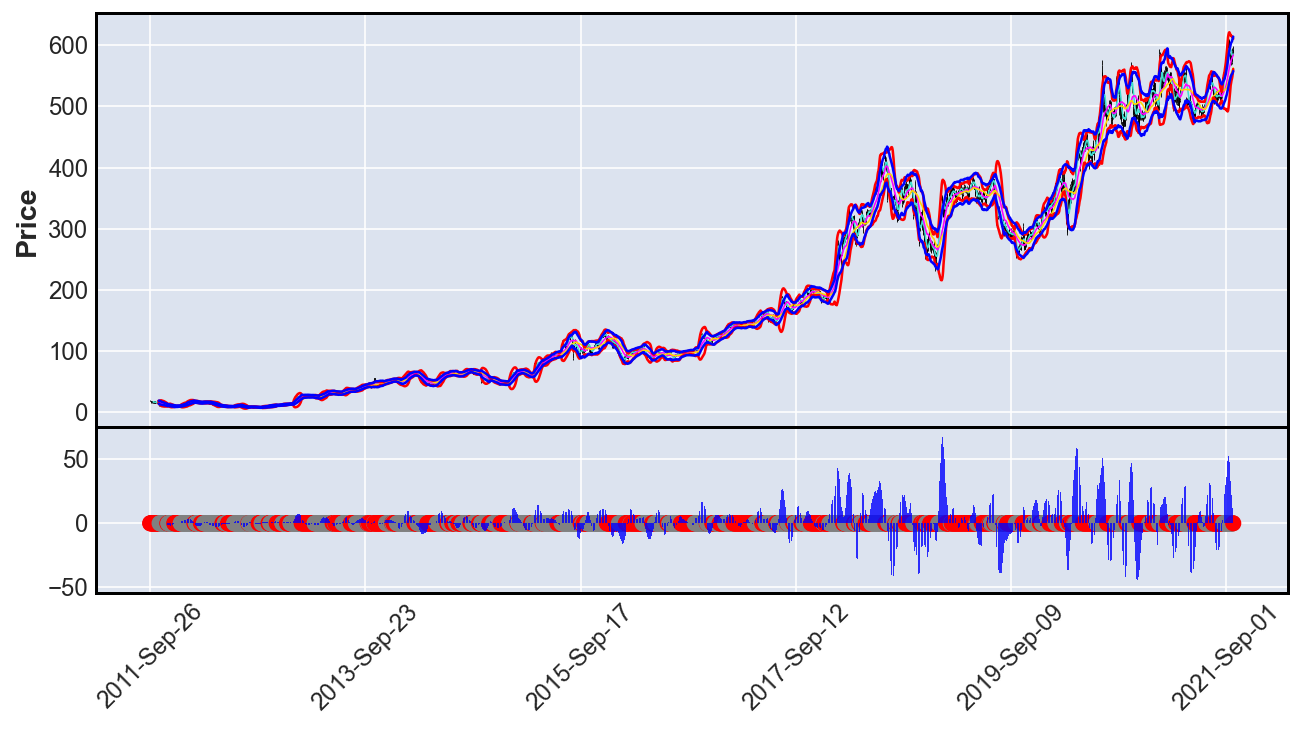

In [98]:
import panel as pn
from panel.interact import interact

pn.extension()

def figure_stock_d(stock):
    apds = [mpf.make_addplot(ticker_dict_1d[stock]['value'], panel=1, type='bar', color=colors_d, alpha=0.8, secondary_y=False),
            mpf.make_addplot([0] * len(ticker_dict_1d[stock]), panel=1, type='scatter', marker='o', markersize=50, color=['gray' if s else 'red' for s in ticker_dict_1d[stock]['squeeze_off']], secondary_y=False),
            mpf.make_addplot(ticker_dict_1d[stock][['upper_BB']], color = 'red'),
            mpf.make_addplot(ticker_dict_1d[stock][['lower_BB']], color = 'red'),
            mpf.make_addplot(ticker_dict_1d[stock][['upper_KC']], color = 'blue'),
            mpf.make_addplot(ticker_dict_1d[stock][['lower_KC']], color = 'blue')]

    # plot ohcl with subplots
    fig, axes = mpf.plot(ohcl_d[stock], 
              volume_panel = 2,
              figratio=(2,1),
              figscale=1,
              mav = (8,21,34),
              type='candle', 
              addplot=apds,
              returnfig=True)
    return pn.pane.Matplotlib(fig, tight=True)

ticker = daily_data["ticker"].unique()
interact(figure_stock_d, stock=ticker)